In [215]:
%reset -f

In [216]:
import pandas as pd
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [217]:
warnings.filterwarnings("ignore")

In [218]:
data = pd.read_csv("netflix.csv")

In [219]:
def list_missing_values(data):
    return pd.DataFrame(data.isna().sum()).reset_index().rename(
        columns={"index":"column_name",0:"no_of_missing_values"})\
            .sort_values("no_of_missing_values",ascending=False)

In [220]:
def check_comma(data):
    cols = []
    cnt = []
    for col in data.columns:
        if data[col].dtype == object:
            cols.append(col)
            cnt.append(data.loc[(data[col].str.contains(",")) & (data[col].dtype == object), col].count())
        else:
            cols.append(col)
            cnt.append(0)
    return (pd.DataFrame({
        "columns" : cols,
        "comma_count" : cnt
    }))

In [221]:
def split_values(val):
    arr = val.split(",")
    arr = [ dt.strip() for dt in arr]
    return arr

In [222]:
def prep_data_to_explode(val):
    if type(val) == list:
        return val
    elif(type(val) == str and "," in val):
        return split_values(val)
    elif(type(val) == str and "," not in val):
        return [val]
    elif (type(val) == float and math.isnan(val)):
        return[np.NaN]
    else:
        return val

In [223]:
def explode_data(data, key_cols, column_name, new_df_name):
    new_cols = key_cols
    new_cols.append(column_name)
    new_df_name = data[new_cols]
    return new_df_name.explode(column_name)

In [224]:
data_director = pd.DataFrame()
data_cast = pd.DataFrame()
data_country = pd.DataFrame()
data_listed_in = pd.DataFrame()
data_director_NaNs = data["director"].isna().sum()
data_cast_NaNs = data["cast"].isna().sum()
data_country_NaNs = data["country"].isna().sum()
data_listed_in_NaNs = data["listed_in"].isna().sum()

In [225]:
def verify_data_explosion():
    if data_director.director.isna().sum() == data_director_NaNs and data.show_id.nunique() == data_director.show_id.nunique():
        print("Directors unnested successfully")
    else:
        print("Problem with directors unnesting", data_director.director.isna().sum(), data_director_NaNs, data.show_id.nunique(), data_director.show_id.nunique())
    
    if data_cast.cast.isna().sum() == data_cast_NaNs and data.show_id.nunique() == data_cast.show_id.nunique():
        print("Cast unnested successfully")
    else:
        print("Problem with cast unnesting")
    
    if data_country.country.isna().sum() == data_country_NaNs and data.show_id.nunique() == data_country.show_id.nunique():
        print("Country unnested successfully")
    else:
        print("Problem with country unnesting")
    
    if data_listed_in.listed_in.isna().sum() == data_listed_in_NaNs and data.show_id.nunique() == data_listed_in.show_id.nunique():
        print("Listed_in unnested successfully")
    else:
        print("Problem with listed_in unnesting")

In [226]:
def call_explode_data():
    data["director"] = data["director"].apply(prep_data_to_explode)
    global data_director 
    data_director = explode_data(data, ["show_id"],"director", "data_director")

    data["cast"] = data["cast"].apply(prep_data_to_explode)
    global data_cast
    data_cast = explode_data(data, ["show_id"],"cast", "data_cast")

    data["country"] = data["country"].apply(prep_data_to_explode)
    global data_country
    data_country = explode_data(data, ["show_id"],"country", "data_country")

    data["listed_in"] = data["listed_in"].apply(prep_data_to_explode)
    global data_listed_in
    data_listed_in = explode_data(data, ["show_id"],"listed_in", "data_listed_in")

    data.drop(columns=["director", "cast", "country", "listed_in"], inplace=True)
    verify_data_explosion()

In [227]:
check_comma(data)

columns  comma_count
0        show_id            0
1           type            0
2          title          138
3       director          614
4           cast         7101
5        country         1320
6     date_added         8797
7   release_year            0
8         rating            0
9       duration            0
10     listed_in         6787
11   description         6448

In [228]:
call_explode_data()

Directors unnested successfully
Cast unnested successfully
Country unnested successfully
Listed_in unnested successfully


In [229]:
print(check_comma(data).sort_values("comma_count", ascending=False))
print(check_comma(data_director).sort_values("comma_count", ascending=False))
print(check_comma(data_cast).sort_values("comma_count", ascending=False))
print(check_comma(data_listed_in).sort_values("comma_count", ascending=False))
print(check_comma(data_country).sort_values("comma_count", ascending=False))

        columns  comma_count
3    date_added         8797
7   description         6448
2         title          138
0       show_id            0
1          type            0
4  release_year            0
5        rating            0
6      duration            0
    columns  comma_count
0   show_id            0
1  director            0
   columns  comma_count
0  show_id            0
1     cast            0
     columns  comma_count
0    show_id            0
1  listed_in            0
   columns  comma_count
0  show_id            0
1  country            0


In [230]:
print(list_missing_values(data))
print(list_missing_values(data_director))
print(list_missing_values(data_cast))
print(list_missing_values(data_listed_in))
print(list_missing_values(data_country))

    column_name  no_of_missing_values
3    date_added                    10
5        rating                     4
6      duration                     3
0       show_id                     0
1          type                     0
2         title                     0
4  release_year                     0
7   description                     0
  column_name  no_of_missing_values
1    director                  2634
0     show_id                     0
  column_name  no_of_missing_values
1        cast                   825
0     show_id                     0
  column_name  no_of_missing_values
0     show_id                     0
1   listed_in                     0
  column_name  no_of_missing_values
1     country                   831
0     show_id                     0


In [231]:
data_country.loc[data_country["country"].isna()]

show_id country
2         s3     NaN
3         s4     NaN
5         s6     NaN
6         s7     NaN
10       s11     NaN
...      ...     ...
8718   s8719     NaN
8759   s8760     NaN
8783   s8784     NaN
8785   s8786     NaN
8803   s8804     NaN

[831 rows x 2 columns]

In [232]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

#### Data imputation for Duration column
##### It appears that data for duration field for movies by director "Louis C.K." is missing in duration column. however duration data is incorrectly populated in ratings column.
##### Hence copying the data from rating column to the duration column and making ratings as NaN for movies by dirctor "Louis C.K."

In [233]:
def impute_duration(df):
    df["duration"] = copy.deepcopy(df["rating"])
    df["rating"] = np.NaN
    return df

In [234]:

def impute_country(row):
    director_list = merged_data.loc[(merged_data["show_id"] == row["show_id"]), "director"].to_list()
    director_country = merged_data.loc[(merged_data["director"].isin(director_list)), "country"].mode()
    if director_country.size > 0:
        return director_country[0]
    else:
        cast_list = merged_data.loc[(merged_data["show_id"] == row["show_id"]), "cast"].to_list()
        cast_country = merged_data.loc[(merged_data["cast"].isin(cast_list)), "country"].mode()
        if cast_country.size > 0:
            return cast_country[0]
        else:
            return math.nan



In [235]:
def impute_rating(row):
    show_type,country = merged_data.loc[merged_data["show_id"]==row["show_id"],("type","country")].values[0]        
    director_list = merged_data.loc[(merged_data["show_id"] == row["show_id"]), "director"].to_list()
    if(country == math.nan):
        director_rating = merged_data.loc[(merged_data["director"].isin(director_list)) & (merged_data["type"] == show_type), "rating"].mode()
    else:
        director_rating = merged_data.loc[(merged_data["director"].isin(director_list)) & (merged_data["type"] == show_type) & (merged_data["country"] == country), "rating"].mode()
    if director_rating.size > 0:
        return director_rating[0]
    else:
        cast_list = merged_data.loc[(merged_data["show_id"] == row["show_id"]), "cast"].to_list()
        if(type(country) != str and math.isnan(country)):
            cast_rating = merged_data.loc[(merged_data["cast"].isin(cast_list)) & (merged_data["type"] == show_type), "rating"].mode()    
        else:
            cast_rating = merged_data.loc[(merged_data["cast"].isin(cast_list) & (merged_data["type"] == show_type) & (merged_data["country"] == country)), "rating"].mode()
        if cast_rating.size > 0:
            return cast_rating[0]
        else:
            country_rating = merged_data.loc[(merged_data["type"] == show_type) & (merged_data["country"] == country), "rating"].mode()
            if country_rating.size > 0:
                return country_rating[0]
            else:
                return math.nan

In [236]:
def impute_director(row):
    cast_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "cast"].tolist()
    director = merged_data.loc[merged_data["cast"].isin(cast_list), "director"].mode()
    if not director.empty:
        return director.iloc[0]
    else:
        listed_in_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "listed_in"].tolist()
        country_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "country"].tolist()
        director = merged_data.loc[(merged_data["listed_in"].isin(listed_in_list)) & (merged_data["country"].isin(country_list)), "director"].mode()
        if not director.empty:
            return director.iloc[0]
        else:
            country_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "country"].tolist()
            director = merged_data.loc[merged_data["country"].isin(country_list), "director"].mode()
            if not director.empty:
                return director.iloc[0]
            else:   
                return np.nan

In [237]:
def impute_cast(row):
    director_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "director"].tolist()
    cast = merged_data.loc[merged_data["director"].isin(director_list), "cast"].mode()
    if not cast.empty:
        return cast.iloc[0]
    else:
        listed_in_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "listed_in"].tolist()
        country_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "country"].tolist()
        cast = merged_data.loc[(merged_data["listed_in"].isin(listed_in_list)) & (merged_data["country"].isin(country_list)), "cast"].mode()
        if not cast.empty:
            return cast.iloc[0]
        else:
            return np.nan

In [238]:
def impute_date_added(row):
    director_list = merged_data.loc[merged_data["show_id"] == row["show_id"], "director"].unique().tolist()
    date_data = merged_data.loc[merged_data["director"].isin(director_list)]
    return date_data.groupby("director")["date_added"].aggregate(lambda x: x.mode().iloc[0]).reset_index()["date_added"].values[0]

### Imputing Country

In [239]:
data_country["country"].isna().sum()

831

In [240]:
data_country.loc[(data_country["country"].isna()), "country"] = data_country.loc[(data_country["country"].isna())].apply(impute_country, axis=1)

In [241]:
data_country["country"].isna().sum()

35

In [242]:
merged_data.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
description         0
director        50643
cast             2149
country         11897
listed_in           0
dtype: int64

In [243]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

### Impute Duration

In [244]:
data["duration"].isna().sum()

3

In [245]:
data.loc[data["duration"].isna()] = data.loc[data["duration"].isna()].apply(impute_duration, axis=1)

In [246]:
data["duration"].isna().sum()

0

In [247]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

### Impute Rating

In [248]:
data["rating"].isna().sum()

7

In [249]:
data.loc[(data["rating"].isna()), "rating"] = data.loc[(data["rating"].isna())].apply(impute_rating, axis=1)

In [250]:
data["rating"].isna().sum()

0

In [251]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

### Impute Director

In [252]:
data_director["director"].isna().sum()

2634

In [253]:
data_director.loc[data_director["director"].isna(), "director"] = data_director.loc[data_director["director"].isna()].apply(impute_director, axis=1)

In [254]:
data_director["director"].isna().sum()

1

In [255]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

### Impute Cast

In [256]:
data_cast["cast"].isna().sum()

825

In [257]:
data_cast.loc[data_cast["cast"].isna(), "cast"] = data_cast.loc[data_cast["cast"].isna()].apply(impute_cast, axis=1)

In [258]:
data_cast["cast"].isna().sum()

2

In [259]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

### Impute date_added

In [260]:
data["date_added"].isna().sum()

10

In [261]:
data.loc[data["date_added"].isna(), "date_added"] = data.loc[data["date_added"].isna()].apply(impute_date_added, axis=1)

In [262]:
data["date_added"].isna().sum()

0

In [263]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")

In [264]:
print(list_missing_values(data))
print(list_missing_values(data_director))
print(list_missing_values(data_cast))
print(list_missing_values(data_listed_in))
print(list_missing_values(data_country))

    column_name  no_of_missing_values
0       show_id                     0
1          type                     0
2         title                     0
3    date_added                     0
4  release_year                     0
5        rating                     0
6      duration                     0
7   description                     0
  column_name  no_of_missing_values
1    director                     1
0     show_id                     0
  column_name  no_of_missing_values
1        cast                     2
0     show_id                     0
  column_name  no_of_missing_values
0     show_id                     0
1   listed_in                     0
  column_name  no_of_missing_values
1     country                    35
0     show_id                     0


In [265]:
merged_data.isna().sum()

show_id           0
type              0
title             0
date_added        0
release_year      0
rating            0
duration          0
description       0
director          6
cast              4
country         457
listed_in         0
dtype: int64

In [266]:
#data_director["director"].fillna("Unknown", inplace=True)
#data_country["country"].fillna("Unknown", inplace=True)
#data_cast["cast"].fillna("Unknown", inplace=True)

show_id_list = data_director.loc[data_director["director"].isna(),"show_id"].tolist() + data_country.loc[data_country["country"].isna(),"show_id"].tolist() + data_cast.loc[data_cast["cast"].isna(),"show_id"].tolist()
data = data.loc[~data["show_id"].isin(show_id_list)]
data_director = data_director.loc[~data_director["show_id"].isin(show_id_list)]
data_cast = data_cast.loc[~data_cast["show_id"].isin(show_id_list)]
data_listed_in = data_listed_in.loc[~data_listed_in["show_id"].isin(show_id_list)]
data_country = data_country.loc[~data_country["show_id"].isin(show_id_list)]


#data_director.loc[data_director["director"].isna(),"show_id"].tolist()


In [267]:
merged_data = data.merge(data_director, on="show_id").merge(data_cast, on="show_id").merge(data_country, on="show_id").merge(data_listed_in, on="show_id")
merged_data.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
director        0
cast            0
country         0
listed_in       0
dtype: int64

In [268]:
print(list_missing_values(data))
print(list_missing_values(data_director))
print(list_missing_values(data_cast))
print(list_missing_values(data_listed_in))
print(list_missing_values(data_country))

    column_name  no_of_missing_values
0       show_id                     0
1          type                     0
2         title                     0
3    date_added                     0
4  release_year                     0
5        rating                     0
6      duration                     0
7   description                     0
  column_name  no_of_missing_values
0     show_id                     0
1    director                     0
  column_name  no_of_missing_values
0     show_id                     0
1        cast                     0
  column_name  no_of_missing_values
0     show_id                     0
1   listed_in                     0
  column_name  no_of_missing_values
0     show_id                     0
1     country                     0


In [269]:
merged_data.loc[(merged_data["director"] == "Matthew Salleh") & (merged_data["country"]== "India") & (merged_data["type"]== "TV Show"), "director"] = merged_data.loc[(merged_data["listed_in"].isin(merged_data.loc[(merged_data["director"] == "Matthew Salleh") & (merged_data["country"]== "India") & (merged_data["type"]== "TV Show"), "listed_in"].tolist())) & (merged_data["country"] == "India") & (merged_data["type"]== "TV Show"),"director"].mode()

In [270]:
merged_data.loc[(merged_data["director"] == "Matthew Salleh") & (merged_data["country"]== "India") & (merged_data["type"]== "Movie"), "director"] = merged_data.loc[(merged_data["listed_in"].isin(merged_data.loc[(merged_data["director"] == "Matthew Salleh") & (merged_data["country"]== "India") & (merged_data["type"]== "Movie"), "listed_in"].tolist())) & (merged_data["country"] == "India") & (merged_data["type"]== "Movie"),"director"].mode()

In [271]:
merged_data.loc[(merged_data["director"] == "Matthew Salleh") & (merged_data["country"]== "India")]

Empty DataFrame
Columns: [show_id, type, title, date_added, release_year, rating, duration, description, director, cast, country, listed_in]
Index: []

In [272]:
#data_cat_cols = ["type", "rating"]
#data_director_cat_cols = ["director"]
#data_cast_cat_cols = ["cast"]
#data_listed_in_cat_cols = ["listed_in"]
#data_country_cat_cols = ["country"]

#data[data_cat_cols] = data[data_cat_cols].astype('category')
#data_director[data_director_cat_cols] = data_director[data_director_cat_cols].astype('category')
#data_cast[data_cast_cat_cols] = data_cast[data_cast_cat_cols].astype('category')
#data_listed_in[data_listed_in_cat_cols] = data_listed_in[data_listed_in_cat_cols].astype('category')
#data_country[data_country_cat_cols] = data_country[data_country_cat_cols].astype('category')

In [273]:
data.shape

(8769, 8)

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8769 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8769 non-null   object
 1   type          8769 non-null   object
 2   title         8769 non-null   object
 3   date_added    8769 non-null   object
 4   release_year  8769 non-null   int64 
 5   rating        8769 non-null   object
 6   duration      8769 non-null   object
 7   description   8769 non-null   object
dtypes: int64(1), object(7)
memory usage: 616.6+ KB


In [275]:
data_director.shape

(9568, 2)

In [276]:
data_director.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   show_id   9568 non-null   object
 1   director  9568 non-null   object
dtypes: object(2)
memory usage: 224.2+ KB


In [277]:
data_cast.shape

(64768, 2)

In [278]:
data_cast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64768 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   show_id  64768 non-null  object
 1   cast     64768 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [279]:
data_listed_in.shape

(19242, 2)

In [280]:
data_listed_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19242 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   show_id    19242 non-null  object
 1   listed_in  19242 non-null  object
dtypes: object(2)
memory usage: 451.0+ KB


In [281]:
data_country.shape

(10812, 2)

In [282]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10812 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   show_id  10812 non-null  object
 1   country  10812 non-null  object
dtypes: object(2)
memory usage: 253.4+ KB


In [283]:
data_country["country"].nunique()

122

In [284]:
data_director["director"].nunique()

4955

In [285]:
data_cast["cast"].nunique()

36265

In [286]:
data_listed_in["listed_in"].nunique()

42

In [287]:
data["type"].value_counts()

type
Movie      6102
TV Show    2667
Name: count, dtype: int64

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8769 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8769 non-null   object
 1   type          8769 non-null   object
 2   title         8769 non-null   object
 3   date_added    8769 non-null   object
 4   release_year  8769 non-null   int64 
 5   rating        8769 non-null   object
 6   duration      8769 non-null   object
 7   description   8769 non-null   object
dtypes: int64(1), object(7)
memory usage: 616.6+ KB


In [289]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201598 entries, 0 to 201597
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201598 non-null  object
 1   type          201598 non-null  object
 2   title         201598 non-null  object
 3   date_added    201598 non-null  object
 4   release_year  201598 non-null  int64 
 5   rating        201598 non-null  object
 6   duration      201598 non-null  object
 7   description   201598 non-null  object
 8   director      201558 non-null  object
 9   cast          201598 non-null  object
 10  country       201598 non-null  object
 11  listed_in     201598 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [290]:
data_director.nunique()

show_id     8769
director    4955
dtype: int64

### Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

##### TV Shows vs Movies

In [291]:
merged_data.groupby("type")["show_id"].aggregate(
    count = "nunique"
    ).reset_index()

type  count
0    Movie   6102
1  TV Show   2667

#### Director: Director of the Movie/TV Show

In [292]:
data_director.nunique()

show_id     8769
director    4955
dtype: int64

In [293]:
comm_director = list(set(merged_data.loc[merged_data["type"] == "Movie","director"].tolist()) & set(merged_data.loc[merged_data["type"] == "TV Show","director"].tolist()))
len(comm_director)

801

In [294]:
merged_data.groupby(["type"])["director"].aggregate(
    director_count = "nunique"
    ).reset_index()

type  director_count
0    Movie            4747
1  TV Show            1008

#### Cast: Actors involved in the Movie/TV Show

In [295]:
data_cast.nunique()

show_id     8769
cast       36265
dtype: int64

In [296]:
comm_cast = list(set(merged_data.loc[merged_data["type"] == "Movie","cast"].tolist()) & set(merged_data.loc[merged_data["type"] == "TV Show","cast"].tolist()))
len(comm_cast)

4382

In [297]:
merged_data.groupby(["type"])["cast"].aggregate(
    cast_count = "nunique"
    ).reset_index()

type  cast_count
0    Movie       25811
1  TV Show       14836

#### Country: Country where the Movie/TV Show was produced

In [298]:
data_country.nunique()

show_id    8769
country     122
dtype: int64

In [299]:
comm_country = list(set(merged_data.loc[merged_data["type"] == "Movie","country"].tolist()) & set(merged_data.loc[merged_data["type"] == "TV Show","country"].tolist()))
len(comm_country)

61

In [300]:
merged_data.groupby(["type"])["country"].aggregate(
    country_count = "nunique"
    ).reset_index()

type  country_count
0    Movie            118
1  TV Show             65

#### Release_year: Actual Release year of the Movie/TV Show

In [301]:
merged_data.groupby(["type","release_year"])["show_id"].aggregate(
    count = "nunique"
    ).reset_index()

type  release_year  count
0      Movie          1942      2
1      Movie          1943      3
2      Movie          1944      3
3      Movie          1945      3
4      Movie          1946      1
..       ...           ...    ...
114  TV Show          2017    265
115  TV Show          2018    378
116  TV Show          2019    396
117  TV Show          2020    435
118  TV Show          2021    312

[119 rows x 3 columns]

#### Listed_in: Genre in Movies

In [302]:
merged_data.loc[merged_data["type"]=="Movie"].groupby(["listed_in"])["show_id"].aggregate(
    genre_count = "count"
    ).reset_index().sort_values("genre_count", ascending=False).to_csv("temp.csv")

#### Listed_in: Genre in TV Shows

In [303]:
merged_data.loc[merged_data["type"]=="TV Show"].groupby(["listed_in"])["show_id"].aggregate(
    genre_count = "count"
    ).reset_index().sort_values("genre_count", ascending=False).to_csv("temp.csv")

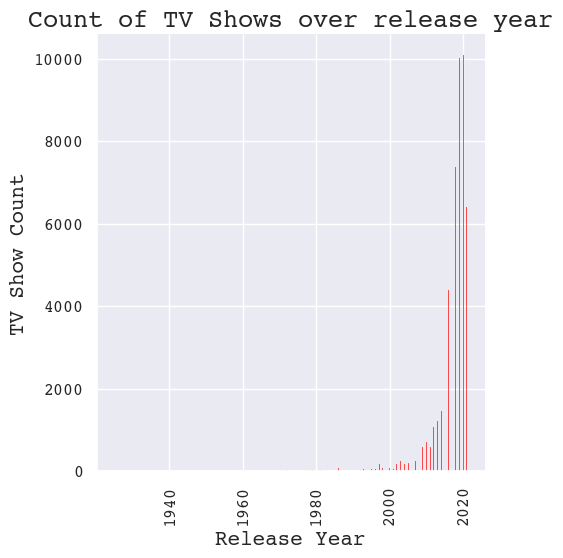

In [304]:
sns.set(style = 'darkgrid')
sns.displot(x=merged_data.loc[merged_data["type"]=="TV Show", "release_year"].values, color="Red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Release Year", fontsize = 15, fontname='Courier')
plt.ylabel("TV Show Count", fontsize = 15, fontname='Courier')
plt.title("Count of TV Shows over release year" , fontsize = 18, fontname='Courier')
plt.show()


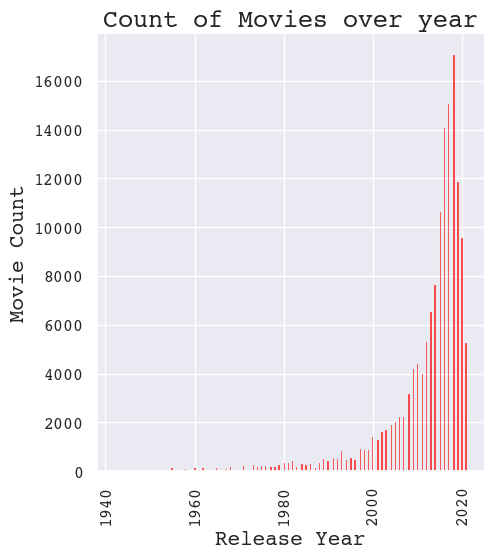

In [305]:
sns.set(style = 'darkgrid')
sns.displot(x=merged_data.loc[merged_data["type"]=="Movie", "release_year"].values, color="Red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Release Year", fontsize = 15, fontname='Courier')
plt.ylabel("Movie Count", fontsize = 15, fontname='Courier')
plt.title("Count of Movies over year" , fontsize = 18, fontname='Courier')
plt.show()

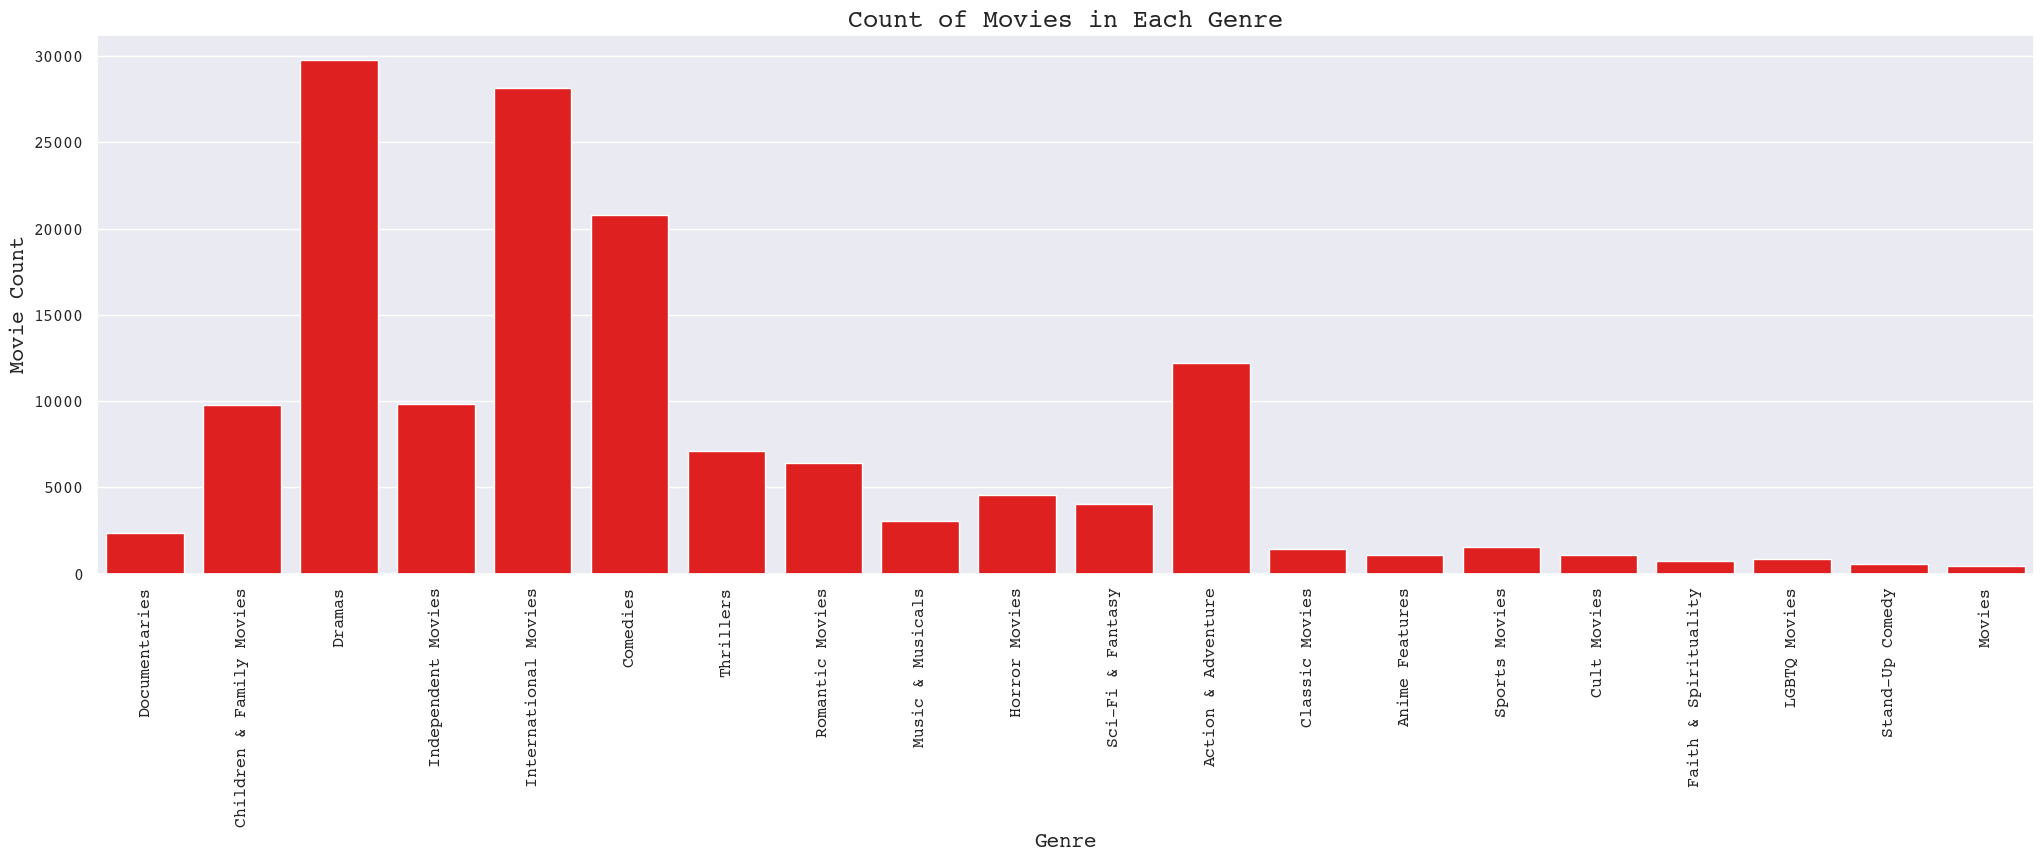

In [306]:
fig=plt.figure(figsize=(25,7))
sns.countplot(data=merged_data.loc[merged_data["type"]=="Movie", ["listed_in"]], x='listed_in', color="Red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Genre", fontsize = 15, fontname='Courier')
plt.ylabel("Movie Count", fontsize = 15, fontname='Courier')
plt.title("Count of Movies in Each Genre" , fontsize = 18, fontname='Courier')
plt.show()


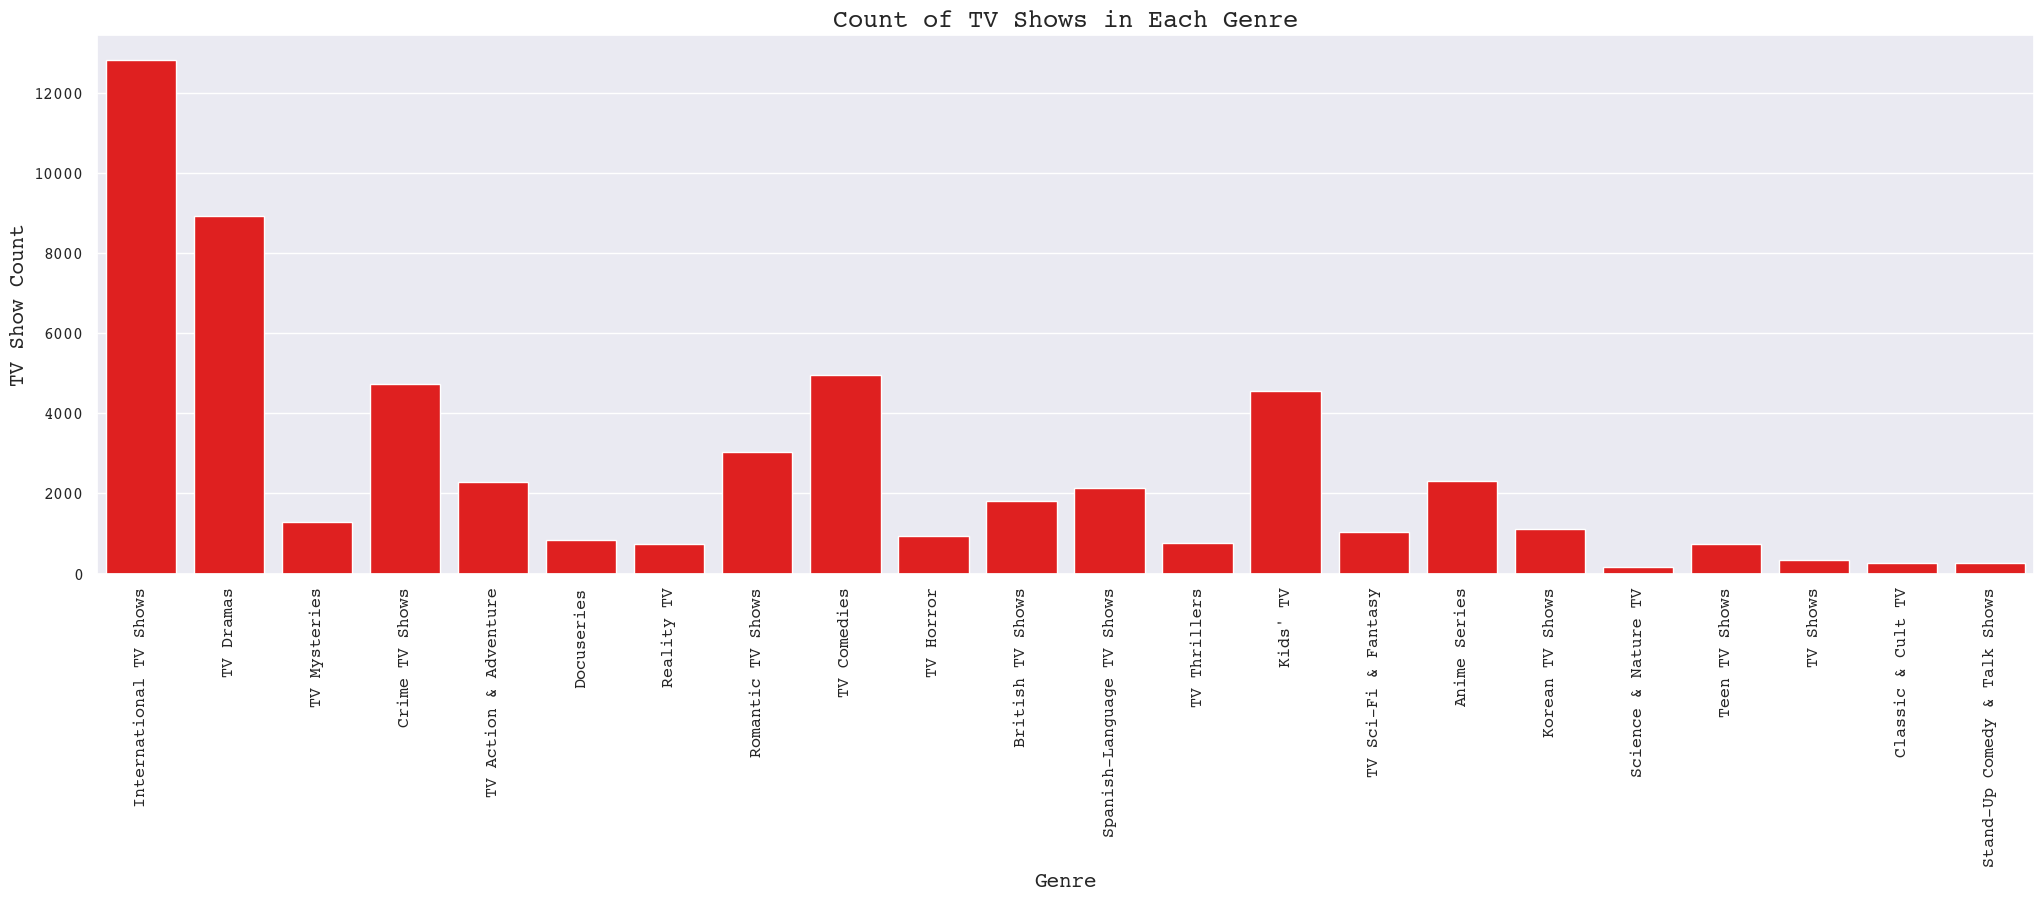

In [307]:
fig=plt.figure(figsize=(25,7))
sns.countplot(data=merged_data.loc[merged_data["type"]=="TV Show", ["listed_in"]], x='listed_in', color="Red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Genre", fontsize = 15, fontname='Courier')
plt.ylabel("TV Show Count", fontsize = 15, fontname='Courier')
plt.title("Count of TV Shows in Each Genre" , fontsize = 18, fontname='Courier')
plt.show()


In [308]:
yearly_count = data.groupby(["release_year","type"])["show_id"].aggregate(
    show_count=("count")
).reset_index()
yearly_count

release_year     type  show_count
0            1925  TV Show           1
1            1942    Movie           2
2            1943    Movie           3
3            1944    Movie           3
4            1945    Movie           3
..            ...      ...         ...
114          2019  TV Show         396
115          2020    Movie         511
116          2020  TV Show         435
117          2021    Movie         267
118          2021  TV Show         312

[119 rows x 3 columns]

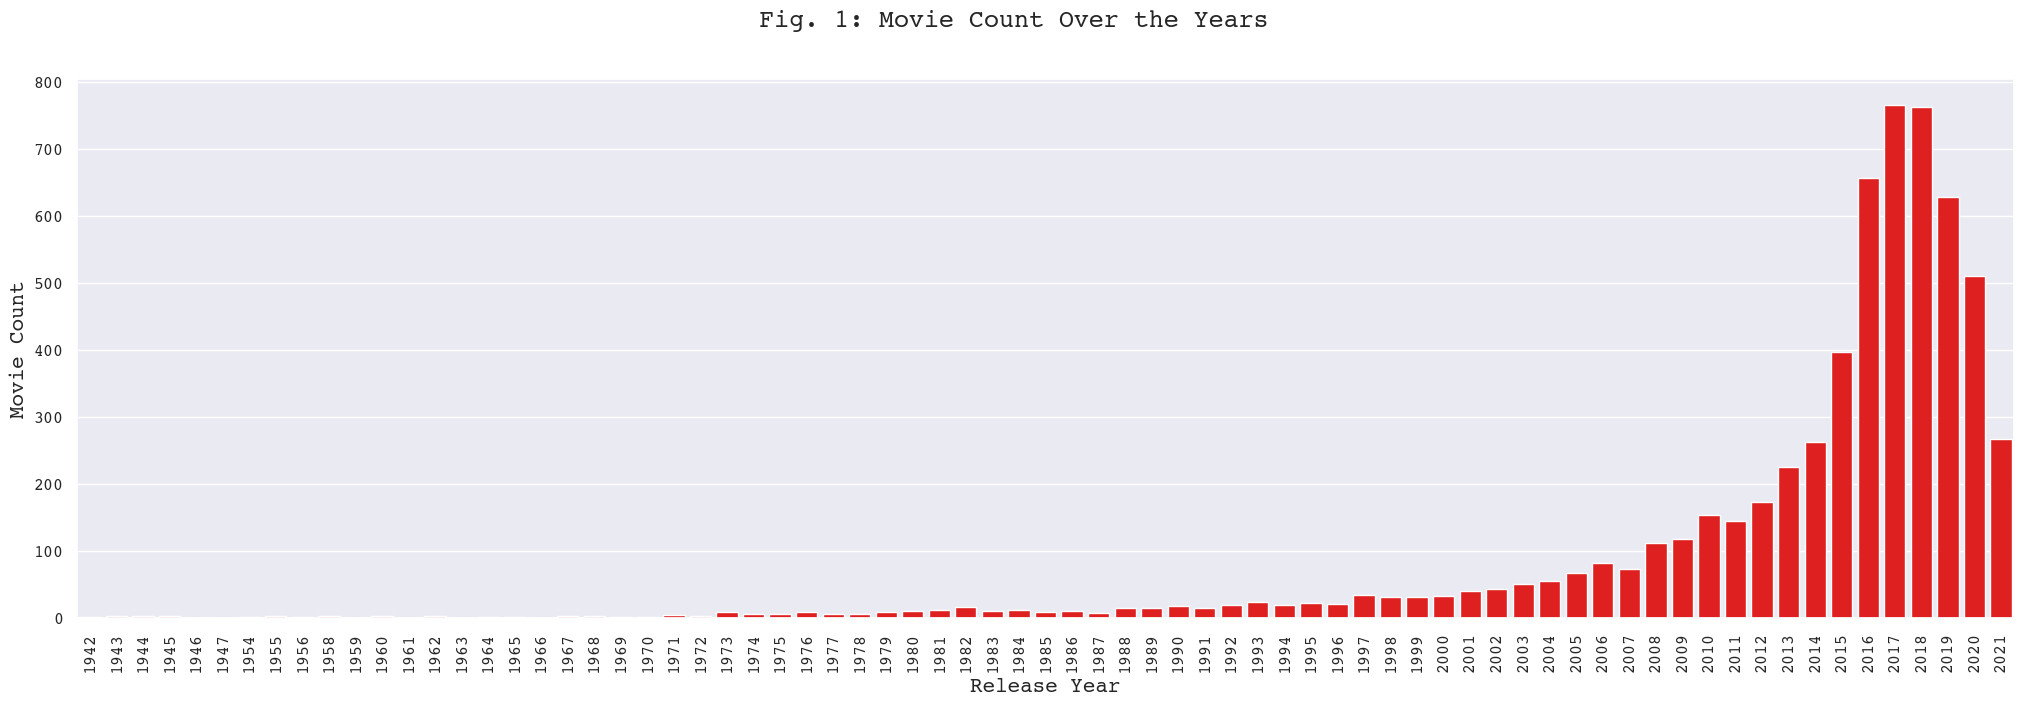

In [309]:
fig=plt.figure(figsize=(25,7)).suptitle("Fig. 1: Movie Count Over the Years", fontsize = 18, fontname='Courier')
sns.set(style = 'darkgrid')
sns.barplot(x="release_year", y="show_count", data=yearly_count.loc[yearly_count["type"]=="Movie"], color="red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Release Year", fontsize = 15, fontname='Courier')
plt.ylabel("Movie Count", fontsize = 15, fontname='Courier')
plt.show()

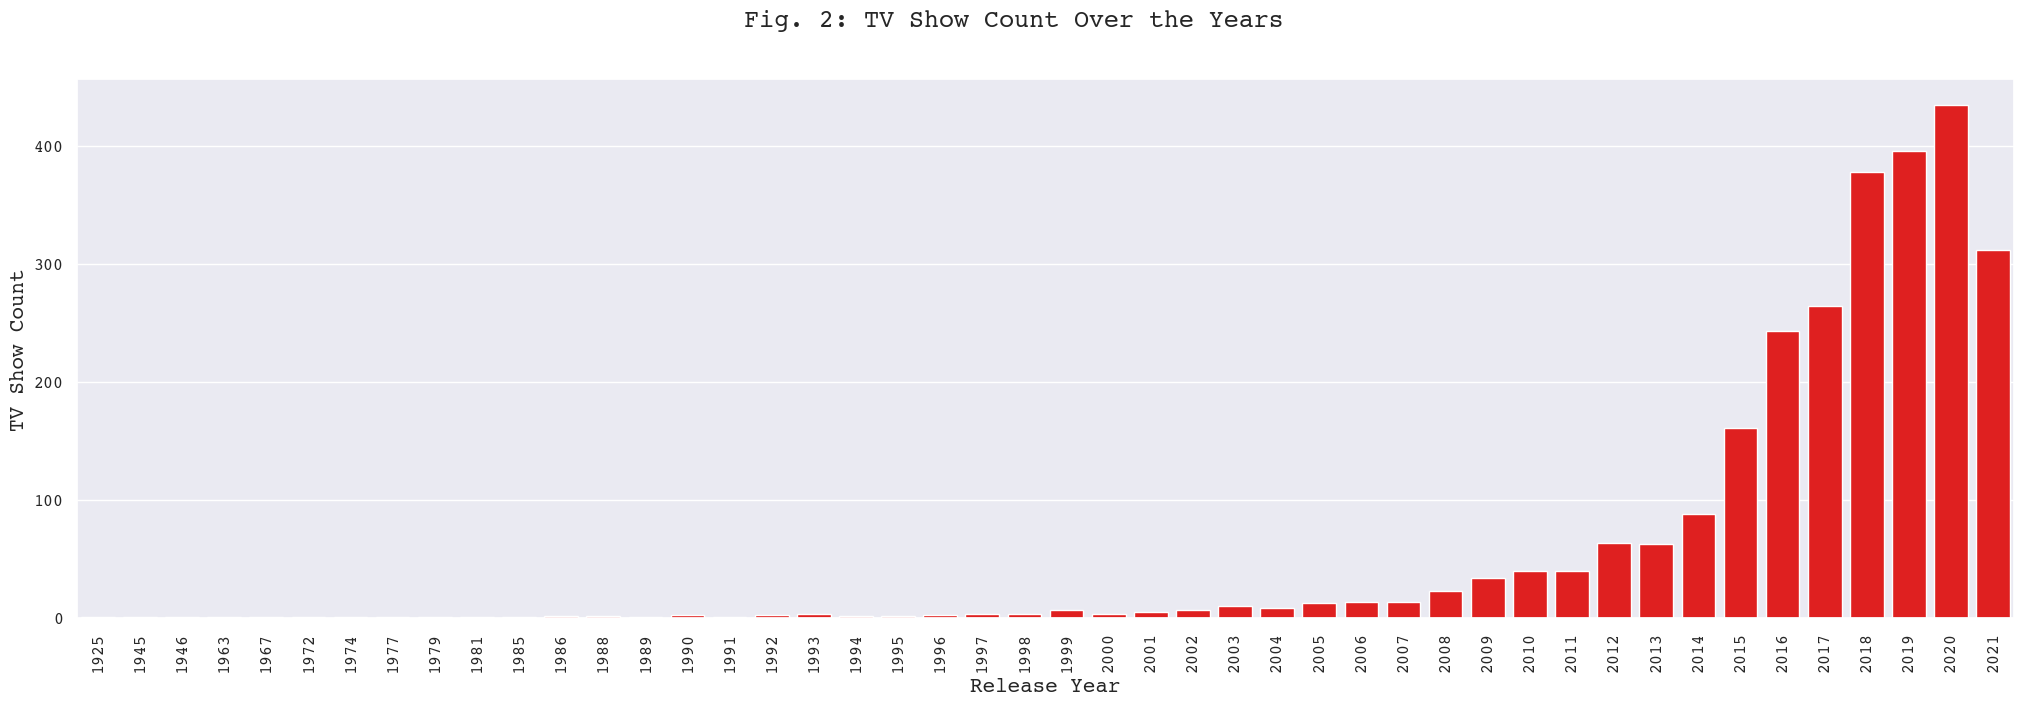

In [310]:
fig=plt.figure(figsize=(25,7)).suptitle("Fig. 2: TV Show Count Over the Years", fontsize = 18, fontname='Courier')
sns.set(style = 'darkgrid')
sns.barplot(x="release_year", y="show_count", data=yearly_count.loc[yearly_count["type"]=="TV Show"], color="red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Release Year", fontsize = 15, fontname='Courier')
plt.ylabel("TV Show Count", fontsize = 15, fontname='Courier')
plt.show()

In [311]:
yearly_count.loc[yearly_count["show_count"] == yearly_count.loc[yearly_count["type"] == "TV Show"]["show_count"].max()]

release_year     type  show_count
116          2020  TV Show         435

In [312]:
yearly_count.loc[yearly_count["show_count"] == yearly_count.loc[yearly_count["type"] == "Movie"]["show_count"].max()]

release_year   type  show_count
109          2017  Movie         766

In [313]:
data["type"].value_counts().reset_index()

type  count
0    Movie   6102
1  TV Show   2667

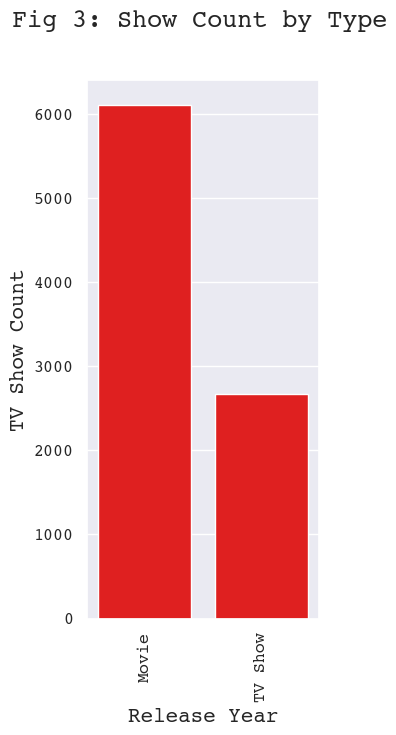

In [314]:
fig=plt.figure(figsize=(3,7)).suptitle("Fig 3: Show Count by Type", fontsize = 18, fontname='Courier')
sns.set(style = 'darkgrid')
sns.barplot(x=data["type"].value_counts().index, y=data["type"].value_counts().values, color="red")
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Release Year", fontsize = 15, fontname='Courier')
plt.ylabel("TV Show Count", fontsize = 15, fontname='Courier')
plt.show()

In [315]:
rating_count = data.groupby(["rating","type"])["show_id"].aggregate(
    show_count=("count")
).reset_index()
rating_count.sort_values("rating")

rating     type  show_count
0          G    Movie          41
1      NC-17    Movie           3
2         NR    Movie          75
3         NR  TV Show           5
4         PG    Movie         287
5      PG-13    Movie         492
6          R    Movie         797
7          R  TV Show           2
8      TV-14    Movie        1422
9      TV-14  TV Show         728
11      TV-G  TV Show          94
10      TV-G    Movie         123
12     TV-MA    Movie        2049
13     TV-MA  TV Show        1144
14     TV-PG    Movie         535
15     TV-PG  TV Show         323
16      TV-Y    Movie         131
17      TV-Y  TV Show         175
18     TV-Y7    Movie         139
19     TV-Y7  TV Show         195
21  TV-Y7-FV  TV Show           1
20  TV-Y7-FV    Movie           5
22        UR    Movie           3

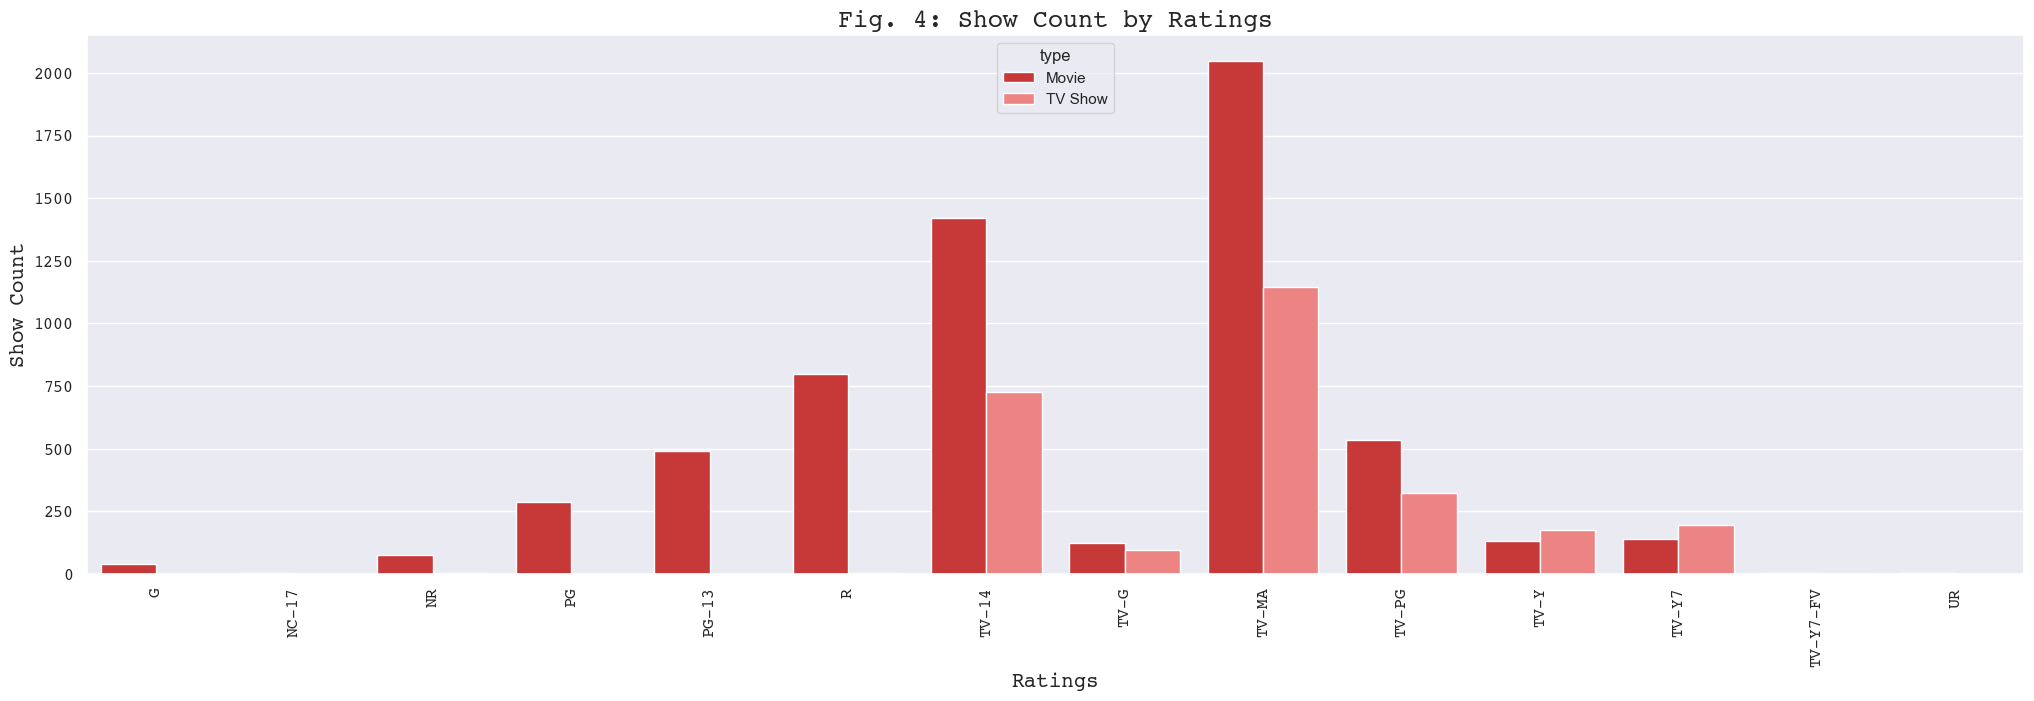

In [316]:
fig=plt.figure(figsize=(25,7))
sns.set(style = 'darkgrid')
red_palette = ["#DF2020","#FF7272"]
sns.barplot(x="rating", y="show_count", data=rating_count, hue="type", palette=red_palette)
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Ratings", fontsize = 15, fontname='Courier')
plt.ylabel("Show Count", fontsize = 15, fontname='Courier')
plt.title("Fig. 4: Show Count by Ratings", fontsize = 18, fontname='Courier')
plt.show()

In [317]:
data.merge(data_listed_in, on="show_id").columns

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'description', 'listed_in'],
      dtype='object')

In [318]:
genre_count = data.merge(data_listed_in, on="show_id").groupby("listed_in")["show_id"].aggregate(
    show_count=("count")
).reset_index()
genre_count.sort_values("show_count", ascending=False)
genre_count["percentage"] = np.round((genre_count["show_count"] / genre_count["show_count"].sum())*100,2)
genre_count.sort_values("percentage", ascending=False).reset_index(drop=True)

listed_in  show_count  percentage
0           International Movies        2735       14.21
1                         Dramas        2422       12.59
2                       Comedies        1670        8.68
3         International TV Shows        1345        6.99
4             Action & Adventure         858        4.46
5                  Documentaries         856        4.45
6                      TV Dramas         761        3.95
7             Independent Movies         753        3.91
8       Children & Family Movies         641        3.33
9                Romantic Movies         616        3.20
10                   TV Comedies         578        3.00
11                     Thrillers         576        2.99
12                Crime TV Shows         469        2.44
13                      Kids' TV         450        2.34
14                    Docuseries         393        2.04
15             Romantic TV Shows         369        1.92
16              Music & Musicals         368        1.91
17                 Horror Movies         357        1.86
18               Stand-Up Comedy         339        1.76
19                    Reality TV         254        1.32
20              British TV Shows         252        1.31
21              Sci-Fi & Fantasy         243        1.26
22                 Sports Movies         215        1.12
23                  Anime Series         175        0.91
24     Spanish-Language TV Shows         174        0.90
25         TV Action & Adventure         167        0.87
26               Korean TV Shows         151        0.78
27                Classic Movies         116        0.60
28                  LGBTQ Movies         102        0.53
29                  TV Mysteries          98        0.51
30           Science & Nature TV          92        0.48
31           TV Sci-Fi & Fantasy          84        0.44
32                     TV Horror          75        0.39
33                Anime Features          71        0.37
34                   Cult Movies          71        0.37
35                 Teen TV Shows          69        0.36
36          Faith & Spirituality          65        0.34
37                  TV Thrillers          57        0.30
38  Stand-Up Comedy & Talk Shows          55        0.29
39                        Movies          56        0.29
40             Classic & Cult TV          28        0.15
41                      TV Shows          16        0.08

In [319]:
genre_count.loc[genre_count["listed_in"].str.contains("TV")].sort_values("percentage", ascending=False).reset_index(drop=True)

listed_in  show_count  percentage
0      International TV Shows        1345        6.99
1                   TV Dramas         761        3.95
2                 TV Comedies         578        3.00
3              Crime TV Shows         469        2.44
4                    Kids' TV         450        2.34
5           Romantic TV Shows         369        1.92
6                  Reality TV         254        1.32
7            British TV Shows         252        1.31
8   Spanish-Language TV Shows         174        0.90
9       TV Action & Adventure         167        0.87
10            Korean TV Shows         151        0.78
11               TV Mysteries          98        0.51
12        Science & Nature TV          92        0.48
13        TV Sci-Fi & Fantasy          84        0.44
14                  TV Horror          75        0.39
15              Teen TV Shows          69        0.36
16               TV Thrillers          57        0.30
17          Classic & Cult TV          28        0.15
18                   TV Shows          16        0.08

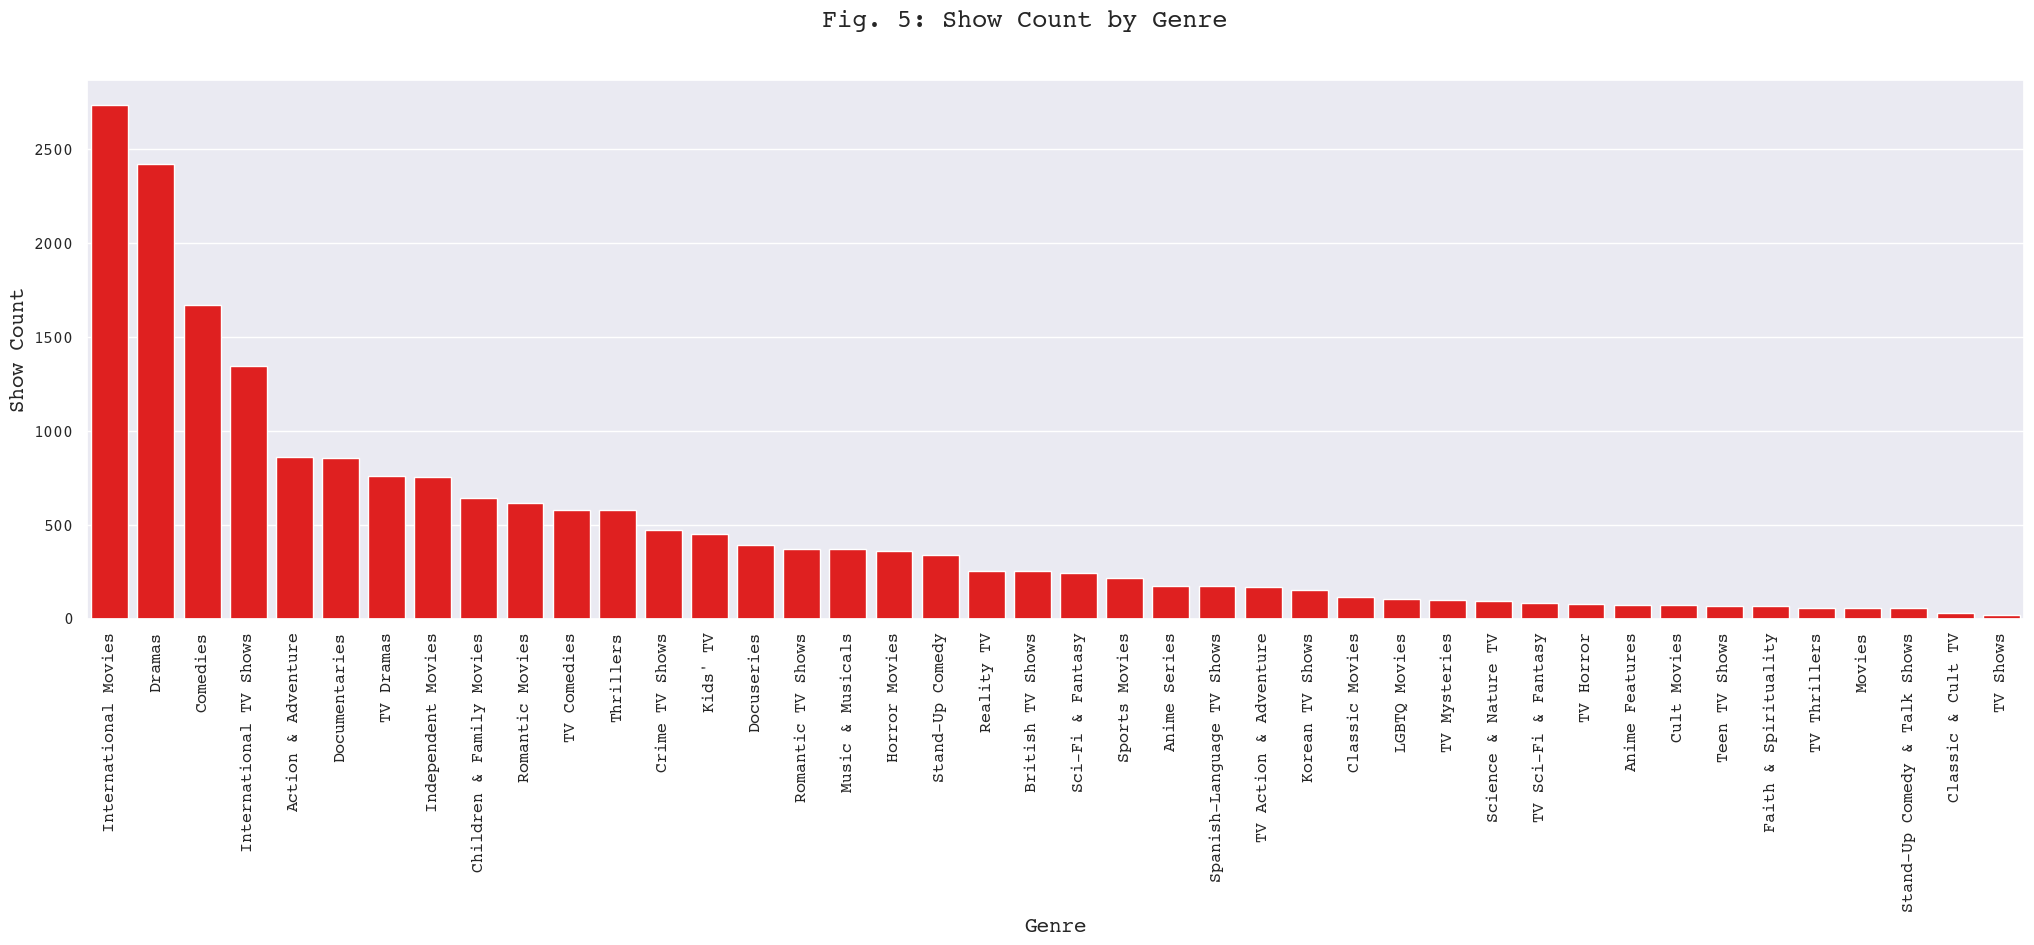

In [320]:
genre_order = genre_count.sort_values("show_count", ascending=False)["listed_in"]
fig=plt.figure(figsize=(25,7)).suptitle("Fig. 5: Show Count by Genre", fontsize = 18, fontname='Courier')
sns.set(style = 'darkgrid')
sns.barplot(x="listed_in", y="show_count", data=genre_count, color="Red", order=genre_order)
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Genre", fontsize = 15, fontname='Courier')
plt.ylabel("Show Count", fontsize = 15, fontname='Courier')
plt.show()

In [321]:
data_country.loc[data_country["show_id"] == "s6234"]

show_id        country
6233   s6234      Australia
6233   s6234        Armenia
6233   s6234          Japan
6233   s6234         Jordan
6233   s6234         Mexico
6233   s6234       Mongolia
6233   s6234    New Zealand
6233   s6234    Philippines
6233   s6234   South Africa
6233   s6234         Sweden
6233   s6234  United States
6233   s6234        Uruguay

In [322]:
multi_country_data = data_country.value_counts("show_id").reset_index().rename(columns={"count":"produced_country_cnt"})
multi_country_data_merged = data.merge(multi_country_data.loc[multi_country_data["produced_country_cnt"]>5],on="show_id")
multi_country_data_merged

show_id     type                                       title  \
0       s8    Movie                                     Sankofa   
1    s1507  TV Show                             Shaun the Sheep   
2    s1550    Movie                The Professor and the Madman   
3    s1998    Movie                                    The Take   
4    s2512    Movie                                      Wadjda   
5    s2563    Movie                                 Arctic Dogs   
6    s3126    Movie                             The Danish Girl   
7    s3392    Movie                                 The Command   
8    s4677  TV Show                        Ultimate Beastmaster   
9    s4928    Movie                              Beyond Skyline   
10   s4948    Movie                            A Sort of Family   
11   s6171    Movie                             Another Forever   
12   s6234    Movie                                    Barbecue   
13   s6624    Movie                                      Domino   
14   s6811  TV Show                               Frozen Planet   
15   s6812    Movie                  Frozen Planet: On Thin Ice   
16   s6813    Movie             Frozen Planet: The Epic Journey   
17   s7632    Movie                     Nymphomaniac: Volume II   
18   s8097    Movie  Stop at Nothing: The Lance Armstrong Story   
19   s8226    Movie                             The Breadwinner   
20   s8255    Movie                                The Congress   
21   s8404    Movie                         The Look of Silence   
22   s8412  TV Show                 The Making of Frozen Planet   

            date_added  release_year rating   duration  \
0   September 24, 2021          1993  TV-MA    125 min   
1    December 22, 2020          2016   TV-Y  2 Seasons   
2    December 15, 2020          2019  TV-14    125 min   
3   September 16, 2020          2016      R     92 min   
4         May 19, 2020          2012     PG     93 min   
5          May 4, 2020          2019     PG     93 min   
6    December 16, 2019          2015      R    120 min   
7     October 19, 2019          2018  PG-13    118 min   
8      August 31, 2018          2018  TV-PG  3 Seasons   
9       April 15, 2018          2017      R    107 min   
10       April 1, 2018          2017  TV-14     96 min   
11      March 21, 2017          2016  TV-PG     72 min   
12     August 15, 2017          2017  TV-MA    101 min   
13  September 28, 2019          2019      R     89 min   
14    January 28, 2016          2011  TV-PG   1 Season   
15    January 28, 2016          2011  TV-PG     47 min   
16    January 28, 2016          2011  TV-PG     52 min   
17     August 25, 2018          2013  TV-MA    124 min   
18   February 15, 2015          2014     NR    100 min   
19   February 20, 2018          2017  PG-13     93 min   
20     August 23, 2019          2013  TV-MA    123 min   
21   February 26, 2016          2014  PG-13    103 min   
22    January 28, 2016          2012  TV-PG   1 Season   

                                          description  produced_country_cnt  
0   On a photo shoot in Ghana, an American model s...                     6  
1   Join freewheeling Shaun for barnyard misadvent...                     8  
2   While working on the first Oxford English Dict...                     8  
3   After a mix-up lands him in hot water, a skill...                     7  
4   A persistent 10-year-old wishes for a new bicy...                     6  
5   When he stumbles upon evil Otto Von Walrus's s...                     7  
6   In 1920s Denmark, married artists embark on a ...                     6  
7   For the crew trapped aboard a sunken Russian s...                     6  
8   In this intense obstacle course series, elite ...                     6  
9   In the wake of an extraterrestrial invasion, a...                     6  
10  An Argentine doctor faces legal and ethical ch...                     6  
11  Overtaken by the death of her beloved, a griev...            

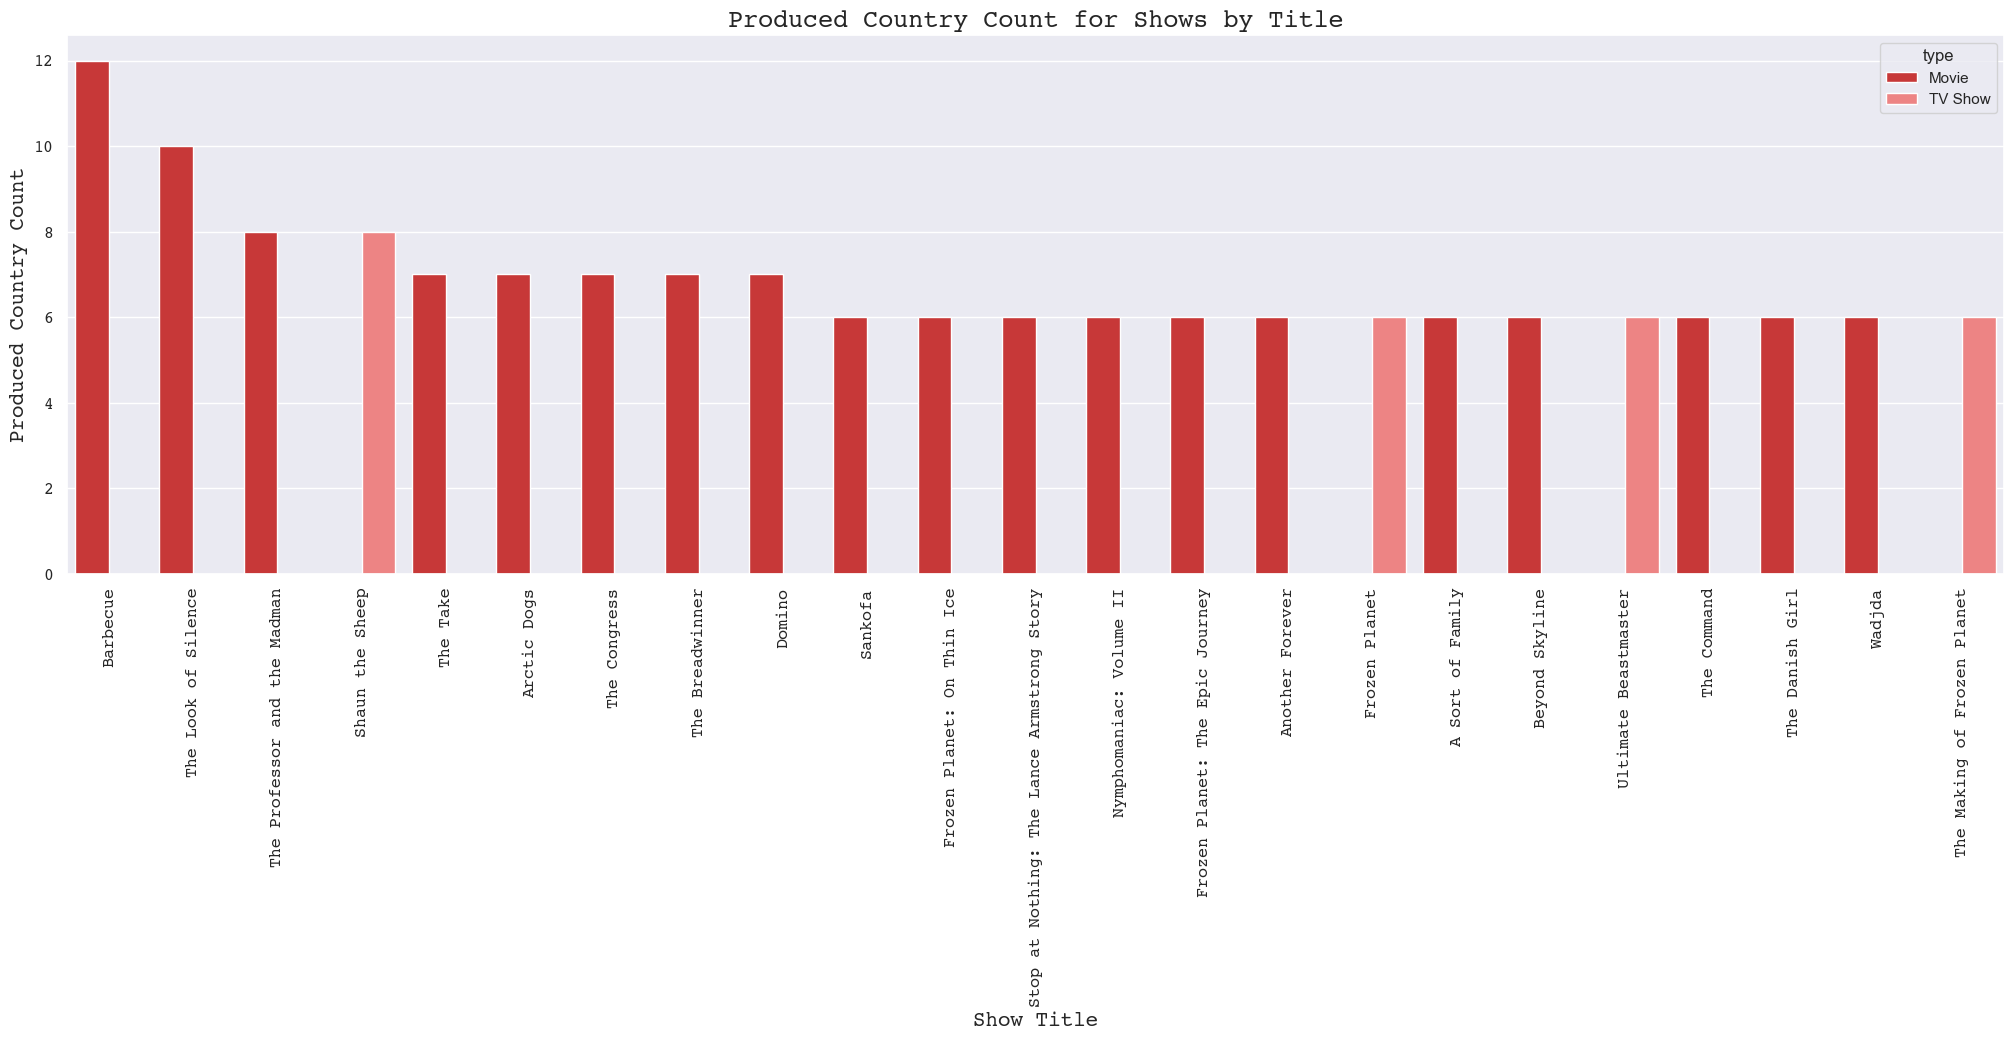

In [323]:
count_order = multi_country_data_merged.sort_values("produced_country_cnt", ascending=False)["title"]
red_palette = ["#DF2020","#FF7272"]
fig=plt.figure(figsize=(25,7))
sns.set(style = 'darkgrid')
sns.barplot(x="title", y="produced_country_cnt", data=multi_country_data_merged, hue="type", order=count_order, palette=red_palette)
plt.xticks(rotation=90, fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Show Title", fontsize = 15, fontname='Courier')
plt.ylabel("Produced Country Count", fontsize = 15, fontname='Courier')
plt.title("Produced Country Count for Shows by Title", fontsize = 18, fontname='Courier')
plt.show()

In [324]:
data

show_id     type                  title          date_added  \
0         s1    Movie   Dick Johnson Is Dead  September 25, 2021   
1         s2  TV Show          Blood & Water  September 24, 2021   
2         s3  TV Show              Ganglands  September 24, 2021   
3         s4  TV Show  Jailbirds New Orleans  September 24, 2021   
4         s5  TV Show           Kota Factory  September 24, 2021   
...      ...      ...                    ...                 ...   
8802   s8803    Movie                 Zodiac   November 20, 2019   
8803   s8804  TV Show            Zombie Dumb        July 1, 2019   
8804   s8805    Movie             Zombieland    November 1, 2019   
8805   s8806    Movie                   Zoom    January 11, 2020   
8806   s8807    Movie                 Zubaan       March 2, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8769 rows x 8 columns]

In [325]:
def get_minutes(data):
    return int(data.split(" ")[0])
movies_data = data[data["type"] == "Movie"]
movies_data["duration_in_mins"] = movies_data["duration"].apply(get_minutes)
movies_data.head()

show_id   type                             title          date_added  \
0       s1  Movie              Dick Johnson Is Dead  September 25, 2021   
6       s7  Movie  My Little Pony: A New Generation  September 24, 2021   
7       s8  Movie                           Sankofa  September 24, 2021   
9      s10  Movie                      The Starling  September 24, 2021   
12     s13  Movie                      Je Suis Karl  September 23, 2021   

    release_year rating duration  \
0           2020  PG-13   90 min   
6           2021     PG   91 min   
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   

                                          description  duration_in_mins  
0   As her father nears the end of his life, filmm...                90  
6   Equestria's divided. But a bright-eyed hero be...                91  
7   On a photo shoot in Ghana, an American model s...               125  
9   A woman adjusting to life after a loss contend...               104  
12  After most of her family is murdered in a terr...               127

In [326]:
movies_data.loc[movies_data["duration_in_mins"] == movies_data["duration_in_mins"].min()]

show_id   type   title    date_added  release_year rating duration  \
3777   s3778  Movie  Silent  June 4, 2019          2014   TV-Y    3 min   

                                            description  duration_in_mins  
3777  "Silent" is an animated short film created by ...                 3

In [327]:
movies_data.loc[movies_data["duration_in_mins"] == movies_data["duration_in_mins"].max()]

show_id   type                       title         date_added  \
4253   s4254  Movie  Black Mirror: Bandersnatch  December 28, 2018   

      release_year rating duration  \
4253          2018  TV-MA  312 min   

                                            description  duration_in_mins  
4253  In 1984, a young programmer begins to question...               312

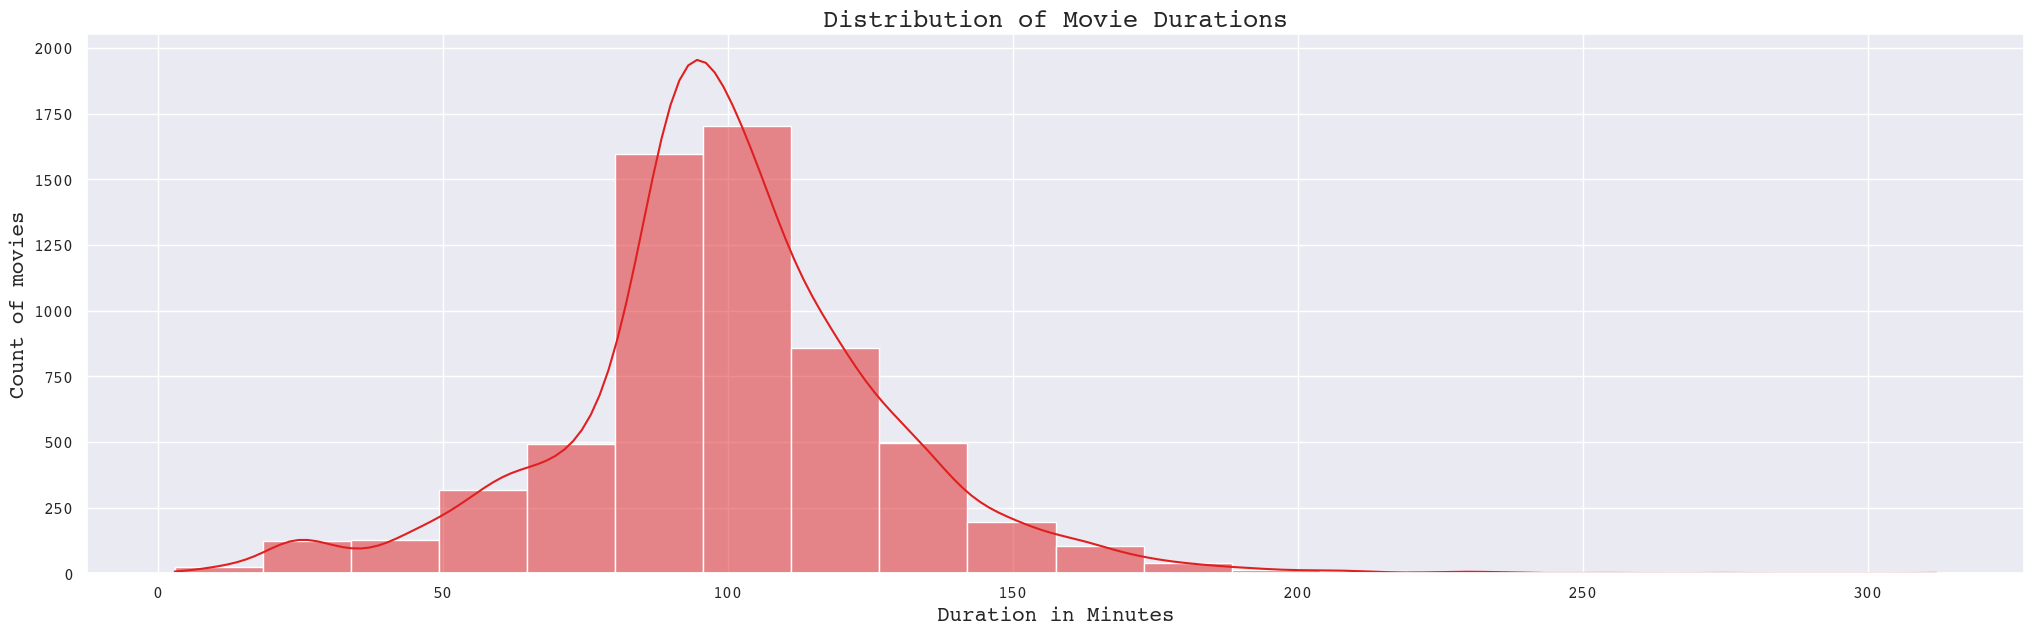

In [328]:
fig=plt.figure(figsize=(25,7))
sns.set(style = 'darkgrid')
sns.histplot(data=movies_data, x="duration_in_mins", bins=20, kde=True, color="#DF2020")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Duration in Minutes", fontsize = 15, fontname='Courier')
plt.ylabel("Count of movies", fontsize = 15, fontname='Courier')
plt.title("Distribution of Movie Durations", fontsize = 18, fontname='Courier')
plt.show()

In [329]:
def get_seasons(data):
    return int(data.split(" ")[0])
tvshow_data = data[data["type"] == "TV Show"]
tvshow_data["seasons"] = tvshow_data["duration"].apply(get_seasons)
tvshow_data.head()

show_id     type                  title          date_added  release_year  \
1      s2  TV Show          Blood & Water  September 24, 2021          2021   
2      s3  TV Show              Ganglands  September 24, 2021          2021   
3      s4  TV Show  Jailbirds New Orleans  September 24, 2021          2021   
4      s5  TV Show           Kota Factory  September 24, 2021          2021   
5      s6  TV Show          Midnight Mass  September 24, 2021          2021   

  rating   duration                                        description  \
1  TV-MA  2 Seasons  After crossing paths at a party, a Cape Town t...   
2  TV-MA   1 Season  To protect his family from a powerful drug lor...   
3  TV-MA   1 Season  Feuds, flirtations and toilet talk go down amo...   
4  TV-MA  2 Seasons  In a city of coaching centers known to train I...   
5  TV-MA   1 Season  The arrival of a charismatic young priest brin...   

   seasons  
1        2  
2        1  
3        1  
4        2  
5        1

In [330]:
tvshow_data.groupby("show_id")["seasons"].aggregate("max").reset_index().sort_values("seasons", ascending=False)

show_id  seasons
1800    s549       17
548    s2424       15
1515   s4799       15
2432   s7848       13
1319   s4221       13
...      ...      ...
1071   s3667        1
1070   s3666        1
1069   s3665        1
1068   s3664        1
2666    s998        1

[2667 rows x 2 columns]

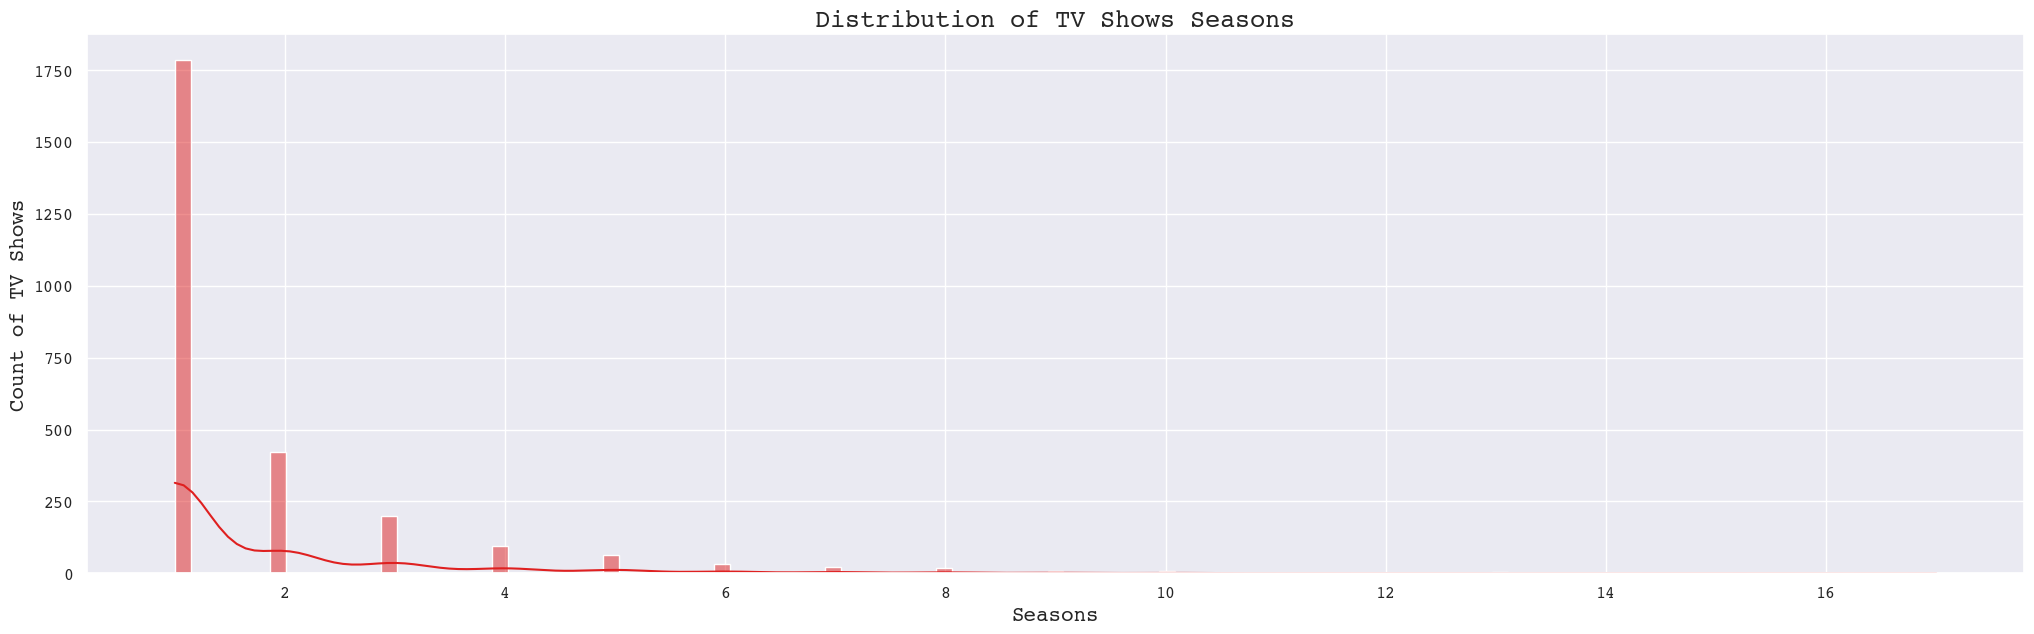

In [331]:
fig=plt.figure(figsize=(25,7))
sns.set(style = 'darkgrid')
sns.histplot(data=tvshow_data.groupby("show_id")["seasons"].aggregate("max").reset_index().sort_values("seasons", ascending=False), x="seasons", kde=True, color="#DF2020")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Seasons", fontsize = 15, fontname='Courier')
plt.ylabel("Count of TV Shows", fontsize = 15, fontname='Courier')
plt.title("Distribution of TV Shows Seasons", fontsize = 18, fontname='Courier')
plt.show()

In [332]:
tvshow_data["seasons"].value_counts().reset_index()

seasons  count
0         1   1786
1         2    423
2         3    199
3         4     95
4         5     65
5         6     33
6         7     23
7         8     17
8         9      9
9        10      7
10       13      3
11       15      2
12       12      2
13       11      2
14       17      1

In [333]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6102 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           6102 non-null   object
 1   type              6102 non-null   object
 2   title             6102 non-null   object
 3   date_added        6102 non-null   object
 4   release_year      6102 non-null   int64 
 5   rating            6102 non-null   object
 6   duration          6102 non-null   object
 7   description       6102 non-null   object
 8   duration_in_mins  6102 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 476.7+ KB


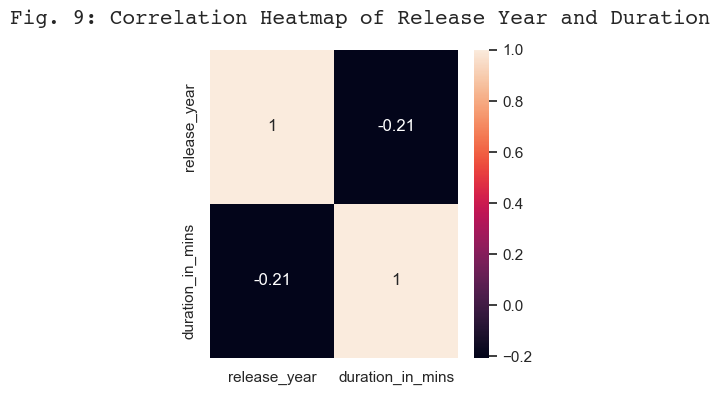

In [334]:
fig=plt.figure(figsize=(4,4)).suptitle("Fig. 9: Correlation Heatmap of Release Year and Duration", fontsize = 15, fontname='Courier')
num_cols = ['release_year', 'duration_in_mins']
corr_mat = movies_data[num_cols].corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

<Figure size 400x400 with 0 Axes>

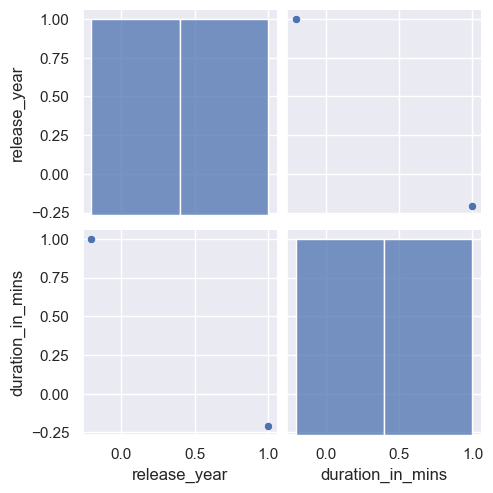

In [335]:
fig=plt.figure(figsize=(4,4)).suptitle("Fig. 10: Pair Plot of Release Year and Duration", fontsize = 15, fontname='Courier')
num_cols = ['release_year', 'duration_in_mins']
corr_mat = movies_data[num_cols].corr()
sns.pairplot(corr_mat)
plt.show()

In [336]:
tvshow_data

show_id     type                  title          date_added  \
1         s2  TV Show          Blood & Water  September 24, 2021   
2         s3  TV Show              Ganglands  September 24, 2021   
3         s4  TV Show  Jailbirds New Orleans  September 24, 2021   
4         s5  TV Show           Kota Factory  September 24, 2021   
5         s6  TV Show          Midnight Mass  September 24, 2021   
...      ...      ...                    ...                 ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V         May 1, 2018   
8796   s8797  TV Show             Yunus Emre    January 17, 2017   
8797   s8798  TV Show              Zak Storm  September 13, 2018   
8800   s8801  TV Show     Zindagi Gulzar Hai   December 15, 2016   
8803   s8804  TV Show            Zombie Dumb        July 1, 2019   

      release_year rating   duration  \
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
5             2021  TV-MA   1 Season   
...            ...    ...        ...   
8795          2015  TV-Y7  2 Seasons   
8796          2016  TV-PG  2 Seasons   
8797          2016  TV-Y7  3 Seasons   
8800          2012  TV-PG   1 Season   
8803          2018  TV-Y7  2 Seasons   

                                            description  seasons  
1     After crossing paths at a party, a Cape Town t...        2  
2     To protect his family from a powerful drug lor...        1  
3     Feuds, flirtations and toilet talk go down amo...        1  
4     In a city of coaching centers known to train I...        2  
5     The arrival of a charismatic young priest brin...        1  
...                                                 ...      ...  
8795  Now that he's discovered the Pendulum Summonin...        2  
8796  During the Mongol invasions, Yunus Emre leaves...        2  
8797  Teen surfer Zak Storm is mysteriously transpor...        3  
8800  Strong-willed, middle-class Kashaf and carefre...        1  
8803  While living alone in a spooky town, a young g...        2  

[2667 rows x 9 columns]

In [337]:
tvshow_data["seasons"] = tvshow_data["seasons"].apply(int)

In [338]:
tvshow_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 1 to 8803
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2667 non-null   object
 1   type          2667 non-null   object
 2   title         2667 non-null   object
 3   date_added    2667 non-null   object
 4   release_year  2667 non-null   int64 
 5   rating        2667 non-null   object
 6   duration      2667 non-null   object
 7   description   2667 non-null   object
 8   seasons       2667 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 208.4+ KB


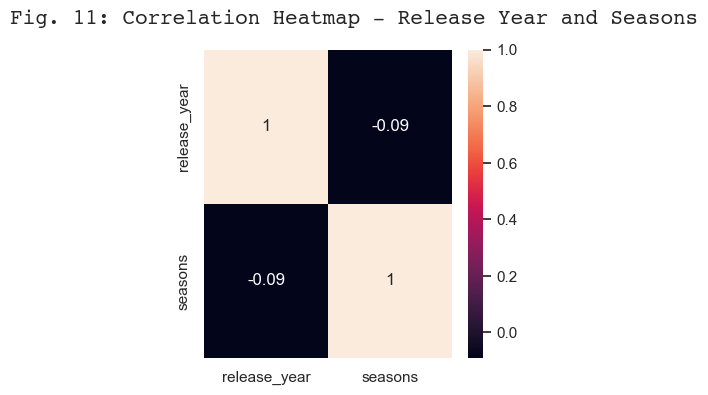

In [339]:
fig=plt.figure(figsize=(4,4)).suptitle("Fig. 11: Correlation Heatmap - Release Year and Seasons", fontsize = 15, fontname='Courier')
num_cols = ['release_year', 'seasons']
corr_mat = tvshow_data[num_cols].corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

<Figure size 400x400 with 0 Axes>

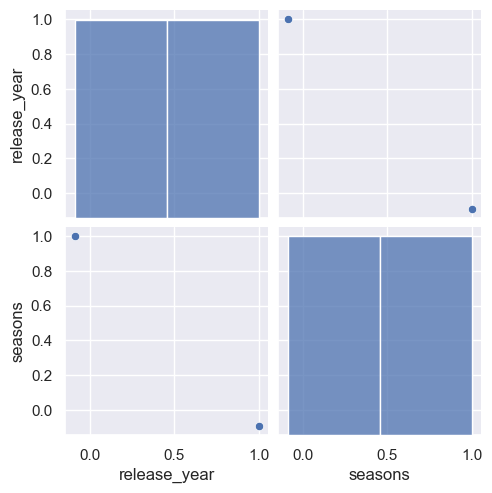

In [340]:
fig=plt.figure(figsize=(4,4)).suptitle("Fig. 12: Correlation Pairplot - Release Year and Seasons", fontsize = 15, fontname='Courier')
num_cols = ['release_year', 'seasons']
corr_mat = tvshow_data[num_cols].corr()
sns.pairplot(corr_mat)
plt.show()

In [341]:
merged_data["date_added"] = pd.to_datetime(merged_data["date_added"].str.strip())

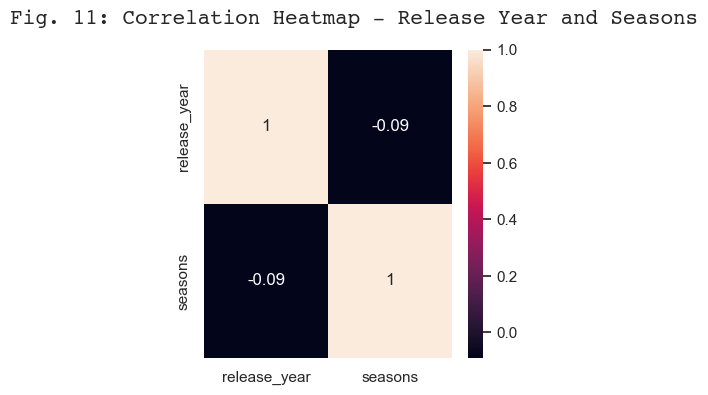

In [342]:
fig=plt.figure(figsize=(4,4)).suptitle("Fig. 11: Correlation Heatmap - Release Year and Seasons", fontsize = 15, fontname='Courier')
num_cols = ['release_year', 'seasons']
corr_mat = tvshow_data[num_cols].corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

In [343]:
def get_decade(data):
    return (data // 10) * 10


In [344]:
movies_data["decade"] = movies_data["release_year"].apply(get_decade)
movies_data

show_id   type                             title          date_added  \
0         s1  Movie              Dick Johnson Is Dead  September 25, 2021   
6         s7  Movie  My Little Pony: A New Generation  September 24, 2021   
7         s8  Movie                           Sankofa  September 24, 2021   
9        s10  Movie                      The Starling  September 24, 2021   
12       s13  Movie                      Je Suis Karl  September 23, 2021   
...      ...    ...                               ...                 ...   
8801   s8802  Movie                           Zinzana       March 9, 2016   
8802   s8803  Movie                            Zodiac   November 20, 2019   
8804   s8805  Movie                        Zombieland    November 1, 2019   
8805   s8806  Movie                              Zoom    January 11, 2020   
8806   s8807  Movie                            Zubaan       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                            description  duration_in_mins  \
0     As her father nears the end of his life, filmm...                90   
6     Equestria's divided. But a bright-eyed hero be...                91   
7     On a photo shoot in Ghana, an American model s...               125   
9     A woman adjusting to life after a loss contend...               104   
12    After most of her family is murdered in a terr...               127   
...                                                 ...               ...   
8801  Recovering alcoholic Talal wakes up inside a s...                96   
8802  A political cartoonist, a crime reporter and a...               158   
8804  Looking to survive in a world taken over by zo...                88   
8805  Dragged from civilian life, a former superhero...                88   
8806  A scrappy but poor boy worms his way into a ty...               111   

      decade  
0       2020  
6       2020  
7       1990  
9       2020  
12      2020  
...      ...  
8801    2010  
8802    2000  
8804    2000  
8805    2000  
8806    2010  

[6102 rows x 10 columns]

In [345]:
tvshow_data["decade"] = tvshow_data["release_year"].apply(get_decade)
tvshow_data

show_id     type                  title          date_added  \
1         s2  TV Show          Blood & Water  September 24, 2021   
2         s3  TV Show              Ganglands  September 24, 2021   
3         s4  TV Show  Jailbirds New Orleans  September 24, 2021   
4         s5  TV Show           Kota Factory  September 24, 2021   
5         s6  TV Show          Midnight Mass  September 24, 2021   
...      ...      ...                    ...                 ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V         May 1, 2018   
8796   s8797  TV Show             Yunus Emre    January 17, 2017   
8797   s8798  TV Show              Zak Storm  September 13, 2018   
8800   s8801  TV Show     Zindagi Gulzar Hai   December 15, 2016   
8803   s8804  TV Show            Zombie Dumb        July 1, 2019   

      release_year rating   duration  \
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
5             2021  TV-MA   1 Season   
...            ...    ...        ...   
8795          2015  TV-Y7  2 Seasons   
8796          2016  TV-PG  2 Seasons   
8797          2016  TV-Y7  3 Seasons   
8800          2012  TV-PG   1 Season   
8803          2018  TV-Y7  2 Seasons   

                                            description  seasons  decade  
1     After crossing paths at a party, a Cape Town t...        2    2020  
2     To protect his family from a powerful drug lor...        1    2020  
3     Feuds, flirtations and toilet talk go down amo...        1    2020  
4     In a city of coaching centers known to train I...        2    2020  
5     The arrival of a charismatic young priest brin...        1    2020  
...                                                 ...      ...     ...  
8795  Now that he's discovered the Pendulum Summonin...        2    2010  
8796  During the Mongol invasions, Yunus Emre leaves...        2    2010  
8797  Teen surfer Zak Storm is mysteriously transpor...        3    2010  
8800  Strong-willed, middle-class Kashaf and carefre...        1    2010  
8803  While living alone in a spooky town, a young g...        2    2010  

[2667 rows x 10 columns]

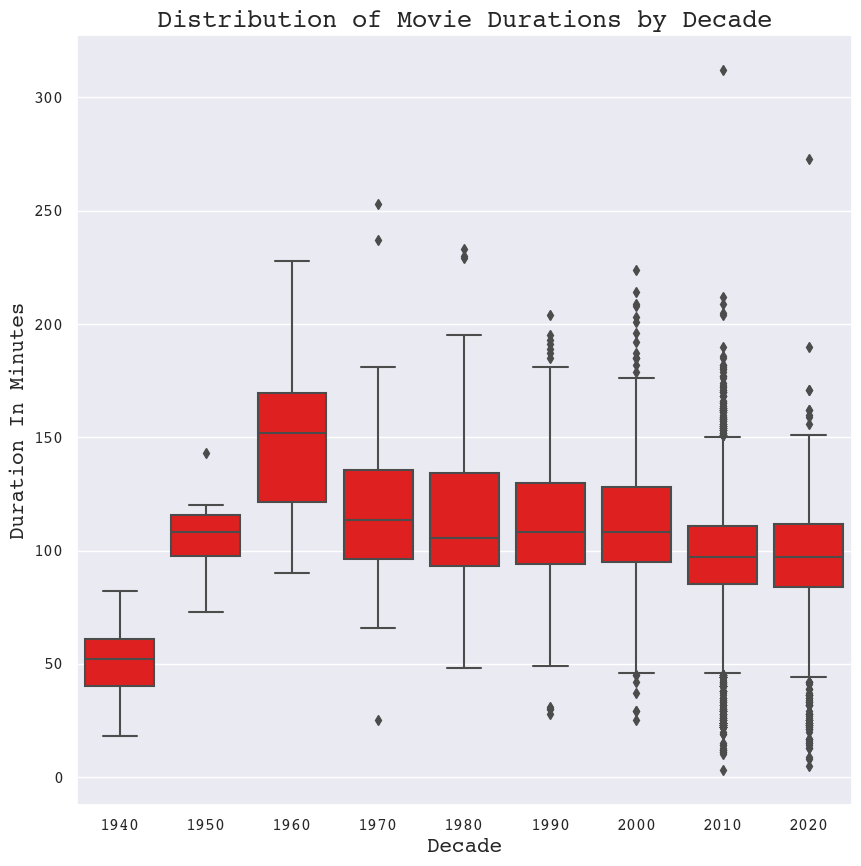

In [346]:
fig=plt.figure(figsize=(10,10))
sns.set(style = 'darkgrid')
sns.boxplot(x="decade", y="duration_in_mins", data=movies_data, color="red")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Decade", fontsize = 15, fontname='Courier')
plt.ylabel("Duration In Minutes", fontsize = 15, fontname='Courier')
plt.title("Distribution of Movie Durations by Decade", fontsize = 18, fontname='Courier')
plt.show()

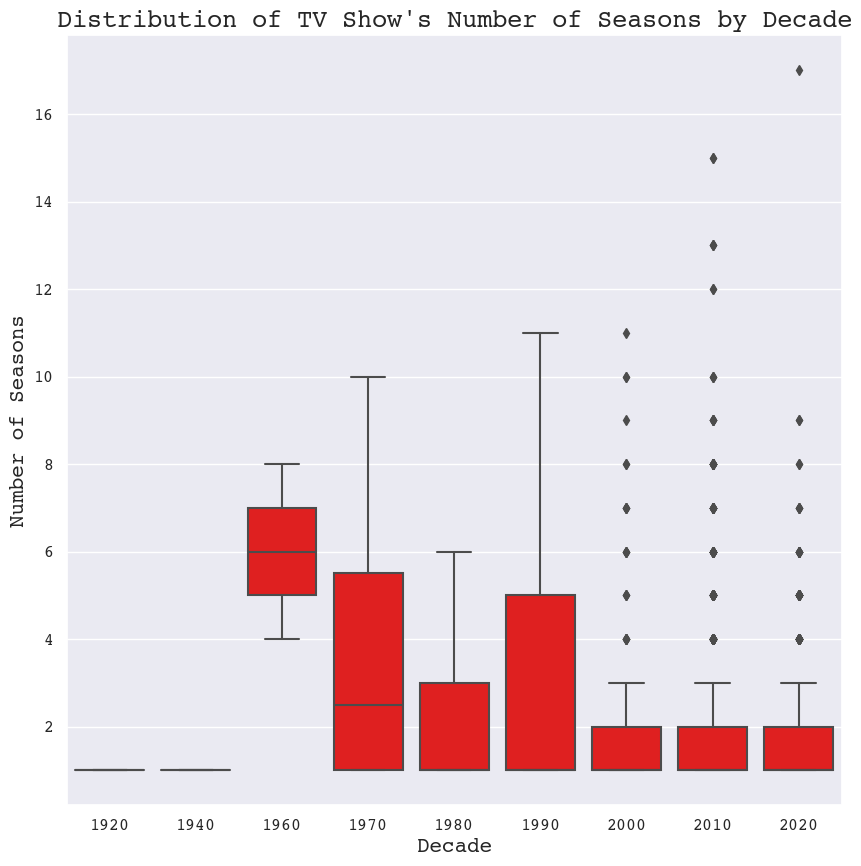

In [347]:
fig=plt.figure(figsize=(10,10))
sns.set(style = 'darkgrid')
sns.boxplot(x="decade", y="seasons", data=tvshow_data, color="red")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Decade", fontsize = 15, fontname='Courier')
plt.ylabel("Number of Seasons", fontsize = 15, fontname='Courier')
plt.title("Distribution of TV Show's Number of Seasons by Decade", fontsize = 18, fontname='Courier')
plt.show()

In [348]:
top_5_countries = data_country["country"].value_counts().reset_index().head(5)["country"].tolist()
top_5_countries

['United States', 'India', 'United Kingdom', 'Canada', 'France']

In [349]:
top_5_countries_movie_data = movies_data.merge(data_country.loc[data_country["country"].isin(top_5_countries)], on="show_id")
top_5_countries_movie_data

show_id   type                             title          date_added  \
0         s1  Movie              Dick Johnson Is Dead  September 25, 2021   
1         s7  Movie  My Little Pony: A New Generation  September 24, 2021   
2         s8  Movie                           Sankofa  September 24, 2021   
3         s8  Movie                           Sankofa  September 24, 2021   
4        s10  Movie                      The Starling  September 24, 2021   
...      ...    ...                               ...                 ...   
5145   s8800  Movie                             Zenda   February 15, 2018   
5146   s8803  Movie                            Zodiac   November 20, 2019   
5147   s8805  Movie                        Zombieland    November 1, 2019   
5148   s8806  Movie                              Zoom    January 11, 2020   
5149   s8807  Movie                            Zubaan       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
1             2021     PG   91 min   
2             1993  TV-MA  125 min   
3             1993  TV-MA  125 min   
4             2021  PG-13  104 min   
...            ...    ...      ...   
5145          2009  TV-14  120 min   
5146          2007      R  158 min   
5147          2009      R   88 min   
5148          2006     PG   88 min   
5149          2015  TV-14  111 min   

                                            description  duration_in_mins  \
0     As her father nears the end of his life, filmm...                90   
1     Equestria's divided. But a bright-eyed hero be...                91   
2     On a photo shoot in Ghana, an American model s...               125   
3     On a photo shoot in Ghana, an American model s...               125   
4     A woman adjusting to life after a loss contend...               104   
...                                                 ...               ...   
5145  A change in the leadership of a political part...               120   
5146  A political cartoonist, a crime reporter and a...               158   
5147  Looking to survive in a world taken over by zo...                88   
5148  Dragged from civilian life, a former superhero...                88   
5149  A scrappy but poor boy worms his way into a ty...               111   

      decade         country  
0       2020   United States  
1       2020   United States  
2       1990   United States  
3       1990  United Kingdom  
4       2020   United States  
...      ...             ...  
5145    2000           India  
5146    2000   United States  
5147    2000   United States  
5148    2000   United States  
5149    2010           India  

[5150 rows x 11 columns]

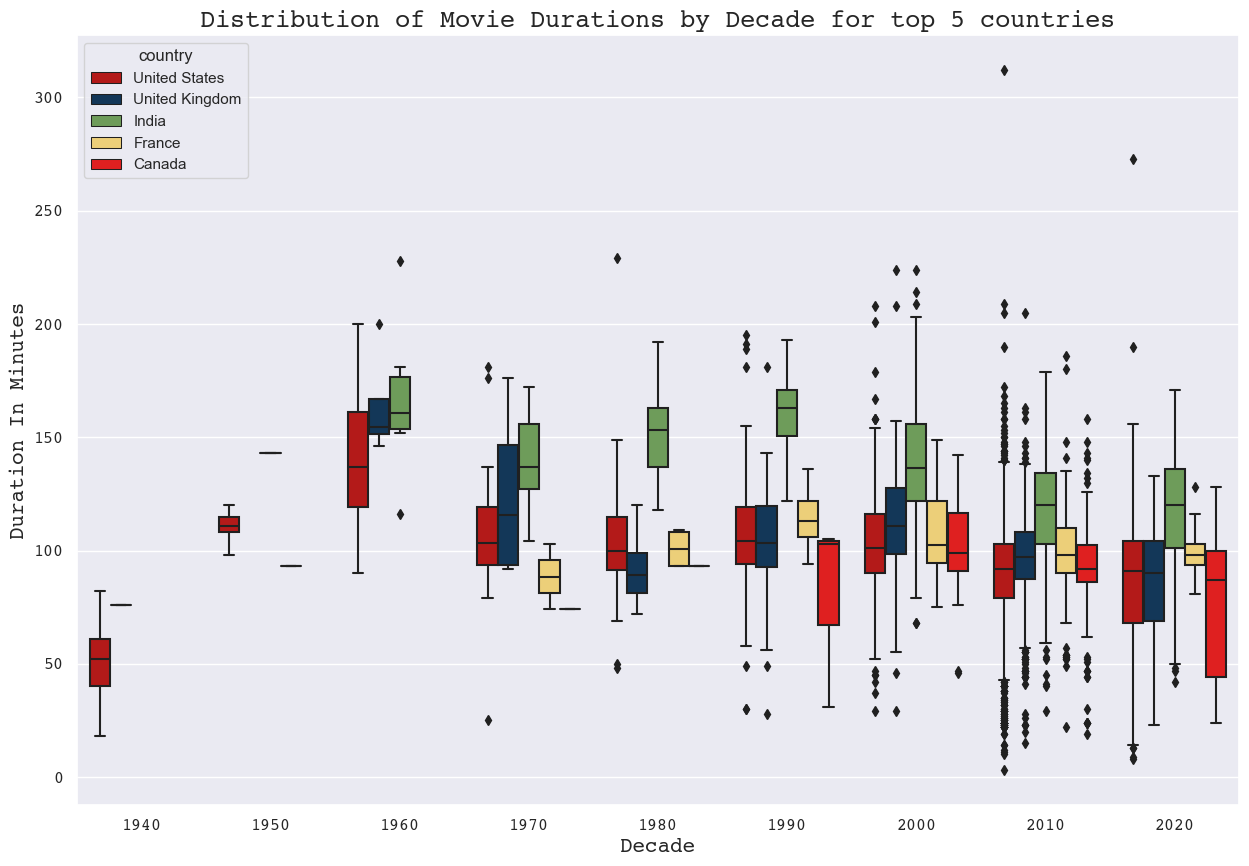

In [350]:
fig=plt.figure(figsize=(15,10))
sns.set(style = 'darkgrid')
color_palette = ["#CC0100","#083763", "#6AA74F", "#FFD866", "red"]
sns.boxplot(x="decade", y="duration_in_mins", data=top_5_countries_movie_data, hue="country", palette=color_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Decade", fontsize = 15, fontname='Courier')
plt.ylabel("Duration In Minutes", fontsize = 15, fontname='Courier')
plt.title("Distribution of Movie Durations by Decade for top 5 countries", fontsize = 18, fontname='Courier')
plt.show()

In [351]:
top_5_countries_shows_data = tvshow_data.merge(data_country.loc[data_country["country"].isin(top_5_countries)], on="show_id")
top_5_countries_shows_data

show_id     type                          title          date_added  \
0         s3  TV Show                      Ganglands  September 24, 2021   
1         s4  TV Show          Jailbirds New Orleans  September 24, 2021   
2         s5  TV Show                   Kota Factory  September 24, 2021   
3         s6  TV Show                  Midnight Mass  September 24, 2021   
4         s9  TV Show  The Great British Baking Show  September 24, 2021   
...      ...      ...                            ...                 ...   
1873   s8786  TV Show                            YOM        June 7, 2018   
1874   s8796  TV Show                Yu-Gi-Oh! Arc-V         May 1, 2018   
1875   s8798  TV Show                      Zak Storm  September 13, 2018   
1876   s8798  TV Show                      Zak Storm  September 13, 2018   
1877   s8804  TV Show                    Zombie Dumb        July 1, 2019   

      release_year rating   duration  \
0             2021  TV-MA   1 Season   
1             2021  TV-MA   1 Season   
2             2021  TV-MA  2 Seasons   
3             2021  TV-MA   1 Season   
4             2021  TV-14  9 Seasons   
...            ...    ...        ...   
1873          2016  TV-Y7   1 Season   
1874          2015  TV-Y7  2 Seasons   
1875          2016  TV-Y7  3 Seasons   
1876          2016  TV-Y7  3 Seasons   
1877          2018  TV-Y7  2 Seasons   

                                            description  seasons  decade  \
0     To protect his family from a powerful drug lor...        1    2020   
1     Feuds, flirtations and toilet talk go down amo...        1    2020   
2     In a city of coaching centers known to train I...        2    2020   
3     The arrival of a charismatic young priest brin...        1    2020   
4     A talented batch of amateur bakers face off in...        9    2020   
...                                                 ...      ...     ...   
1873  With the mind of a human being, and the body o...        1    2010   
1874  Now that he's discovered the Pendulum Summonin...        2    2010   
1875  Teen surfer Zak Storm is mysteriously transpor...        3    2010   
1876  Teen surfer Zak Storm is mysteriously transpor...        3    2010   
1877  While living alone in a spooky town, a young g...        2    2010   

             country  
0             France  
1      United States  
2              India  
3      United States  
4     United Kingdom  
...              ...  
1873   United States  
1874          Canada  
1875   United States  
1876          France  
1877   United States  

[1878 rows x 11 columns]

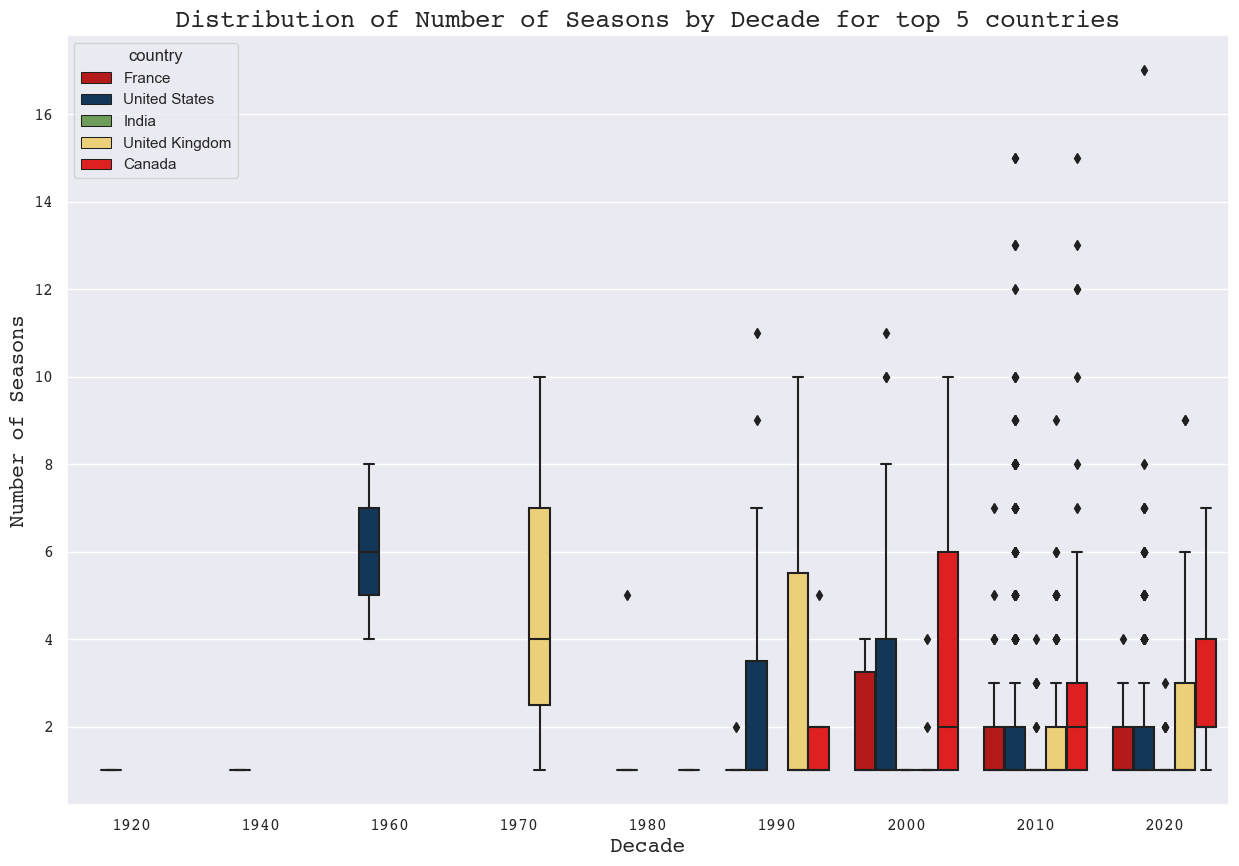

In [352]:
fig=plt.figure(figsize=(15,10))
sns.set(style = 'darkgrid')
color_palette = ["#CC0100","#083763", "#6AA74F", "#FFD866", "red"]
sns.boxplot(x="decade", y="seasons", data=top_5_countries_shows_data, hue="country", palette=color_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Decade", fontsize = 15, fontname='Courier')
plt.ylabel("Number of Seasons", fontsize = 15, fontname='Courier')
plt.title("Distribution of Number of Seasons by Decade for top 5 countries", fontsize = 18, fontname='Courier')

plt.show()

In [353]:
data_country["country"].value_counts().reset_index().head(10)

country  count
0   United States   4222
1           India   1137
2  United Kingdom    820
3          Canada    449
4          France    400
5           Japan    338
6           Spain    239
7     South Korea    234
8         Germany    229
9          Mexico    174

In [354]:
top_5_countries = data_country["country"].value_counts().reset_index().head(10).head(5)["country"].tolist()
top_5_countries

['United States', 'India', 'United Kingdom', 'Canada', 'France']

In [355]:
next_5_countries = data_country["country"].value_counts().reset_index().head(10).tail(5)["country"].tolist()
next_5_countries

['Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']

In [356]:
merged_data["date_added"] = merged_data["date_added"].apply(pd.to_datetime)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201598 entries, 0 to 201597
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201598 non-null  object        
 1   type          201598 non-null  object        
 2   title         201598 non-null  object        
 3   date_added    201598 non-null  datetime64[ns]
 4   release_year  201598 non-null  int64         
 5   rating        201598 non-null  object        
 6   duration      201598 non-null  object        
 7   description   201598 non-null  object        
 8   director      201558 non-null  object        
 9   cast          201598 non-null  object        
 10  country       201598 non-null  object        
 11  listed_in     201598 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [357]:
merged_data

show_id     type                 title date_added  release_year rating  \
0           s1    Movie  Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
2           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
3           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
4           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
...        ...      ...                   ...        ...           ...    ...   
201593   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201594   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201595   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201596   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201597   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   

         duration                                        description  \
0          90 min  As her father nears the end of his life, filmm...   
1       2 Seasons  After crossing paths at a party, a Cape Town t...   
2       2 Seasons  After crossing paths at a party, a Cape Town t...   
3       2 Seasons  After crossing paths at a party, a Cape Town t...   
4       2 Seasons  After crossing paths at a party, a Cape Town t...   
...           ...                                                ...   
201593    111 min  A scrappy but poor boy worms his way into a ty...   
201594    111 min  A scrappy but poor boy worms his way into a ty...   
201595    111 min  A scrappy but poor boy worms his way into a ty...   
201596    111 min  A scrappy but poor boy worms his way into a ty...   
201597    111 min  A scrappy but poor boy worms his way into a ty...   

               director                   cast        country  \
0       Kirsten Johnson           Quincy Jones  United States   
1        Clint Eastwood             Ama Qamata   South Africa   
2        Clint Eastwood             Ama Qamata   South Africa   
3        Clint Eastwood             Ama Qamata   South Africa   
4        Clint Eastwood            Khosi Ngema   South Africa   
...                 ...                    ...            ...   
201593      Mozez Singh         Anita Shabdish          India   
201594      Mozez Singh         Anita Shabdish          India   
201595      Mozez Singh  Chittaranjan Tripathy          India   
201596      Mozez Singh  Chittaranjan Tripathy          India   
201597      Mozez Singh  Chittaranjan Tripathy          India   

                     listed_in  
0                Documentaries  
1       International TV Shows  
2                    TV Dramas  
3                 TV Mysteries  
4       International TV Shows  
...                        ...  
201593    International Movies  
201594        Music & Musicals  
201595                  Dramas  
201596    International Movies  
201597        Music & Musicals  

[201598 rows x 12 columns]

In [358]:
merged_data["date_added_year"] = merged_data["date_added"].dt.year

In [359]:
merged_data["date_added_qtr"] = "Q-"+ merged_data["date_added"].dt.quarter.astype(str)
merged_data

show_id     type                 title date_added  release_year rating  \
0           s1    Movie  Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
2           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
3           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
4           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
...        ...      ...                   ...        ...           ...    ...   
201593   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201594   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201595   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201596   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201597   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   

         duration                                        description  \
0          90 min  As her father nears the end of his life, filmm...   
1       2 Seasons  After crossing paths at a party, a Cape Town t...   
2       2 Seasons  After crossing paths at a party, a Cape Town t...   
3       2 Seasons  After crossing paths at a party, a Cape Town t...   
4       2 Seasons  After crossing paths at a party, a Cape Town t...   
...           ...                                                ...   
201593    111 min  A scrappy but poor boy worms his way into a ty...   
201594    111 min  A scrappy but poor boy worms his way into a ty...   
201595    111 min  A scrappy but poor boy worms his way into a ty...   
201596    111 min  A scrappy but poor boy worms his way into a ty...   
201597    111 min  A scrappy but poor boy worms his way into a ty...   

               director                   cast        country  \
0       Kirsten Johnson           Quincy Jones  United States   
1        Clint Eastwood             Ama Qamata   South Africa   
2        Clint Eastwood             Ama Qamata   South Africa   
3        Clint Eastwood             Ama Qamata   South Africa   
4        Clint Eastwood            Khosi Ngema   South Africa   
...                 ...                    ...            ...   
201593      Mozez Singh         Anita Shabdish          India   
201594      Mozez Singh         Anita Shabdish          India   
201595      Mozez Singh  Chittaranjan Tripathy          India   
201596      Mozez Singh  Chittaranjan Tripathy          India   
201597      Mozez Singh  Chittaranjan Tripathy          India   

                     listed_in  date_added_year date_added_qtr  
0                Documentaries             2021            Q-3  
1       International TV Shows             2021            Q-3  
2                    TV Dramas             2021            Q-3  
3                 TV Mysteries             2021            Q-3  
4       International TV Shows             2021            Q-3  
...                        ...              ...            ...  
201593    International Movies             2019            Q-1  
201594        Music & Musicals             2019            Q-1  
201595                  Dramas             2019            Q-1  
201596    International Movies             2019            Q-1  
201597        Music & Musicals             2019            Q-1  

[201598 rows x 14 columns]

In [360]:
merged_data["date_added_dec"] = merged_data["date_added"].dt.year.apply(get_decade)
merged_data["release_year_dec"] = merged_data["release_year"].apply(get_decade)
merged_data

show_id     type                 title date_added  release_year rating  \
0           s1    Movie  Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
2           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
3           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
4           s2  TV Show         Blood & Water 2021-09-24          2021  TV-MA   
...        ...      ...                   ...        ...           ...    ...   
201593   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201594   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201595   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201596   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   
201597   s8807    Movie                Zubaan 2019-03-02          2015  TV-14   

         duration                                        description  \
0          90 min  As her father nears the end of his life, filmm...   
1       2 Seasons  After crossing paths at a party, a Cape Town t...   
2       2 Seasons  After crossing paths at a party, a Cape Town t...   
3       2 Seasons  After crossing paths at a party, a Cape Town t...   
4       2 Seasons  After crossing paths at a party, a Cape Town t...   
...           ...                                                ...   
201593    111 min  A scrappy but poor boy worms his way into a ty...   
201594    111 min  A scrappy but poor boy worms his way into a ty...   
201595    111 min  A scrappy but poor boy worms his way into a ty...   
201596    111 min  A scrappy but poor boy worms his way into a ty...   
201597    111 min  A scrappy but poor boy worms his way into a ty...   

               director                   cast        country  \
0       Kirsten Johnson           Quincy Jones  United States   
1        Clint Eastwood             Ama Qamata   South Africa   
2        Clint Eastwood             Ama Qamata   South Africa   
3        Clint Eastwood             Ama Qamata   South Africa   
4        Clint Eastwood            Khosi Ngema   South Africa   
...                 ...                    ...            ...   
201593      Mozez Singh         Anita Shabdish          India   
201594      Mozez Singh         Anita Shabdish          India   
201595      Mozez Singh  Chittaranjan Tripathy          India   
201596      Mozez Singh  Chittaranjan Tripathy          India   
201597      Mozez Singh  Chittaranjan Tripathy          India   

                     listed_in  date_added_year date_added_qtr  \
0                Documentaries             2021            Q-3   
1       International TV Shows             2021            Q-3   
2                    TV Dramas             2021            Q-3   
3                 TV Mysteries             2021            Q-3   
4       International TV Shows             2021            Q-3   
...                        ...              ...            ...   
201593    International Movies             2019            Q-1   
201594        Music & Musicals             2019            Q-1   
201595                  Dramas             2019            Q-1   
201596    International Movies             2019            Q-1   
201597        Music & Musicals             2019            Q-1   

        date_added_dec  release_year_dec  
0                 2020              2020  
1                 2020              2020  
2                 2020              2020  
3                 2020              2020  
4                 2020              2020  
...                ...               ...  
201593            2010              2010  
201594            2010              2010  
201595            2010              2010  
201596            2010              2010  
201597            2010              2010  

[201598 rows x 16 columns]

In [361]:
movies_cntry_genre_dec = merged_data[(merged_data["country"].isin(top_5_countries)) & (merged_data["type"] == "Movie")].groupby(["country","listed_in","date_added_dec"])["show_id"].aggregate(
    movie_count = ("nunique")
    ).reset_index()
movies_cntry_genre_dec

country                 listed_in  date_added_dec  movie_count
0           Canada        Action & Adventure            2010           25
1           Canada        Action & Adventure            2020           19
2           Canada  Children & Family Movies            2010           43
3           Canada  Children & Family Movies            2020           37
4           Canada                  Comedies            2010           62
..             ...                       ...             ...          ...
181  United States           Stand-Up Comedy            2010          201
182  United States           Stand-Up Comedy            2020           34
183  United States                 Thrillers            2000            1
184  United States                 Thrillers            2010          166
185  United States                 Thrillers            2020          129

[186 rows x 4 columns]

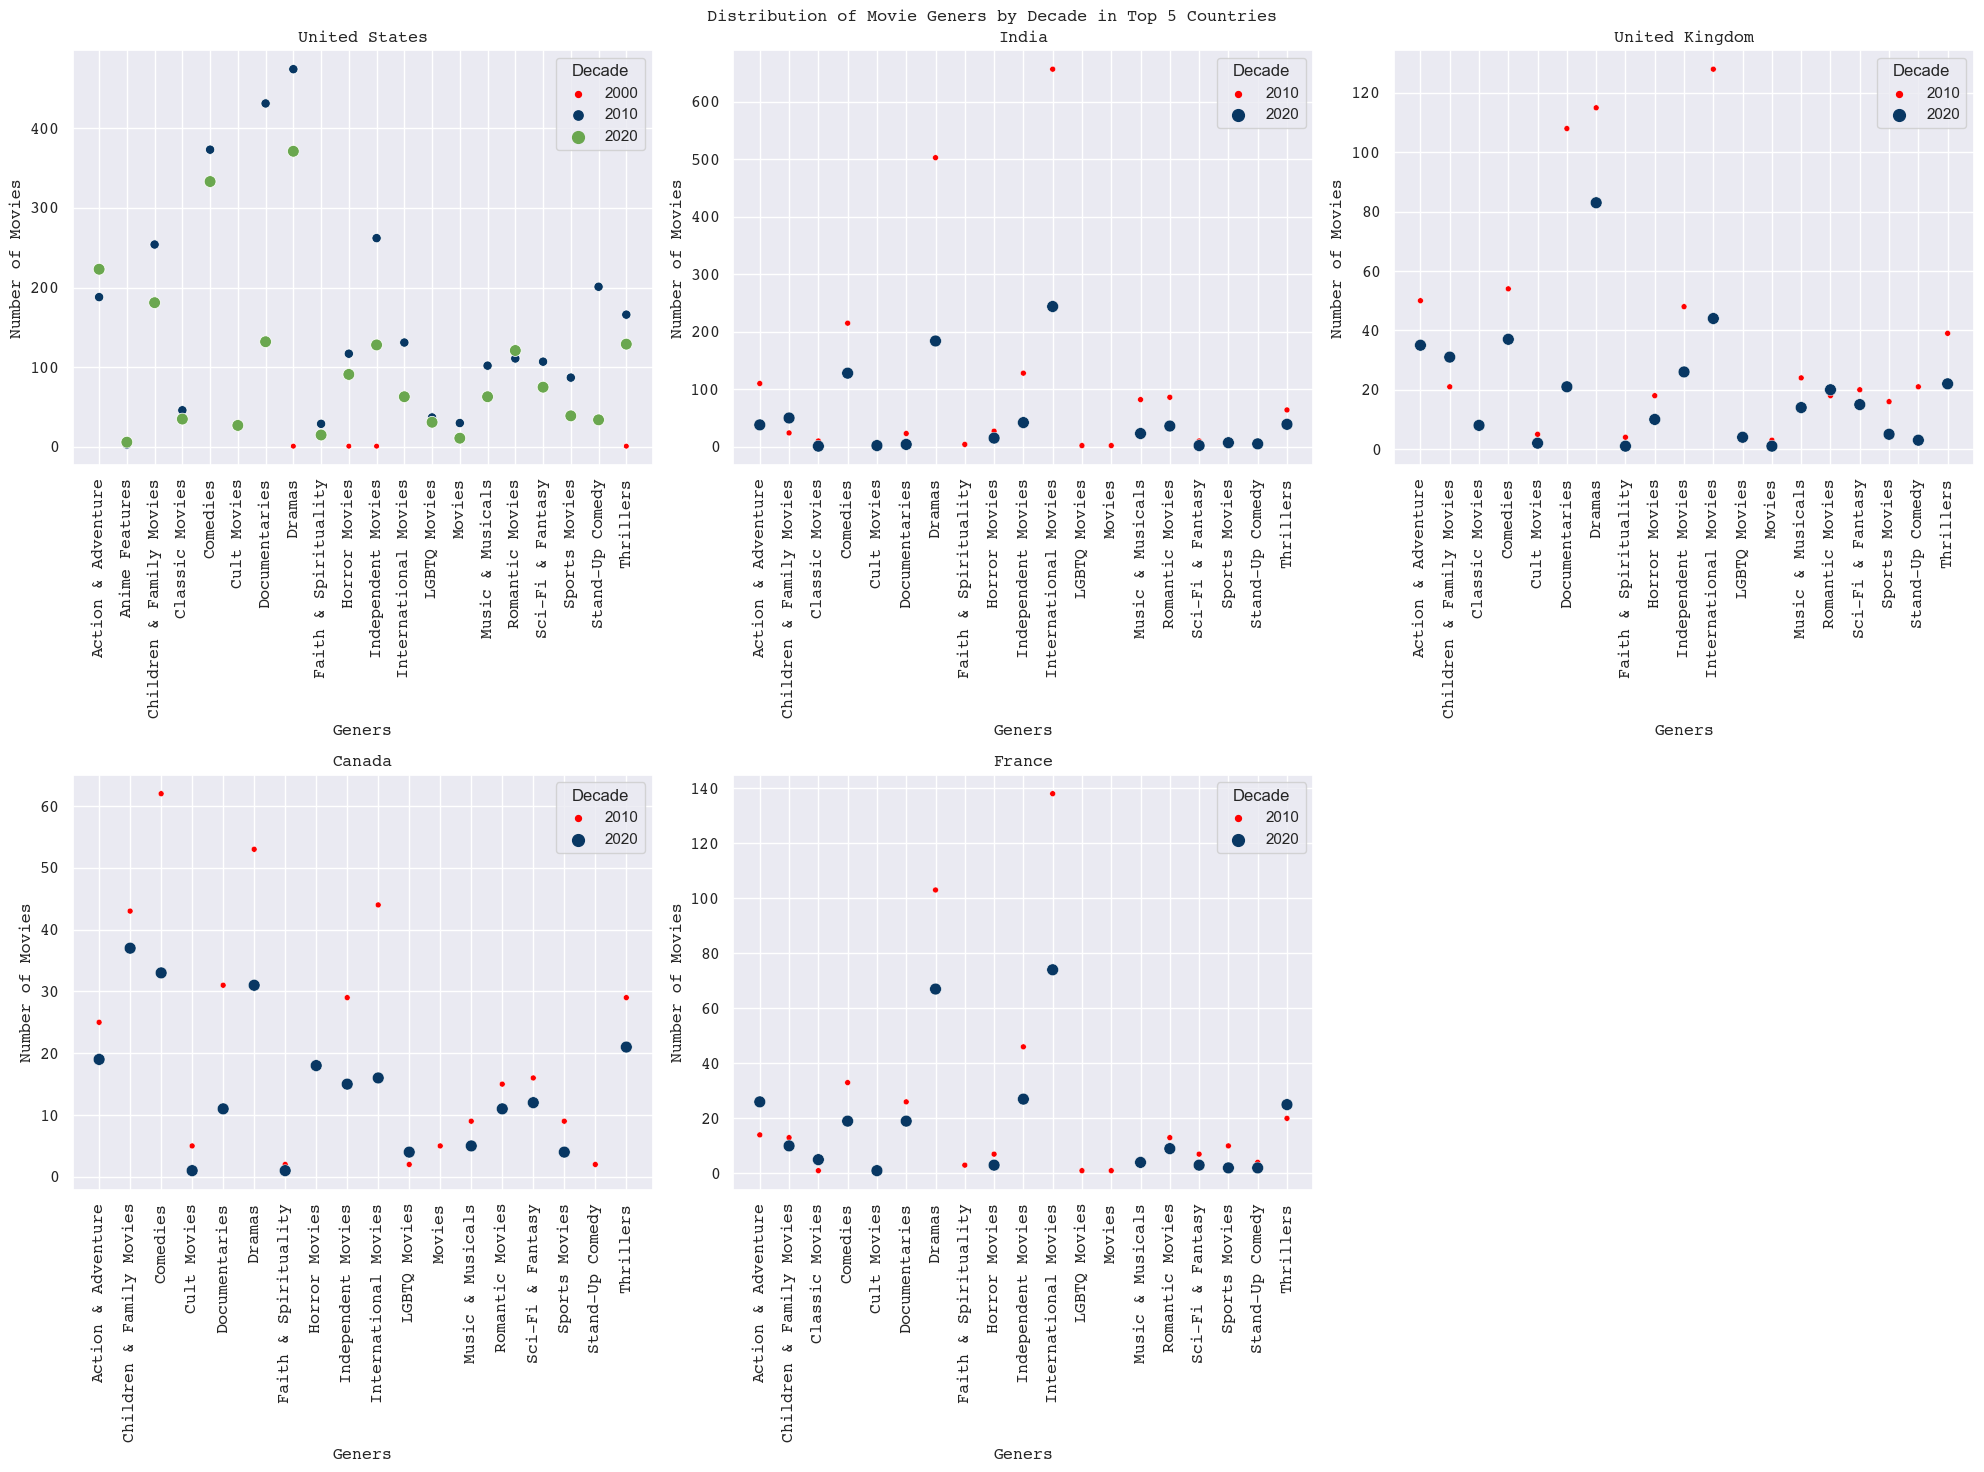

In [362]:
fig=plt.figure(figsize=(20,15)).suptitle("Distribution of Movie Geners by Decade in Top 5 Countries", fontsize = 12, fontname='Courier')

plt.subplot(2,3,1)
plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec", size = "date_added_dec",data=movies_cntry_genre_dec.loc[movies_cntry_genre_dec["country"] == top_5_countries[0]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,2)
plt.title(top_5_countries[1],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec", size = "date_added_dec", data=movies_cntry_genre_dec.loc[movies_cntry_genre_dec["country"] == top_5_countries[1]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,3)
plt.title(top_5_countries[2],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec",size = "date_added_dec", data=movies_cntry_genre_dec.loc[movies_cntry_genre_dec["country"] == top_5_countries[2]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,4)
plt.title(top_5_countries[3],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec",size = "date_added_dec", data=movies_cntry_genre_dec.loc[movies_cntry_genre_dec["country"] == top_5_countries[3]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,5)
plt.title(top_5_countries[4],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec",size = "date_added_dec",data=movies_cntry_genre_dec.loc[movies_cntry_genre_dec["country"] == top_5_countries[4]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.tight_layout()
plt.show()

In [363]:
tvshows_cntry_genre_dec = merged_data[(merged_data["country"].isin(top_5_countries)) & (merged_data["type"] == "TV Show")].groupby(["country","listed_in","date_added_dec"])["show_id"].aggregate(
    movie_count = ("nunique")
    ).reset_index()
tvshows_cntry_genre_dec.to_csv("temp.csv")

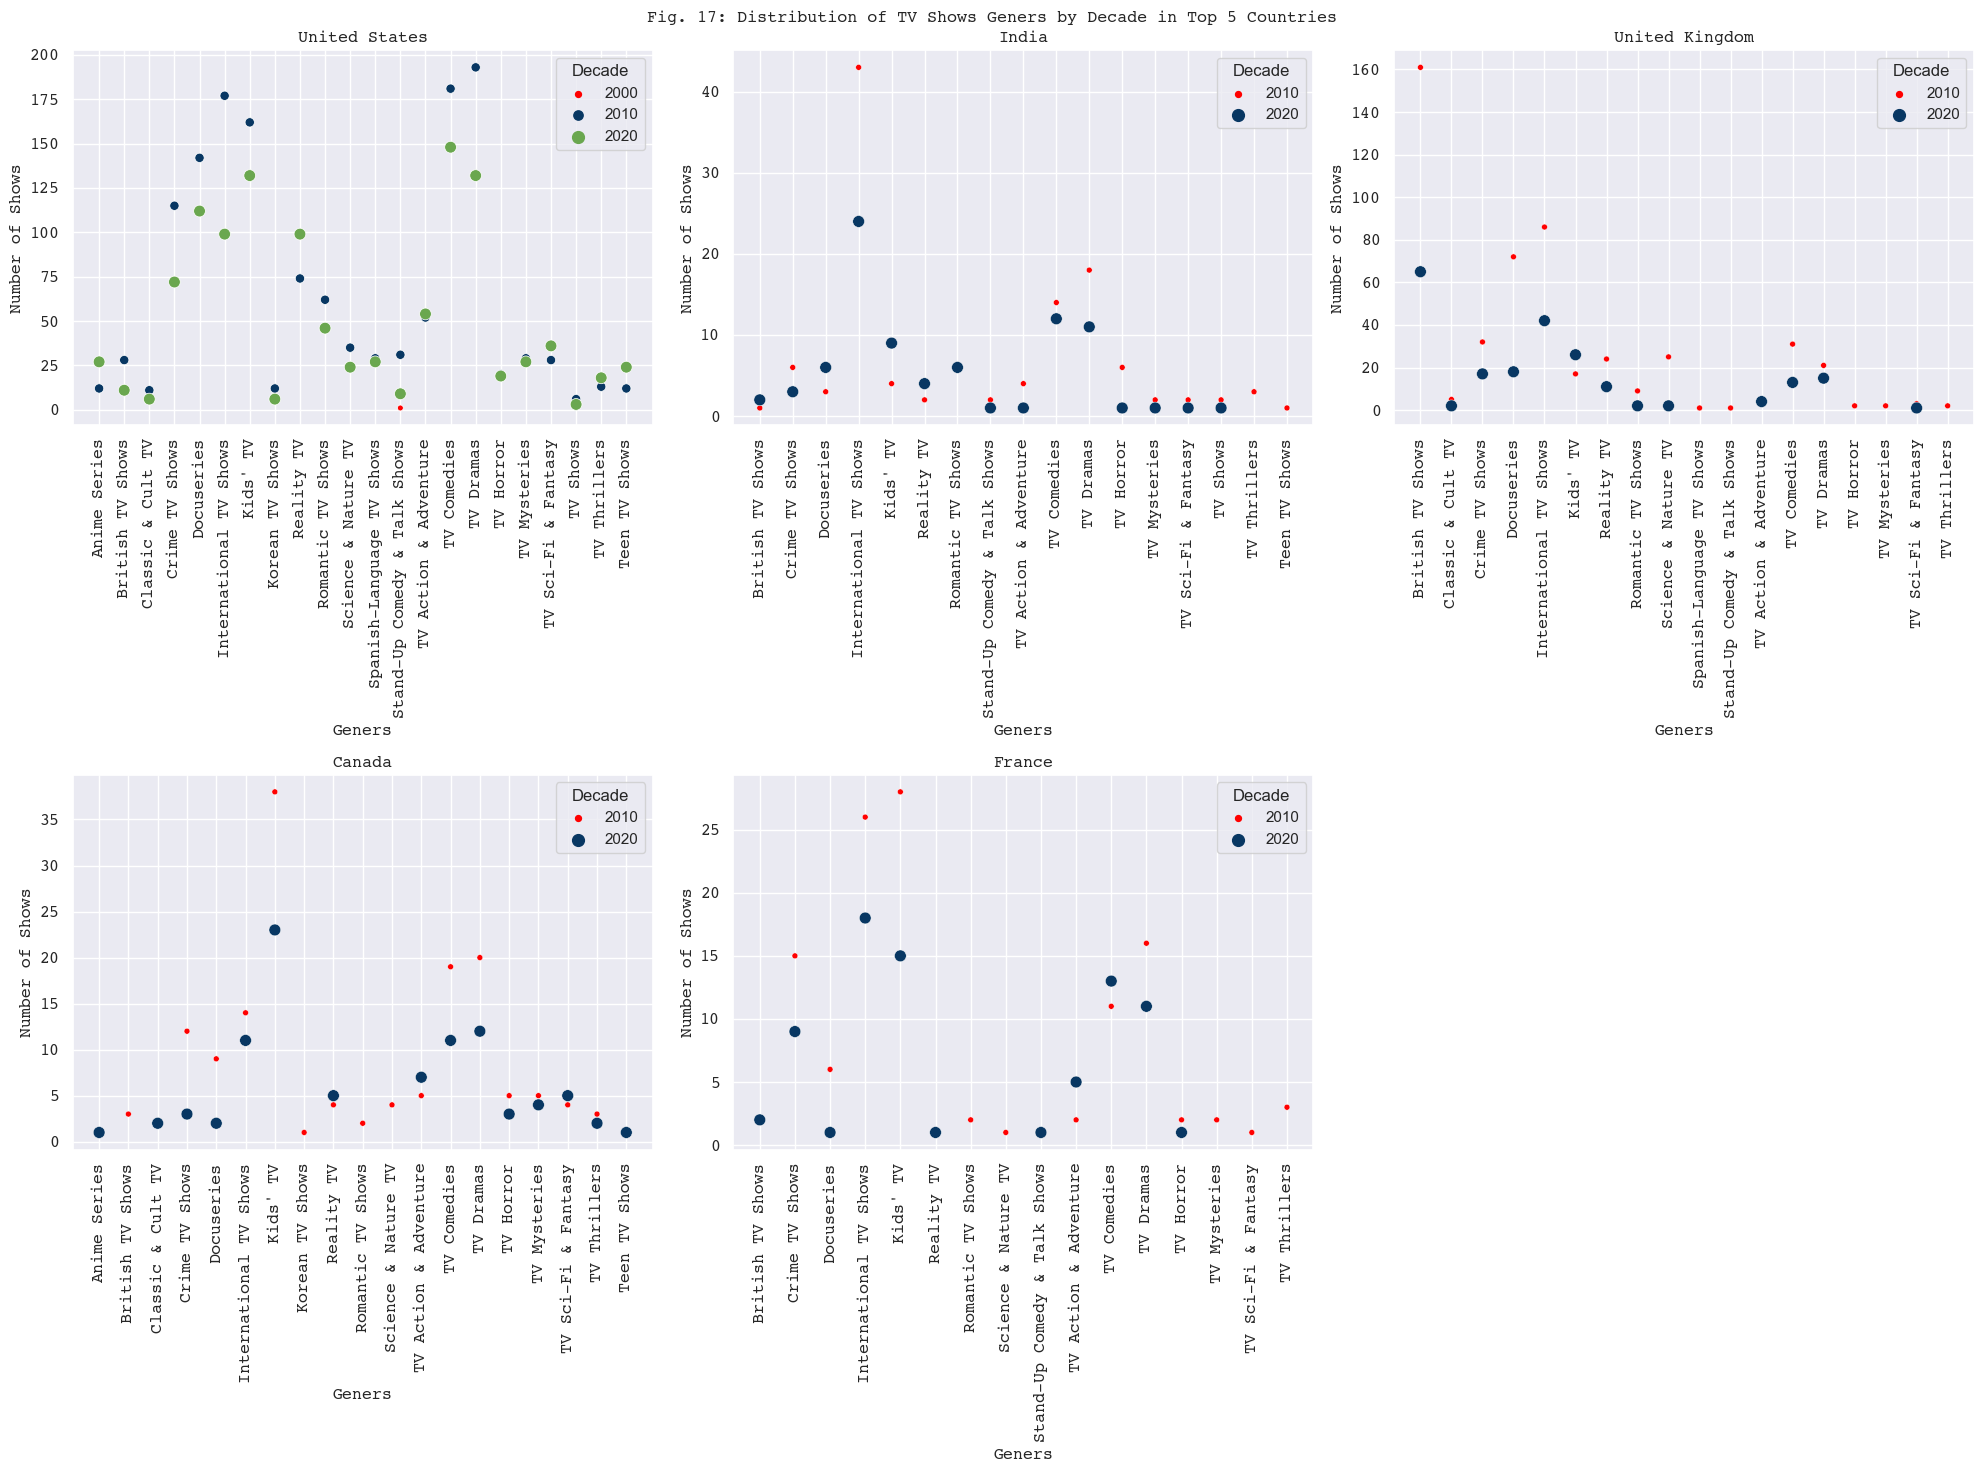

In [364]:
fig=plt.figure(figsize=(20,15)).suptitle("Fig. 17: Distribution of TV Shows Geners by Decade in Top 5 Countries", fontsize = 12, fontname='Courier')

plt.subplot(2,3,1)
plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec", size = "date_added_dec",data=tvshows_cntry_genre_dec.loc[tvshows_cntry_genre_dec["country"] == top_5_countries[0]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Shows", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,2)
plt.title(top_5_countries[1],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec", size = "date_added_dec", data=tvshows_cntry_genre_dec.loc[tvshows_cntry_genre_dec["country"] == top_5_countries[1]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Shows", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,3)
plt.title(top_5_countries[2],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec",size = "date_added_dec", data=tvshows_cntry_genre_dec.loc[tvshows_cntry_genre_dec["country"] == top_5_countries[2]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Shows", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,4)
plt.title(top_5_countries[3],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec",size = "date_added_dec", data=tvshows_cntry_genre_dec.loc[tvshows_cntry_genre_dec["country"] == top_5_countries[3]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Shows", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.subplot(2,3,5)
plt.title(top_5_countries[4],fontsize = 12, fontname='Courier')
sns.set(style = 'darkgrid')
color_palette = ["Red","#083763", "#6AA74F"]
sns.scatterplot(x="listed_in", y="movie_count", hue = "date_added_dec",size = "date_added_dec",data=tvshows_cntry_genre_dec.loc[tvshows_cntry_genre_dec["country"] == top_5_countries[4]], palette=color_palette)
plt.xticks(rotation=90)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Geners", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Shows", fontsize = 12, fontname='Courier')
plt.legend(title='Decade')
plt.grid(True)

plt.tight_layout()
plt.show()

In [365]:
top_5_country_movies = merged_data.loc[(merged_data["country"].isin(top_5_countries)) & (merged_data["type"] == "Movie") ]

In [366]:
top_5_country_movies

show_id   type                             title date_added  \
0           s1  Movie              Dick Johnson Is Dead 2021-09-25   
159         s7  Movie  My Little Pony: A New Generation 2021-09-24   
160         s7  Movie  My Little Pony: A New Generation 2021-09-24   
161         s7  Movie  My Little Pony: A New Generation 2021-09-24   
162         s7  Movie  My Little Pony: A New Generation 2021-09-24   
...        ...    ...                               ...        ...   
201593   s8807  Movie                            Zubaan 2019-03-02   
201594   s8807  Movie                            Zubaan 2019-03-02   
201595   s8807  Movie                            Zubaan 2019-03-02   
201596   s8807  Movie                            Zubaan 2019-03-02   
201597   s8807  Movie                            Zubaan 2019-03-02   

        release_year rating duration  \
0               2020  PG-13   90 min   
159             2021     PG   91 min   
160             2021     PG   91 min   
161             2021     PG   91 min   
162             2021     PG   91 min   
...              ...    ...      ...   
201593          2015  TV-14  111 min   
201594          2015  TV-14  111 min   
201595          2015  TV-14  111 min   
201596          2015  TV-14  111 min   
201597          2015  TV-14  111 min   

                                              description         director  \
0       As her father nears the end of his life, filmm...  Kirsten Johnson   
159     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
160     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
161     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
162     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
...                                                   ...              ...   
201593  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201594  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201595  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201596  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201597  A scrappy but poor boy worms his way into a ty...      Mozez Singh   

                         cast        country                 listed_in  \
0                Quincy Jones  United States             Documentaries   
159           Vanessa Hudgens  United States  Children & Family Movies   
160              Kimiko Glenn  United States  Children & Family Movies   
161             James Marsden  United States  Children & Family Movies   
162              Sofia Carson  United States  Children & Family Movies   
...                       ...            ...                       ...   
201593         Anita Shabdish          India      International Movies   
201594         Anita Shabdish          India          Music & Musicals   
201595  Chittaranjan Tripathy          India                    Dramas   
201596  Chittaranjan Tripathy          India      International Movies   
201597  Chittaranjan Tripathy          India          Music & Musicals   

        date_added_year date_added_qtr  date_added_dec  release_year_dec  
0                  2021            Q-3            2020              2020  
159                2021            Q-3            2020              2020  
160                2021            Q-3            2020              2020  
161                2021            Q-3            2020              2020  
162                2021            Q-3            2020              2020  
...                 ...            ...             ...               ...  
201593             2019            Q-1            2010              2010  
201594             2019            Q-1            2010              2010  
201595             2019            Q-1            2010              2010  
201596             2019            Q-1            2010              2010  
201597             2019           

In [367]:
#top_5_countries[0]

In [368]:
'''
Crime TV shows
Docuseries
International TV Shows
Kids' TV
Reality TV
TV Action & Adventure
TV Comedies
TV Dramas
'''
data_listed_in.loc[data_listed_in["listed_in"] == "International TV Shows"]["show_id"].count()

1345

In [369]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "United States") & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas']))].groupby(["director"])["show_id"].aggregate(
    movie_count = ("nunique")
    ).reset_index().sort_values("movie_count", ascending=False).head()

director  movie_count
1235  Steven Spielberg           10
332   Don Michael Paul           10
833    Martin Scorsese           10
853     Matthew Salleh            8
858                McG            7

In [370]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "United States") & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

cast  movie_count
3805       James Franco           23
8100  Samuel L. Jackson           21
82         Adam Sandler           19
6871       Nicolas Cage           15
6623      Molly Shannon           14

In [371]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "India") & (top_5_country_movies["listed_in"].isin(['Comedies','Dramas','International Movies']))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

director  movie_count
79     Anurag Kashyap           11
145      David Dhawan           11
613       Suhas Kadav            8
657       Umesh Mehra            8
160  Dibakar Banerjee            7

In [372]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "India") & (top_5_country_movies["listed_in"].isin(['Comedies','Dramas','International Movies']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

cast  movie_count
360        Anupam Kher           55
2874    Shah Rukh Khan           35
1934  Naseeruddin Shah           32
136       Akshay Kumar           29
2078           Om Puri           29

In [373]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "United Kingdom") & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Comedies','Dramas','International Movies']))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

director  movie_count
232   Matthew Salleh            4
360       Tom Hooper            4
368   Vince Marcello            3
223  Martin Campbell            3
346    Terry Gilliam            3

In [374]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "United Kingdom") & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Comedies','Dramas','International Movies']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

cast  movie_count
2158           Samuel West           30
1183           John Cleese           10
1250            Judi Dench            9
927   Helena Bonham Carter            8
1645         Michael Palin            8

In [375]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "Canada") & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas', "Thrillers"]))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

director  movie_count
185      Robert Vince            5
105    Justin G. Dyck            4
152  Mike Clattenburg            4
166    Osgood Perkins            3
206  Steven C. Miller            3

In [376]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "Canada") & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas', "Thrillers"]))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

cast  movie_count
813   John Paul Tremblay            7
804       John Dunsworth            7
1404          Robb Wells            7
358           Colm Feore            6
435       Diedrich Bader            5

In [377]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "France") & (top_5_country_movies["listed_in"].isin(['International Movies','Dramas']))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

director  movie_count
236         Thierry Donard            5
253        Youssef Chahine            4
74           Florent Bodin            3
85   Gilles Paquet-Brenner            3
147        Maroun Baghdadi            3

In [378]:
top_5_country_movies.loc[(top_5_country_movies["country"] == "France") & (top_5_country_movies["listed_in"].isin(['International Movies','Dramas']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head()

cast  movie_count
1720  Wille Lindberg           15
744    Jesse Richman            4
967      Léa Seydoux            4
199   Benoît Magimel            4
1053    Matt Annetts            4

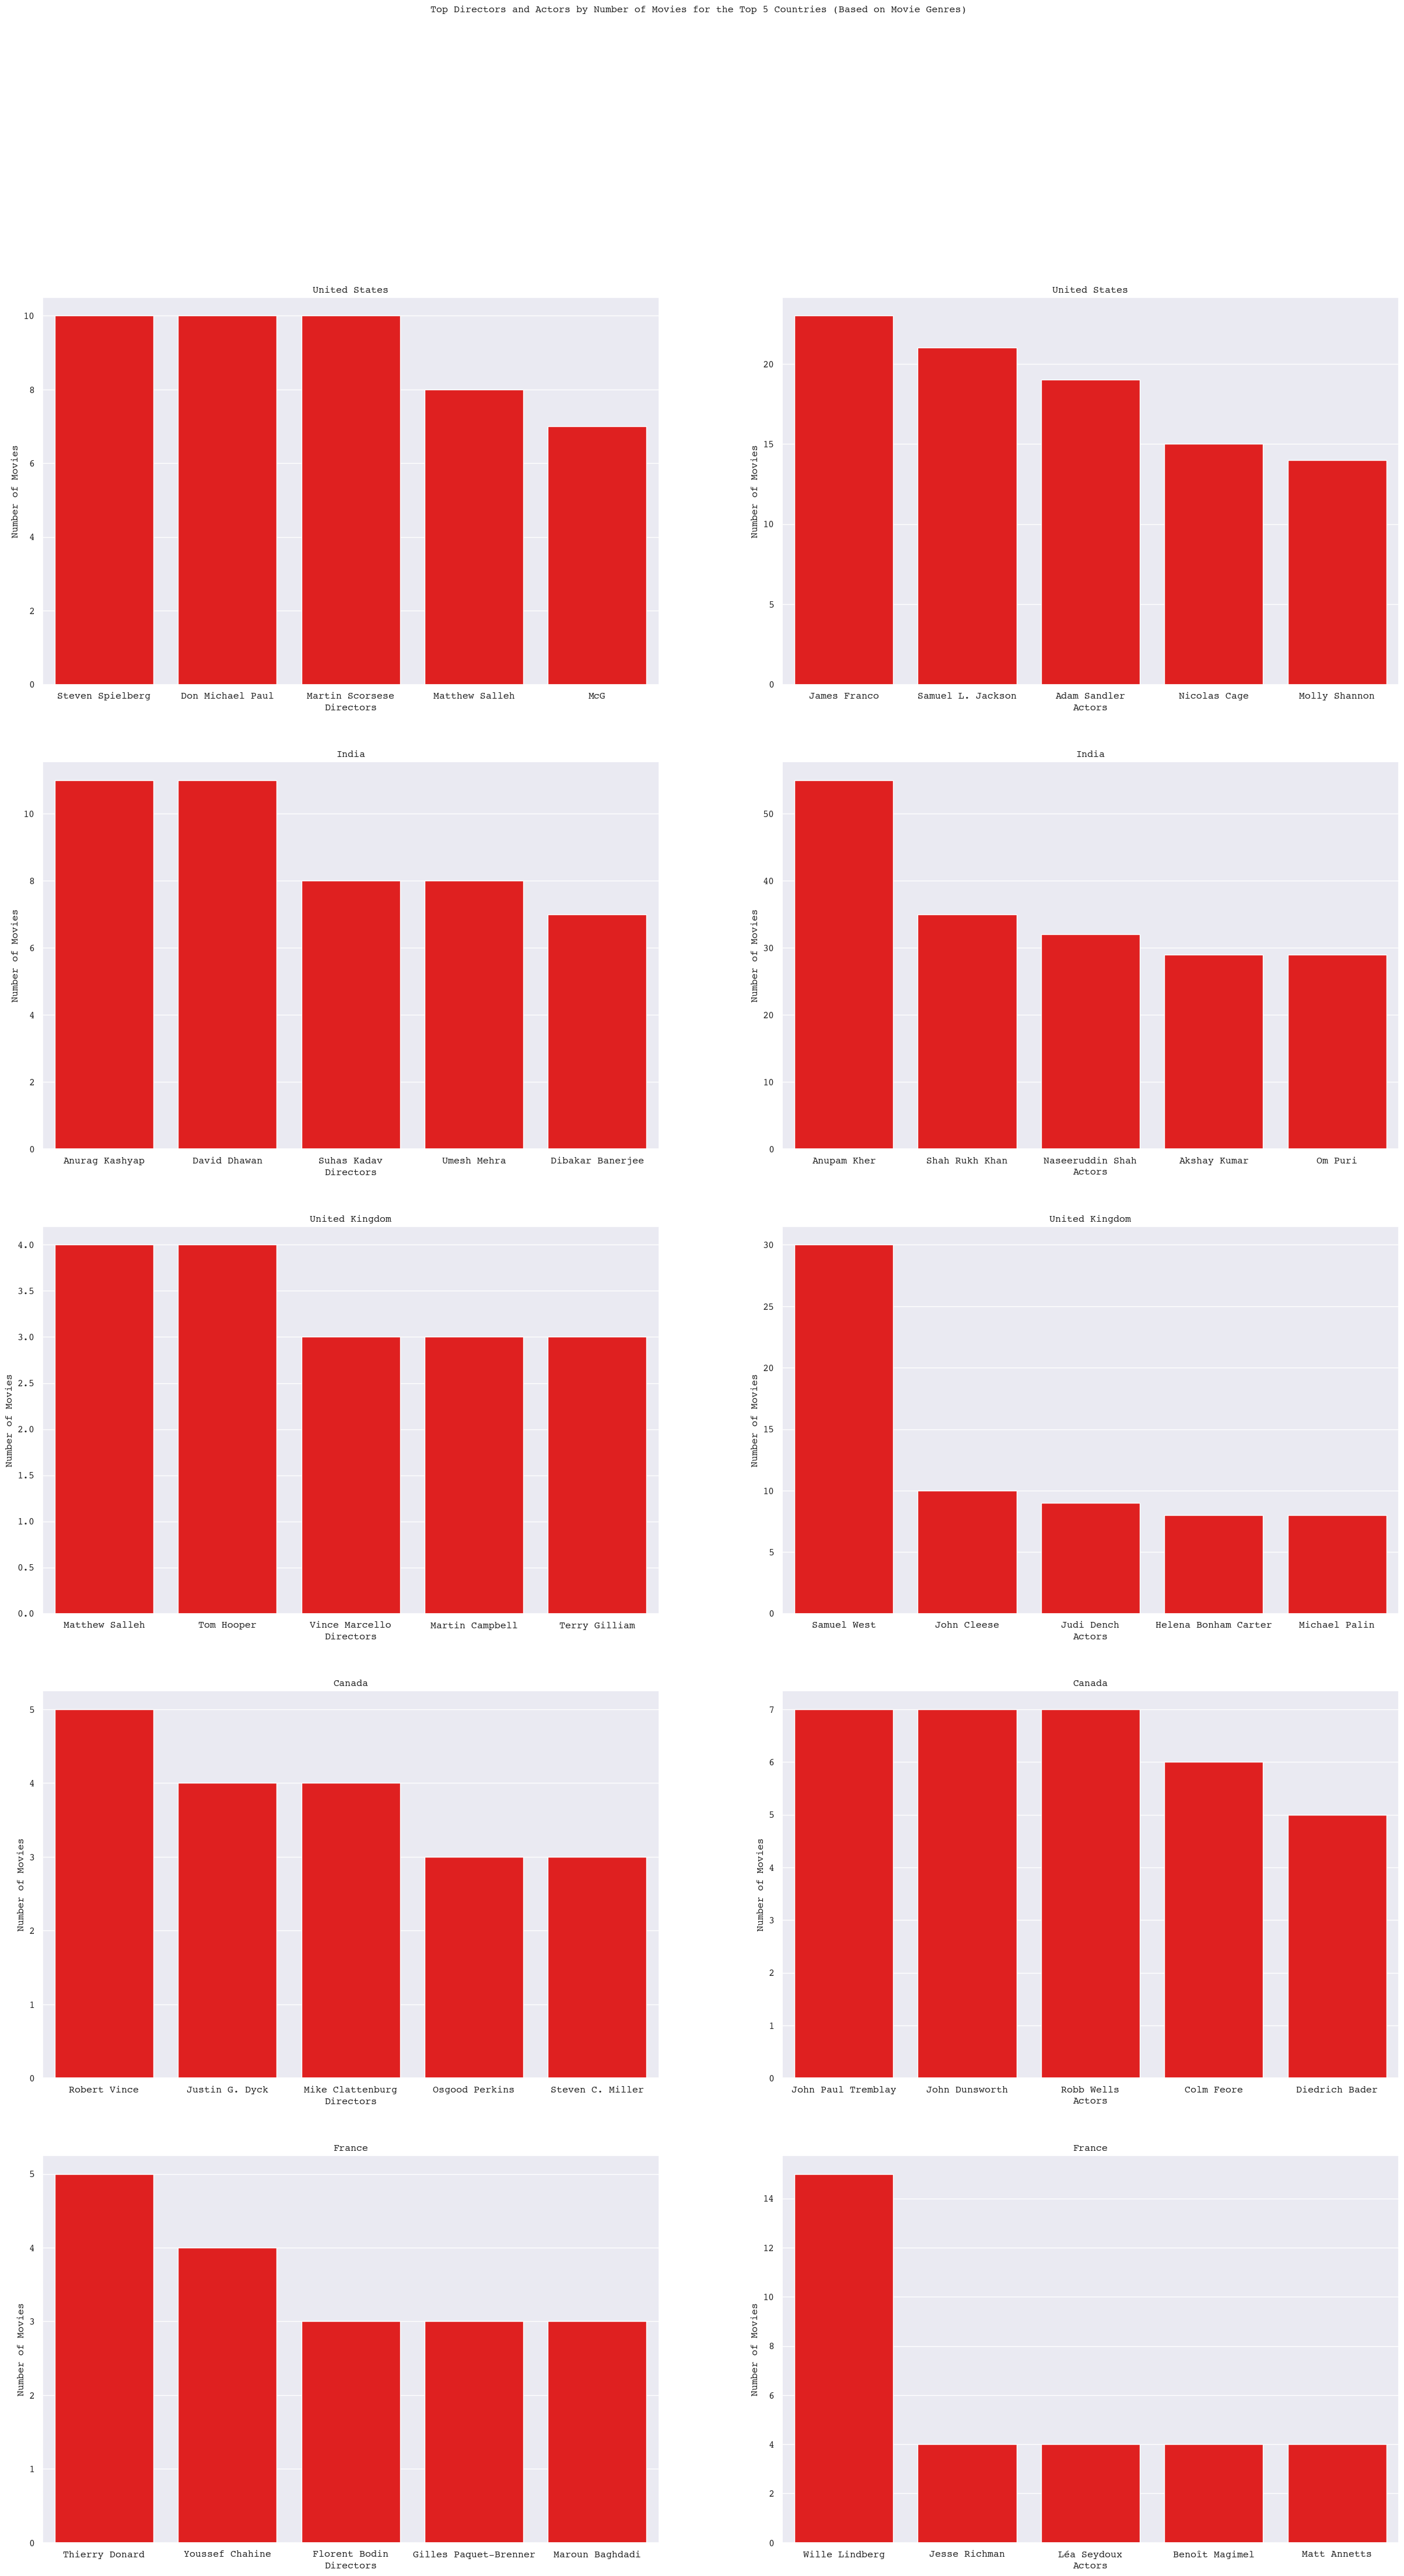

In [379]:
fig=plt.figure(figsize=(30,50)).suptitle("Top Directors and Actors by Number of Movies for the Top 5 Countries (Based on Movie Genres)", fontsize = 12, fontname='Courier')

sns.set(style = 'darkgrid')

plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
plt.subplot(5,2,1)
sns.barplot(x="director", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[0]) & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas']))].groupby(["director"])["show_id"].aggregate(
    movie_count = ("nunique")
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,2)
sns.barplot(x="cast", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[0]) & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,3)
sns.barplot(x="director", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[1]) & (top_5_country_movies["listed_in"].isin(['Comedies','Dramas','International Movies']))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[1],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,4)
sns.barplot(x="cast", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[1]) & (top_5_country_movies["listed_in"].isin(['Comedies','Dramas','International Movies']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[1],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,5)
sns.barplot(x="director", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[2]) & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Comedies','Dramas','International Movies']))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[2],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,6)
sns.barplot(x="cast", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[2]) & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Comedies','Dramas','International Movies']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[2],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,7)
sns.barplot(x="director", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[3]) & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas', "Thrillers"]))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[3],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,8)
sns.barplot(x="cast", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[3]) & (top_5_country_movies["listed_in"].isin(['Action & Adventure','Children & family movies','Comedies','Dramas', "Thrillers"]))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[3],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.subplot(5,2,9)
sns.barplot(x="director", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[4]) & (top_5_country_movies["listed_in"].isin(['International Movies','Dramas']))].groupby(["director"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[4],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')


plt.subplot(5,2,10)
sns.barplot(x="cast", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[4]) & (top_5_country_movies["listed_in"].isin(['International Movies','Dramas']))].groupby(["cast"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[4],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.show()


In [380]:
top_5_country_tvshows = merged_data.loc[(merged_data["country"].isin(top_5_countries)) & (merged_data["type"] == "TV Show") ]

In [381]:
top_5_country_tvshows

show_id     type        title date_added  release_year rating  \
58          s3  TV Show    Ganglands 2021-09-24          2021  TV-MA   
59          s3  TV Show    Ganglands 2021-09-24          2021  TV-MA   
60          s3  TV Show    Ganglands 2021-09-24          2021  TV-MA   
61          s3  TV Show    Ganglands 2021-09-24          2021  TV-MA   
62          s3  TV Show    Ganglands 2021-09-24          2021  TV-MA   
...        ...      ...          ...        ...           ...    ...   
201396   s8798  TV Show    Zak Storm 2018-09-13          2016  TV-Y7   
201397   s8798  TV Show    Zak Storm 2018-09-13          2016  TV-Y7   
201539   s8804  TV Show  Zombie Dumb 2019-07-01          2018  TV-Y7   
201540   s8804  TV Show  Zombie Dumb 2019-07-01          2018  TV-Y7   
201541   s8804  TV Show  Zombie Dumb 2019-07-01          2018  TV-Y7   

         duration                                        description  \
58       1 Season  To protect his family from a powerful drug lor...   
59       1 Season  To protect his family from a powerful drug lor...   
60       1 Season  To protect his family from a powerful drug lor...   
61       1 Season  To protect his family from a powerful drug lor...   
62       1 Season  To protect his family from a powerful drug lor...   
...           ...                                                ...   
201396  3 Seasons  Teen surfer Zak Storm is mysteriously transpor...   
201397  3 Seasons  Teen surfer Zak Storm is mysteriously transpor...   
201539  2 Seasons  While living alone in a spooky town, a young g...   
201540  2 Seasons  While living alone in a spooky town, a young g...   
201541  2 Seasons  While living alone in a spooky town, a young g...   

               director           cast        country               listed_in  \
58      Julien Leclercq  Sami Bouajila         France          Crime TV Shows   
59      Julien Leclercq  Sami Bouajila         France  International TV Shows   
60      Julien Leclercq  Sami Bouajila         France   TV Action & Adventure   
61      Julien Leclercq   Tracy Gotoas         France          Crime TV Shows   
62      Julien Leclercq   Tracy Gotoas         France  International TV Shows   
...                 ...            ...            ...                     ...   
201396    Thomas Astruc    Kyle Hebert  United States                Kids' TV   
201397    Thomas Astruc    Kyle Hebert         France                Kids' TV   
201539   Matthew Salleh   Grey Griffin  United States                Kids' TV   
201540   Matthew Salleh   Grey Griffin  United States         Korean TV Shows   
201541   Matthew Salleh   Grey Griffin  United States             TV Comedies   

        date_added_year date_added_qtr  date_added_dec  release_year_dec  
58                 2021            Q-3            2020              2020  
59                 2021            Q-3            2020              2020  
60                 2021            Q-3            2020              2020  
61                 2021            Q-3            2020              2020  
62                 2021            Q-3            2020              2020  
...                 ...            ...             ...               ...  
201396             2018            Q-3            2010              2010  
201397             2018            Q-3            2010              2010  
201539             2019            Q-3            2010              2010  
201540             2019            Q-3            2010              2010  
201541             2019            Q-3            2010              2010  

[28116 rows x 16 columns]

In [382]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United States") & (top_5_country_tvshows["listed_in"].isin(['Crime TV shows','Docuseries','International TV Shows','Kids\' TV','Reality TV','TV Action & Adventure','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

director  tvshow_count
336          Matthew Salleh           200
477           Thomas Astruc            45
6    Adrián García Bogliano            38
276               Ken Burns            32
362              Noam Murro            32

In [383]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United States") & (top_5_country_tvshows["listed_in"].isin(['Crime TV shows','Docuseries','International TV Shows','Kids\' TV','Reality TV','TV Action & Adventure','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

cast  tvshow_count
1467  David Attenborough           138
2421        Hunter March            32
6362        Vincent Tong            26
2054       Frederick Lee            23
3147   Juan Pablo Urrego            19

In [384]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "India") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

director  tvshow_count
0   Abhishek Chaubey             7
6     Anurag Kashyap             3
19      Kanwal Sethi             3
28              Onir             3
14     Dheeraj Berry             2

In [385]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "India") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

cast  tvshow_count
23              Amala Paul            14
184          Nishka Raheja             4
75   Dibyendu Bhattacharya             2
114         Jitendra Joshi             2
82             Gagan Arora             2

In [386]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United Kingdom") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

director  tvshow_count
58           Noam Murro            49
53       Matthew Salleh            19
64       Richard Phelan             6
3   Alastair Fothergill             5
61   Philippa Lowthorpe             4

In [387]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United Kingdom") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

cast  tvshow_count
216  David Attenborough            23
514        Kate Harbour             4
935    Teresa Gallagher             4
350      Harriet Walter             4
533       Keith Wickham             3

In [388]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "Canada") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

director  tvshow_count
28     Ishi Rudell            10
64  Stefan Brogren             6
45     Kyran Kelly             6
6    Andrew Niccol             5
47   Mark Thornton             4

In [389]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "Canada") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

cast  tvshow_count
65        Ashleigh Ball             7
781        Vincent Tong             6
369  John Paul Tremblay             5
44        Andrea Libman             5
93       Brian Drummond             5

In [390]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "France") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

director  tvshow_count
50   Thomas Astruc            13
40  Matthew Salleh            12
2        Alan Poul             5
20     Ishi Rudell             3
38     Mark Risley             2

In [391]:
top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "France") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head()

cast  tvshow_count
276    Jason Narvy             7
485  Peter Oldring             5
7       Adil Dehbi             3
618   Vincent Tong             3
506      Reba Buhr             3

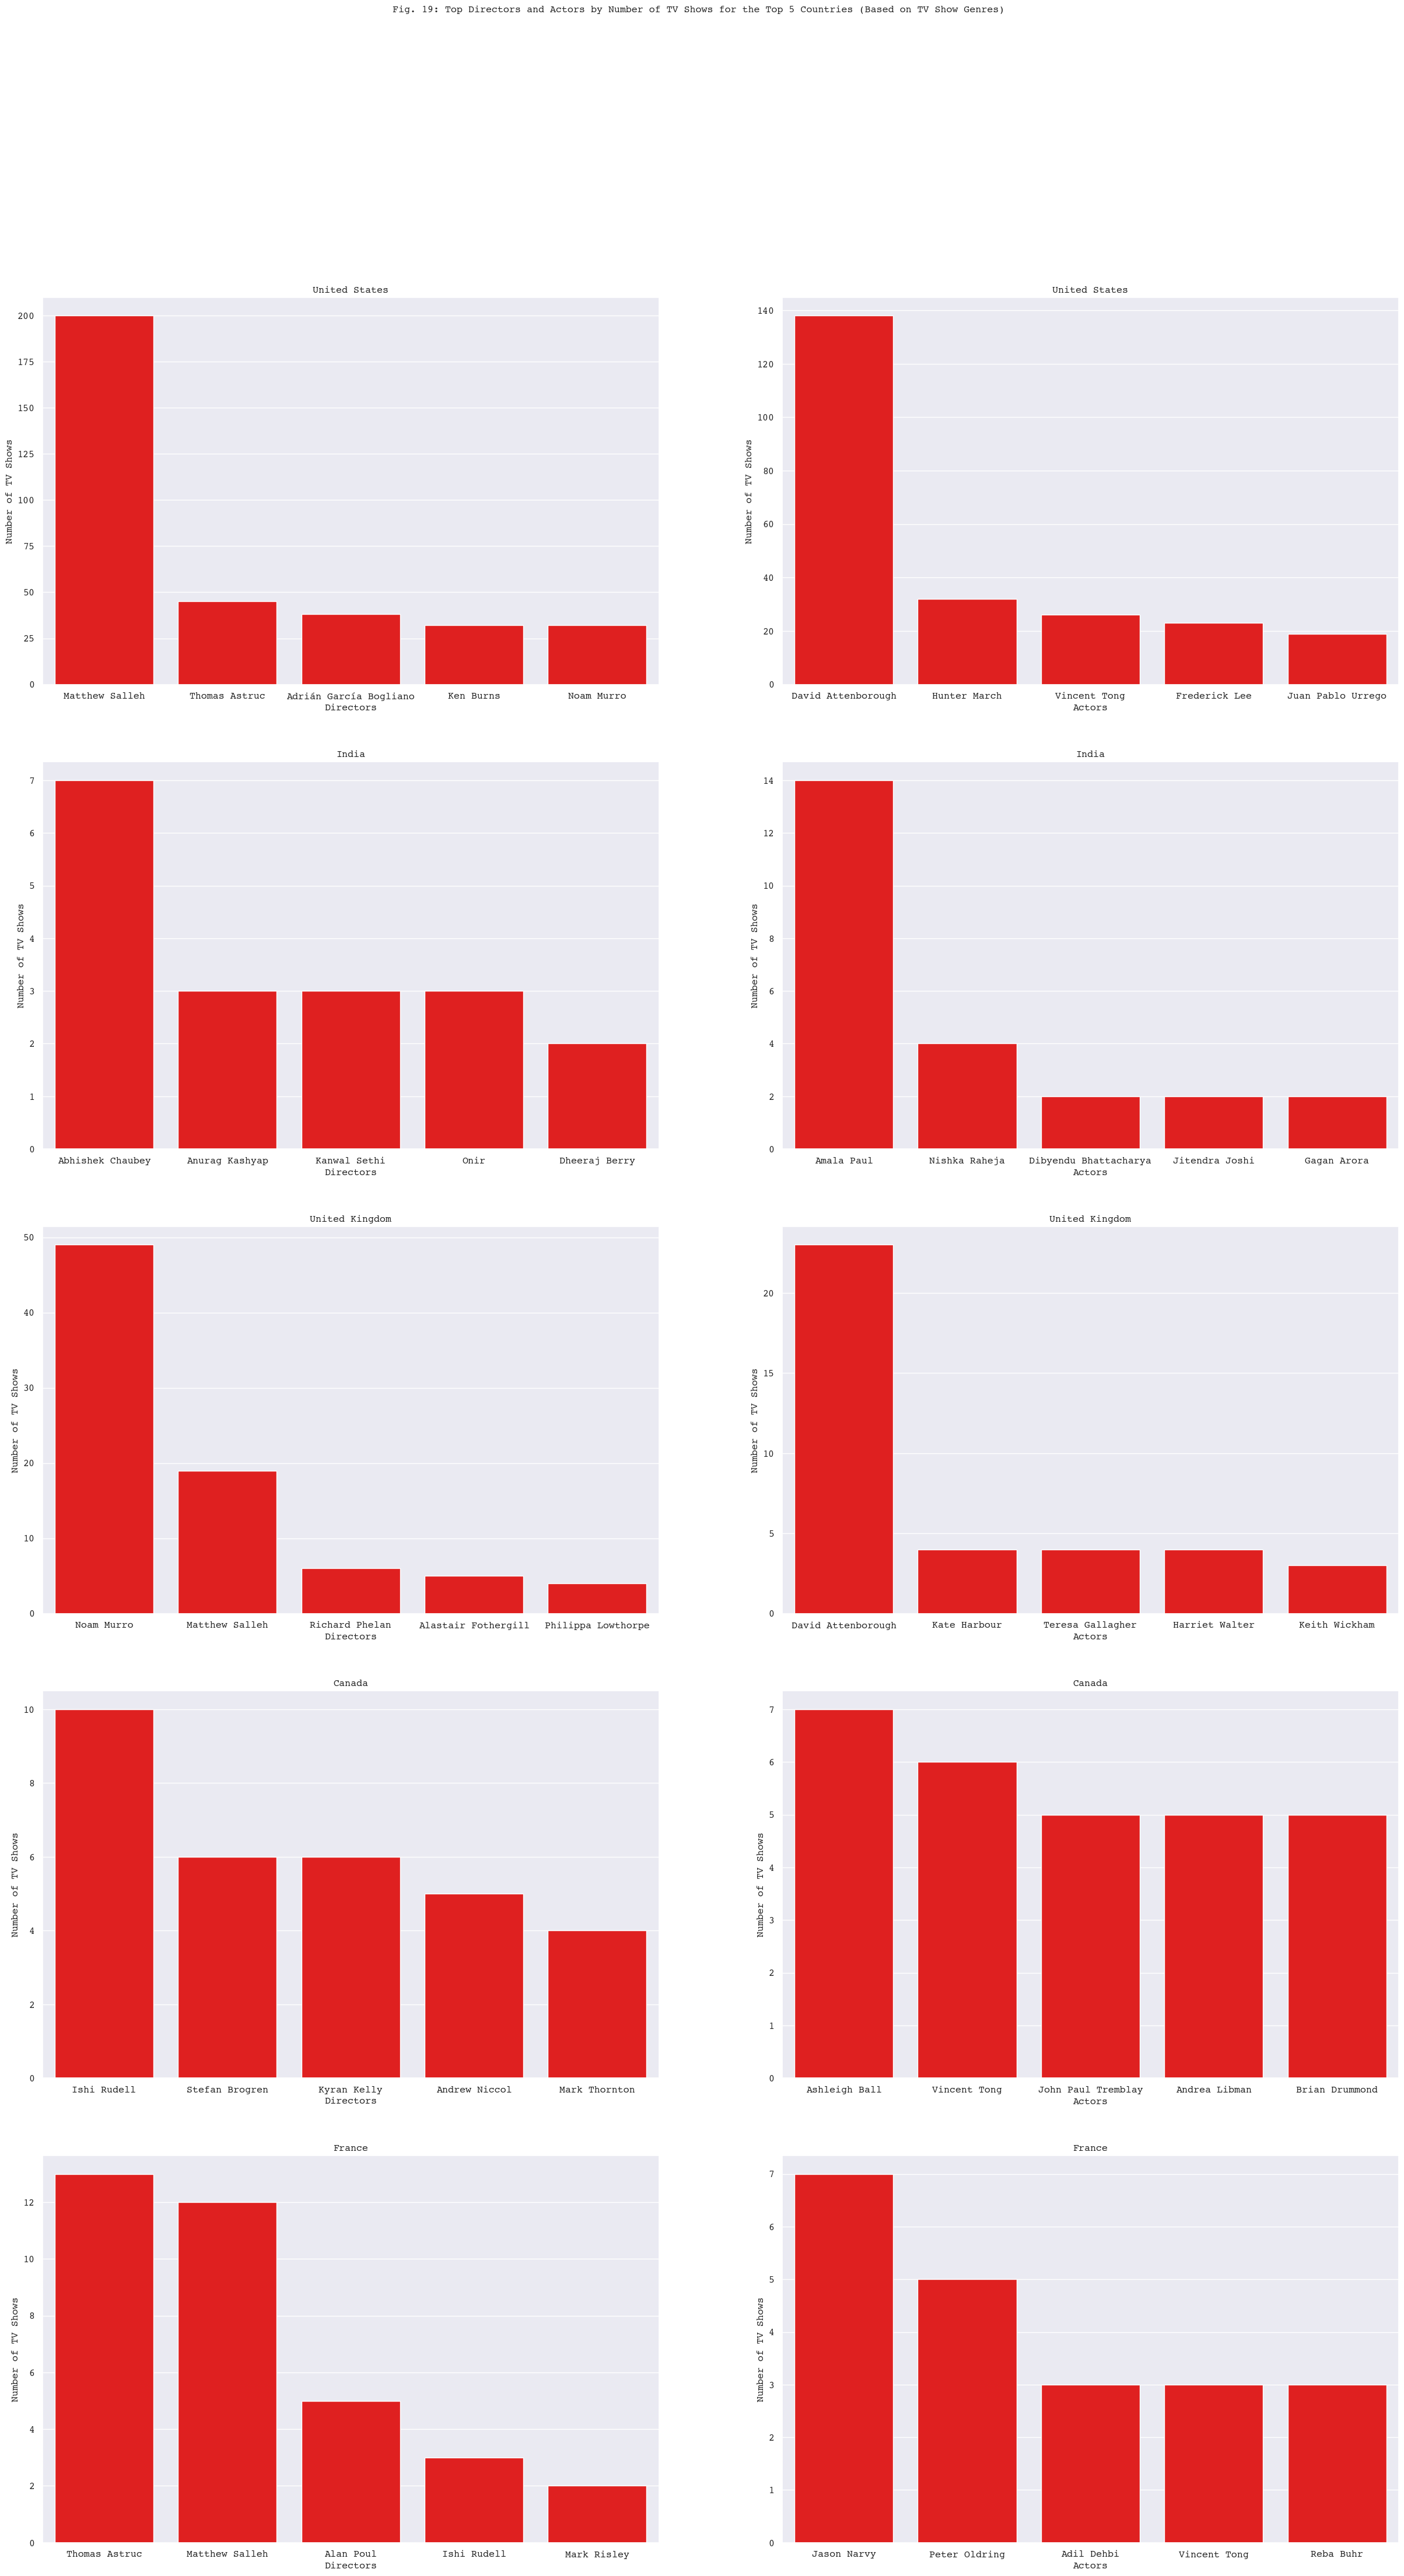

In [392]:
fig=plt.figure(figsize=(30,50)).suptitle("Fig. 19: Top Directors and Actors by Number of TV Shows for the Top 5 Countries (Based on TV Show Genres)", fontsize = 12, fontname='Courier')

sns.set(style = 'darkgrid')

plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
plt.subplot(5,2,1)
sns.barplot(x="director", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United States") & (top_5_country_tvshows["listed_in"].isin(['Crime TV shows','Docuseries','International TV Shows','Kids\' TV','Reality TV','TV Action & Adventure','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,2)
sns.barplot(x="cast", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United States") & (top_5_country_tvshows["listed_in"].isin(['Crime TV shows','Docuseries','International TV Shows','Kids\' TV','Reality TV','TV Action & Adventure','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[0],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,3)
sns.barplot(x="director", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "India") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[1],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,4)
sns.barplot(x="cast", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "India") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[1],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,5)
sns.barplot(x="director", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United Kingdom") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[2],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,6)
sns.barplot(x="cast", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "United Kingdom") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[2],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,7)
sns.barplot(x="director", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "Canada") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[3],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,8)
sns.barplot(x="cast", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "Canada") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[3],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.subplot(5,2,9)
sns.barplot(x="director", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "France") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["director"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[4],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Directors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')


plt.subplot(5,2,10)
sns.barplot(x="cast", y="tvshow_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == "France") & (top_5_country_tvshows["listed_in"].isin(['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']))].groupby(["cast"])["show_id"].aggregate(
    tvshow_count = "nunique"
    ).reset_index().sort_values("tvshow_count", ascending=False).head(), color = "Red")
plt.title(top_5_countries[4],fontsize = 12, fontname='Courier')
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Actors", fontsize = 12, fontname='Courier')
plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.show()


In [393]:
top_5_country_movie_geners = [
    ['Action & Adventure','Children & family movies','Comedies','Dramas'],
    ['Comedies','Dramas','International Movies'],
    ['Action & Adventure','Comedies','Dramas','International Movies'],
    ['Action & Adventure','Children & family movies','Comedies','Dramas', "Thrillers"],
    ['International Movies','Dramas']
]

In [394]:
top_5_country_tvshow_geners = [
    ['Crime TV shows','Docuseries','International TV Shows','Kids\' TV','Reality TV','TV Action & Adventure','TV Comedies','TV Dramas'],
    ['International TV Shows','TV Comedies','TV Dramas'],
    ['International TV Shows','Kids\' TV'],
    ['International TV Shows','Kids\' TV','TV Comedies','TV Dramas'],
    ['International TV Shows','Kids\' TV','TV Comedies','TV Dramas']
]

In [395]:
top_5_countries

['United States', 'India', 'United Kingdom', 'Canada', 'France']

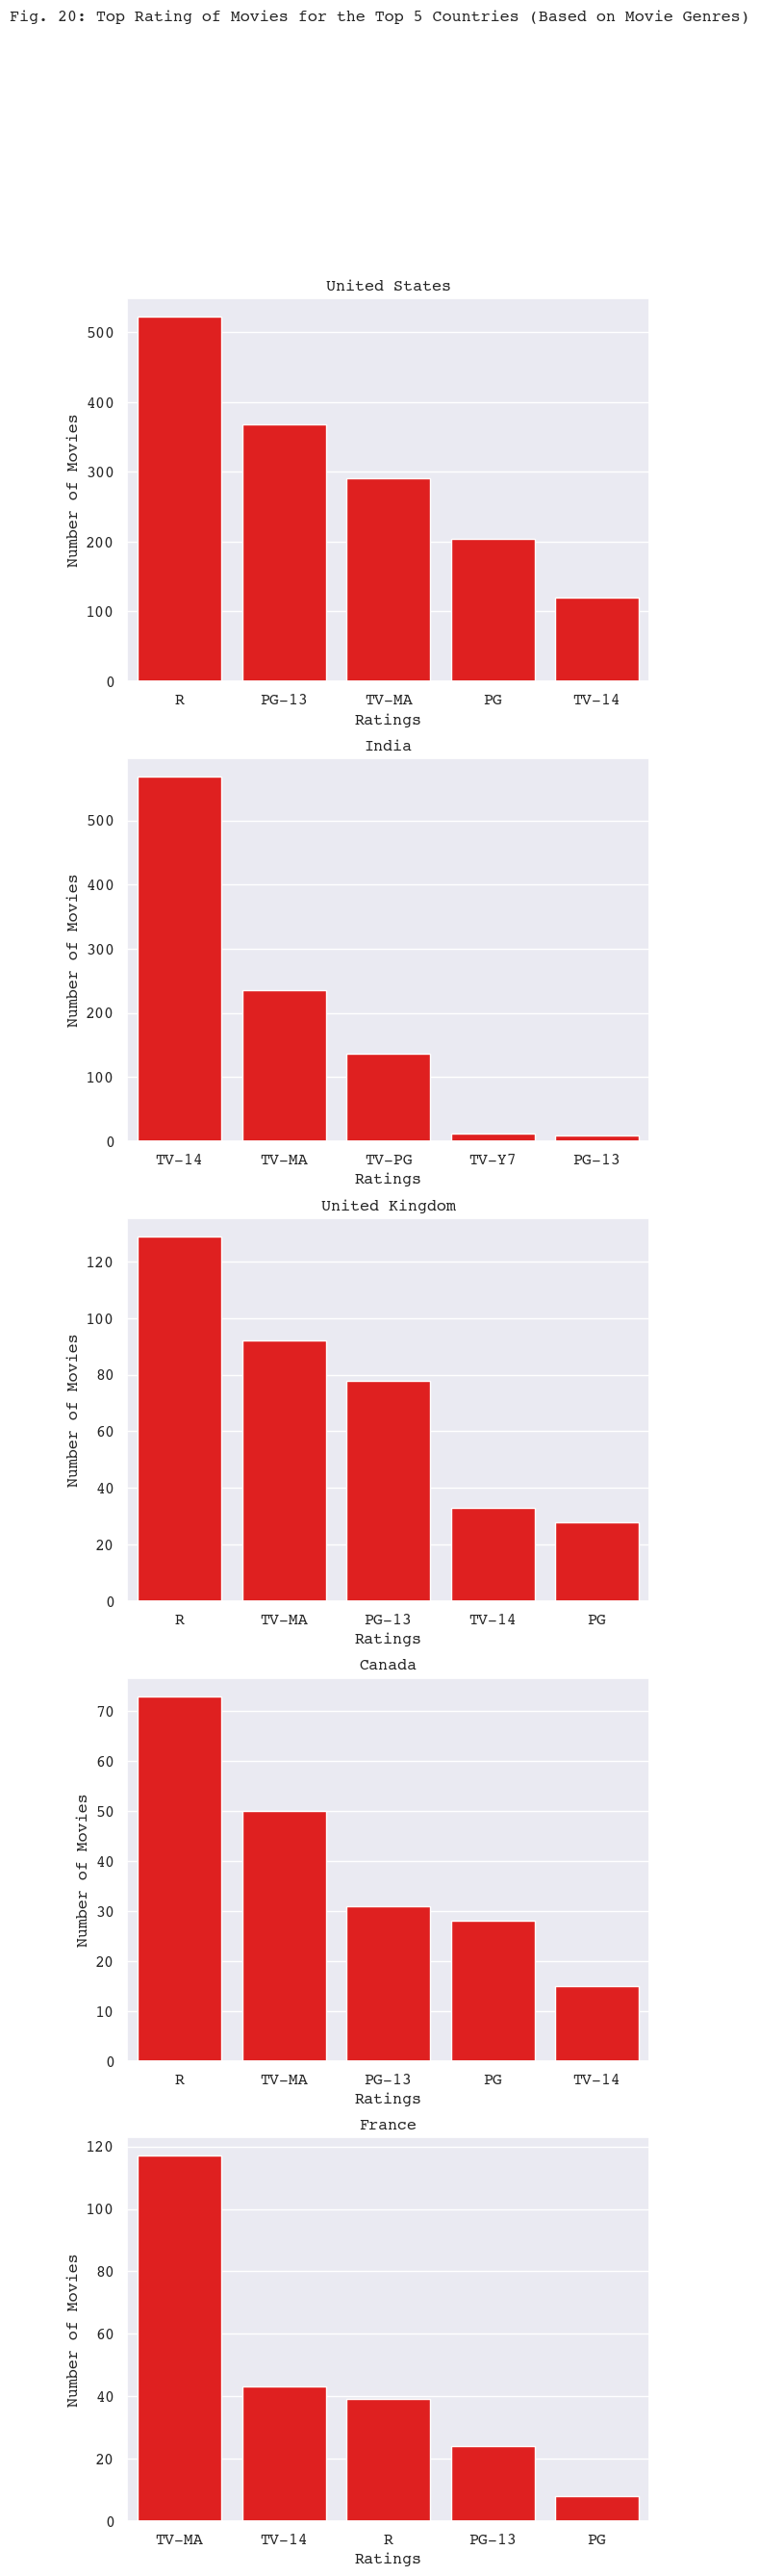

In [396]:
fig=plt.figure(figsize=(7,30)).suptitle("Fig. 20: Top Rating of Movies for the Top 5 Countries (Based on Movie Genres)", fontsize = 12, fontname='Courier')

sns.set(style = 'darkgrid')

for i in range(len(top_5_countries)):
    plt.subplot(5,1,i+1)
    sns.barplot(x="rating", y="movie_count", data=top_5_country_movies.loc[(top_5_country_movies["country"] == top_5_countries[i]) & (top_5_country_movies["listed_in"].isin(top_5_country_movie_geners[i]))].groupby(["rating"])["show_id"].aggregate(
        movie_count = ("nunique")
        ).reset_index().sort_values("movie_count", ascending=False).head(), color = "Red")
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Ratings", fontsize = 12, fontname='Courier')
    plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

plt.show()

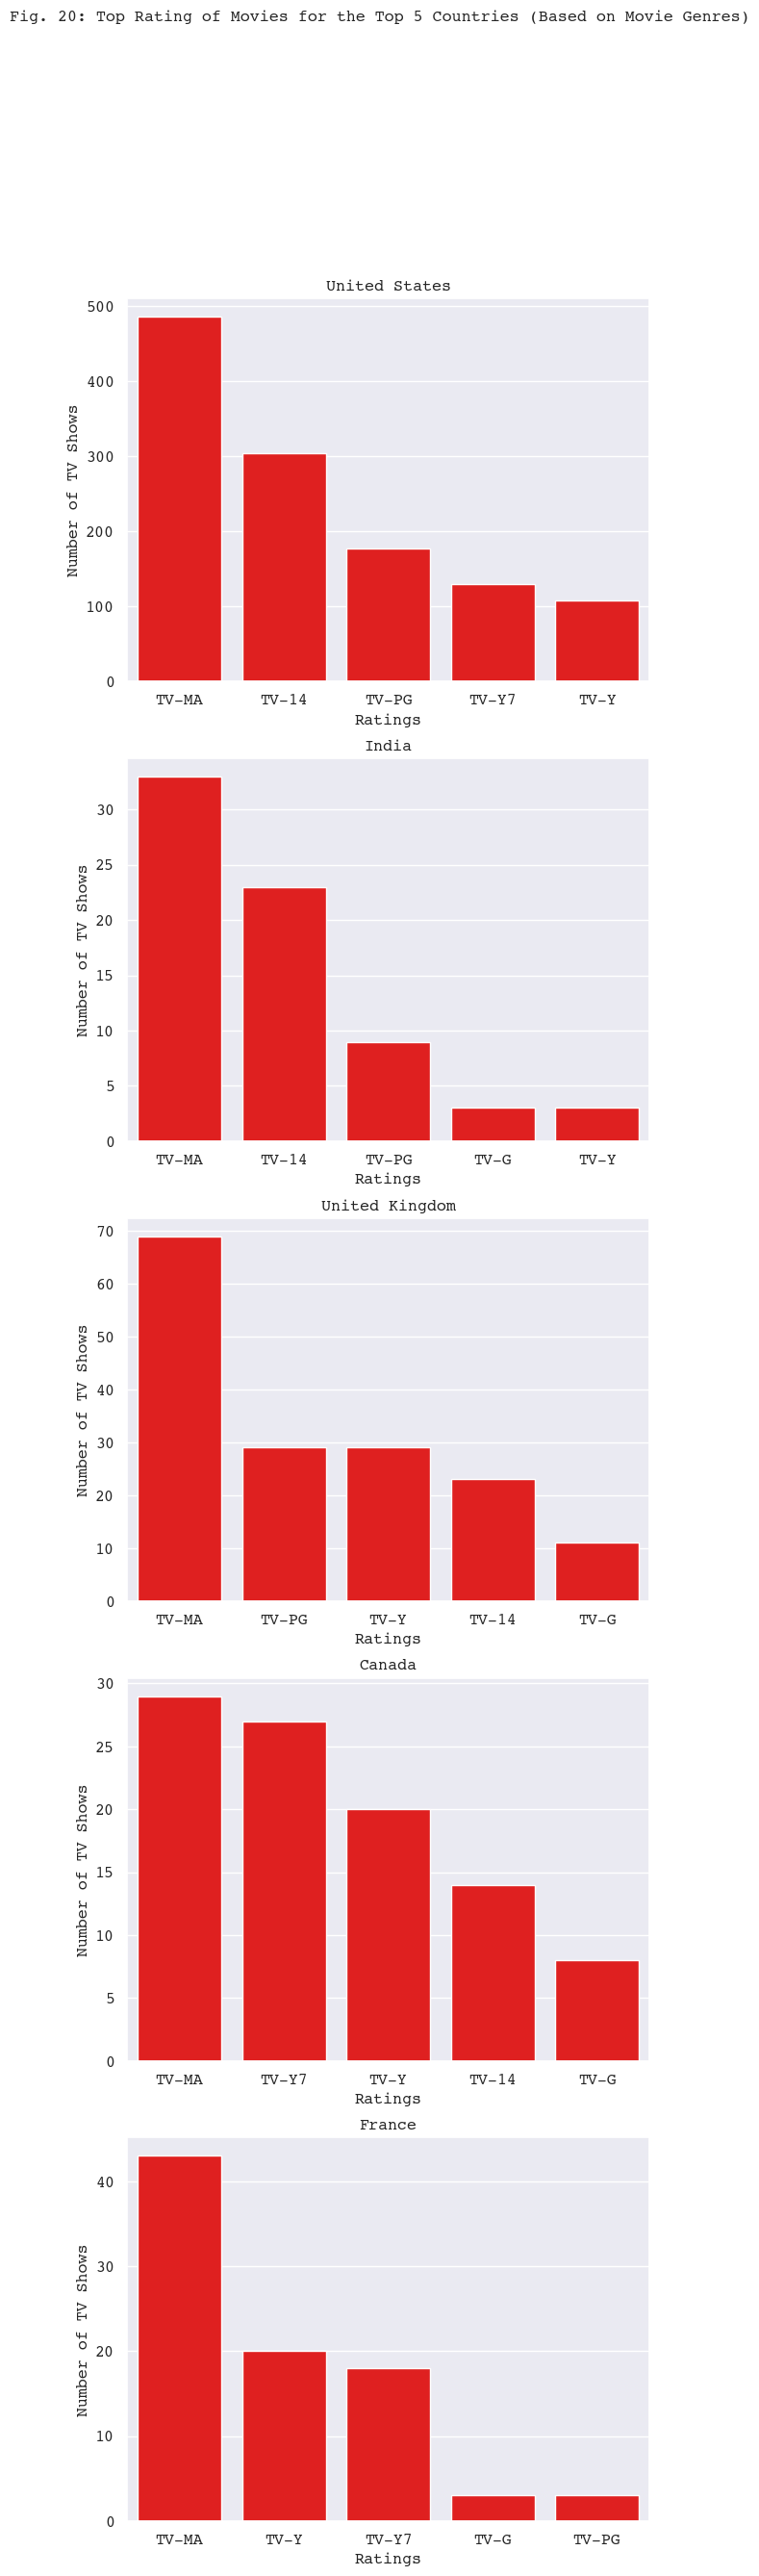

In [397]:
fig=plt.figure(figsize=(7,30)).suptitle("Fig. 20: Top Rating of Movies for the Top 5 Countries (Based on Movie Genres)", fontsize = 12, fontname='Courier')

sns.set(style = 'darkgrid')

for i in range(len(top_5_countries)):
    plt.subplot(5,1,i+1)
    sns.barplot(x="rating", y="show_count", data=top_5_country_tvshows.loc[(top_5_country_tvshows["country"] == top_5_countries[i]) & (top_5_country_tvshows["listed_in"].isin(top_5_country_tvshow_geners[i]))].groupby(["rating"])["show_id"].aggregate(
        show_count = ("nunique")
        ).reset_index().sort_values("show_count", ascending=False).head(), color = "Red")
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Ratings", fontsize = 12, fontname='Courier')
    plt.ylabel("Number of TV Shows", fontsize = 12, fontname='Courier')

plt.show()

In [398]:
top_5_country_movies_qtrly = top_5_country_movies[["country","date_added_qtr","show_id"]].groupby(["country","date_added_qtr"])["show_id"].aggregate(
    movie_count = "nunique"
    ).reset_index()

top_5_country_tvshows_qtrly = top_5_country_tvshows[["country","date_added_qtr","show_id"]].groupby(["country","date_added_qtr"])["show_id"].aggregate(
    show_count = "nunique"
    ).reset_index()

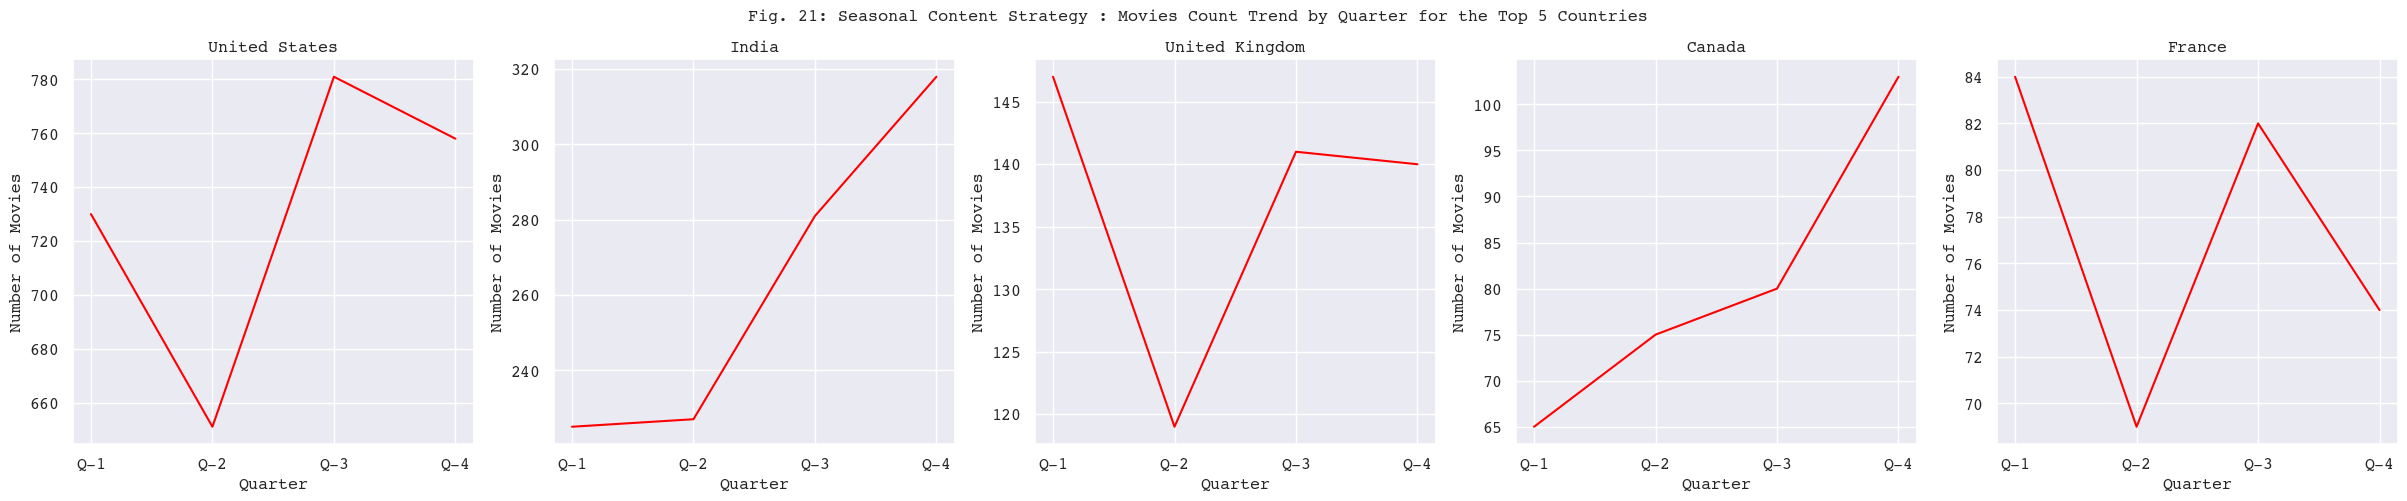

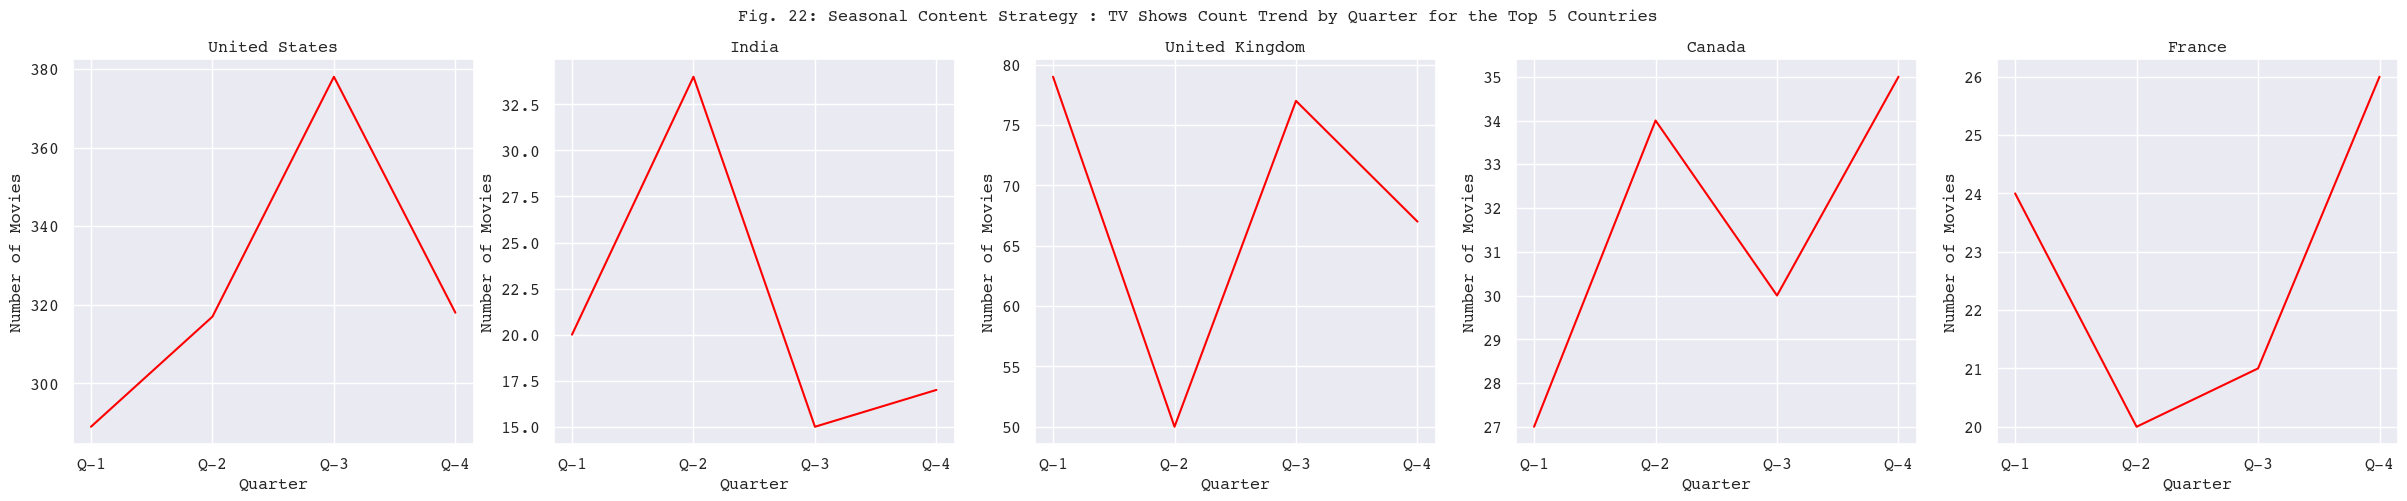

In [399]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 21: Seasonal Content Strategy : Movies Count Trend by Quarter for the Top 5 Countries", fontsize = 12, fontname='Courier')
for i in range(len(top_5_countries)):
    plt.subplot(1,5,i+1)
    sns.lineplot(x="date_added_qtr", y="movie_count", data=top_5_country_movies_qtrly.loc[top_5_country_movies_qtrly["country"] == top_5_countries[i]], color="red")
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Quarter", fontsize = 12, fontname='Courier')
    plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

fig=plt.figure(figsize=(30,5)).suptitle("Fig. 22: Seasonal Content Strategy : TV Shows Count Trend by Quarter for the Top 5 Countries", fontsize = 12, fontname='Courier')
for i in range(len(top_5_countries)):
    plt.subplot(1,5,i+1)
    sns.lineplot(x="date_added_qtr", y="show_count", data=top_5_country_tvshows_qtrly.loc[top_5_country_tvshows_qtrly["country"] == top_5_countries[i]], color="red")
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Quarter", fontsize = 12, fontname='Courier')
    plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')

In [400]:
top_5_country_movies_qtrly

country date_added_qtr  movie_count
0           Canada            Q-1           65
1           Canada            Q-2           75
2           Canada            Q-3           80
3           Canada            Q-4          103
4           France            Q-1           84
5           France            Q-2           69
6           France            Q-3           82
7           France            Q-4           74
8            India            Q-1          225
9            India            Q-2          227
10           India            Q-3          281
11           India            Q-4          318
12  United Kingdom            Q-1          147
13  United Kingdom            Q-2          119
14  United Kingdom            Q-3          141
15  United Kingdom            Q-4          140
16   United States            Q-1          730
17   United States            Q-2          651
18   United States            Q-3          781
19   United States            Q-4          758

In [401]:
top_5_country_tvshows_qtrly

country date_added_qtr  show_count
0           Canada            Q-1          27
1           Canada            Q-2          34
2           Canada            Q-3          30
3           Canada            Q-4          35
4           France            Q-1          24
5           France            Q-2          20
6           France            Q-3          21
7           France            Q-4          26
8            India            Q-1          20
9            India            Q-2          34
10           India            Q-3          15
11           India            Q-4          17
12  United Kingdom            Q-1          79
13  United Kingdom            Q-2          50
14  United Kingdom            Q-3          77
15  United Kingdom            Q-4          67
16   United States            Q-1         289
17   United States            Q-2         317
18   United States            Q-3         378
19   United States            Q-4         318

In [402]:
top_5_country_content = pd.concat([top_5_country_tvshows,top_5_country_movies], ignore_index=True)

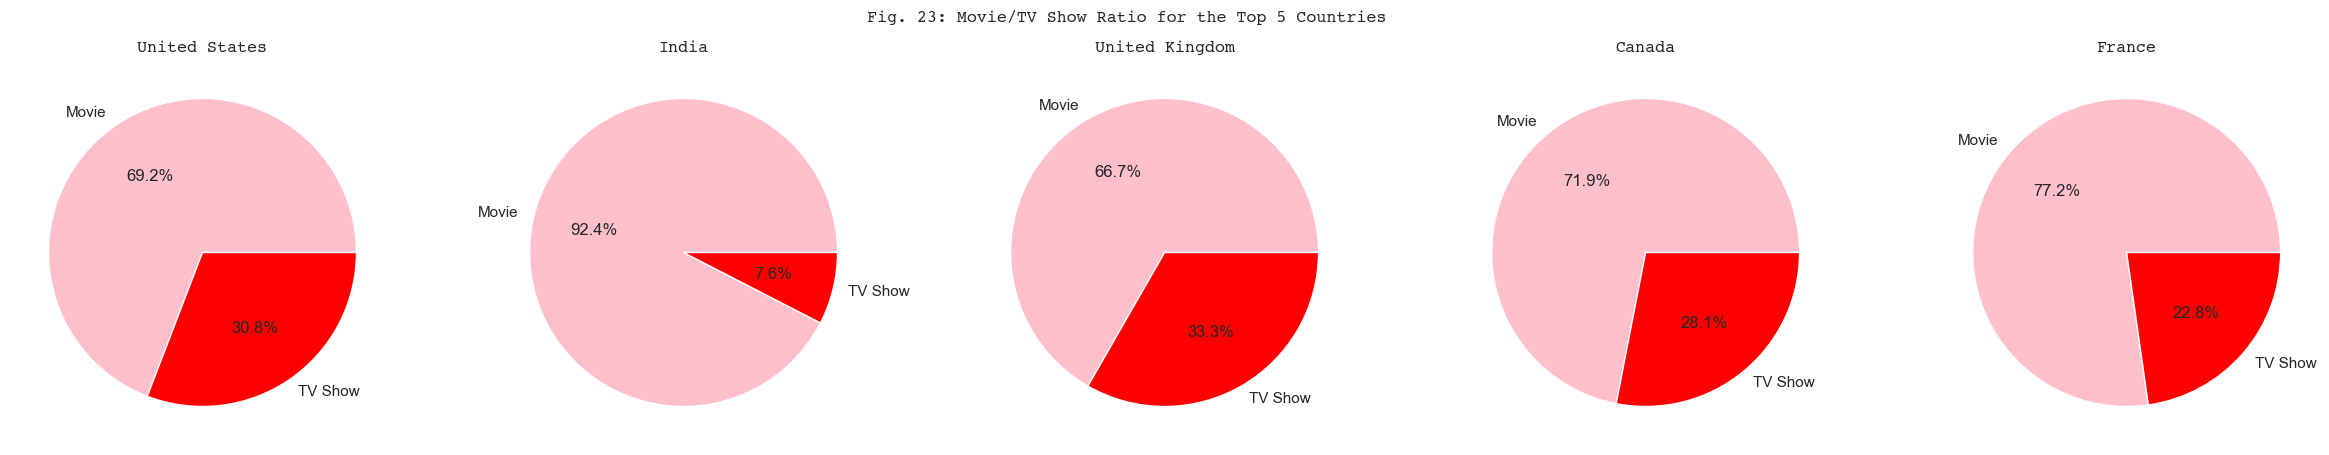

In [403]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 23: Movie/TV Show Ratio for the Top 5 Countries", fontsize = 12, fontname='Courier')
for i in range(len(top_5_countries)):
    plt.subplot(1,5,i+1)
    type_counts = top_5_country_content.loc[top_5_country_content["country"] == top_5_countries[i],["type","show_id"]].groupby("type")["show_id"].aggregate("nunique")
    plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", colors=["pink", "red"])
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
plt.show()

In [404]:
top_5_country_movies["date_added"] = pd.to_datetime(top_5_country_movies["date_added"])
top_5_country_tvshows["date_added"] = pd.to_datetime(top_5_country_tvshows["date_added"])

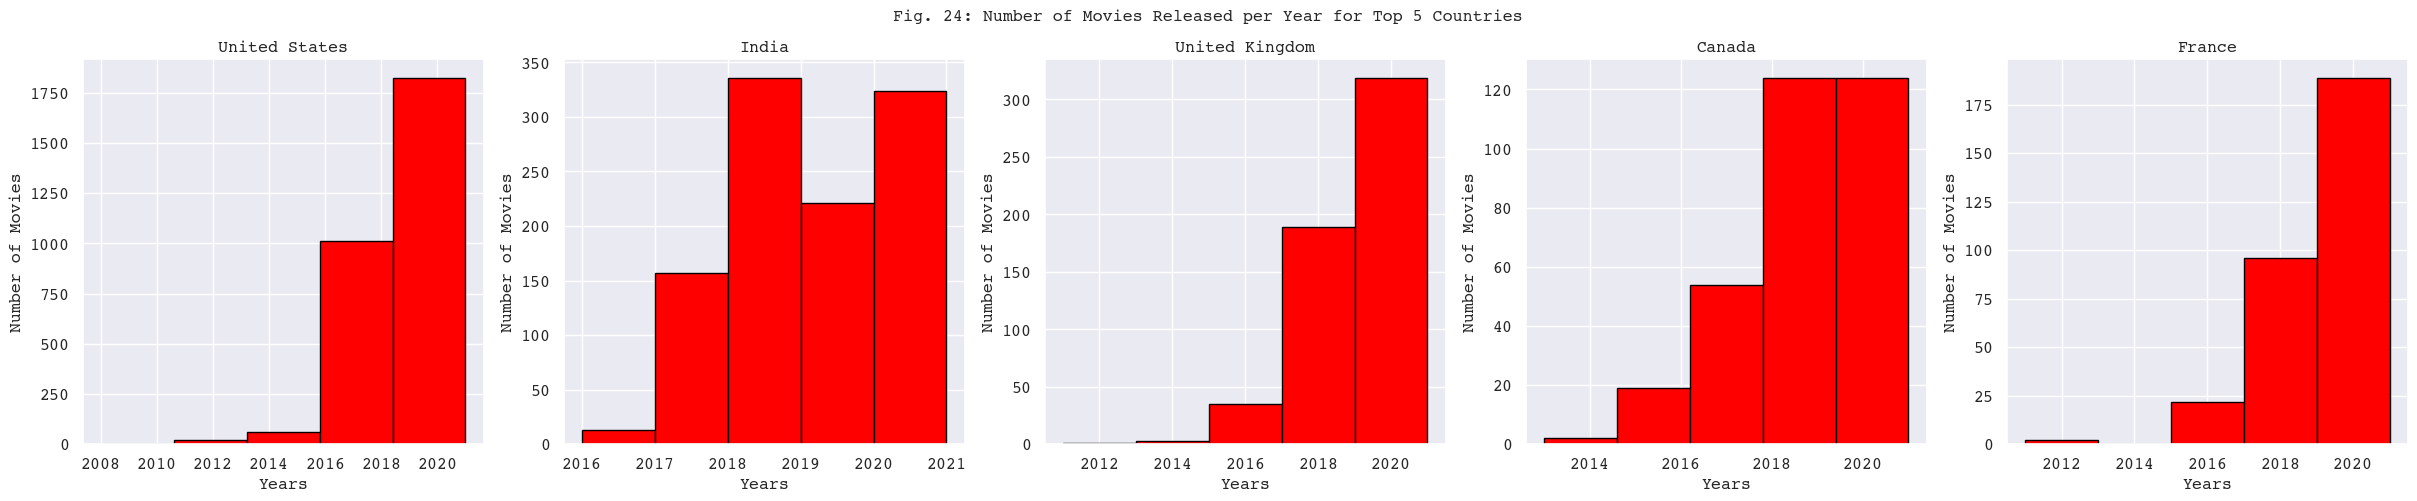

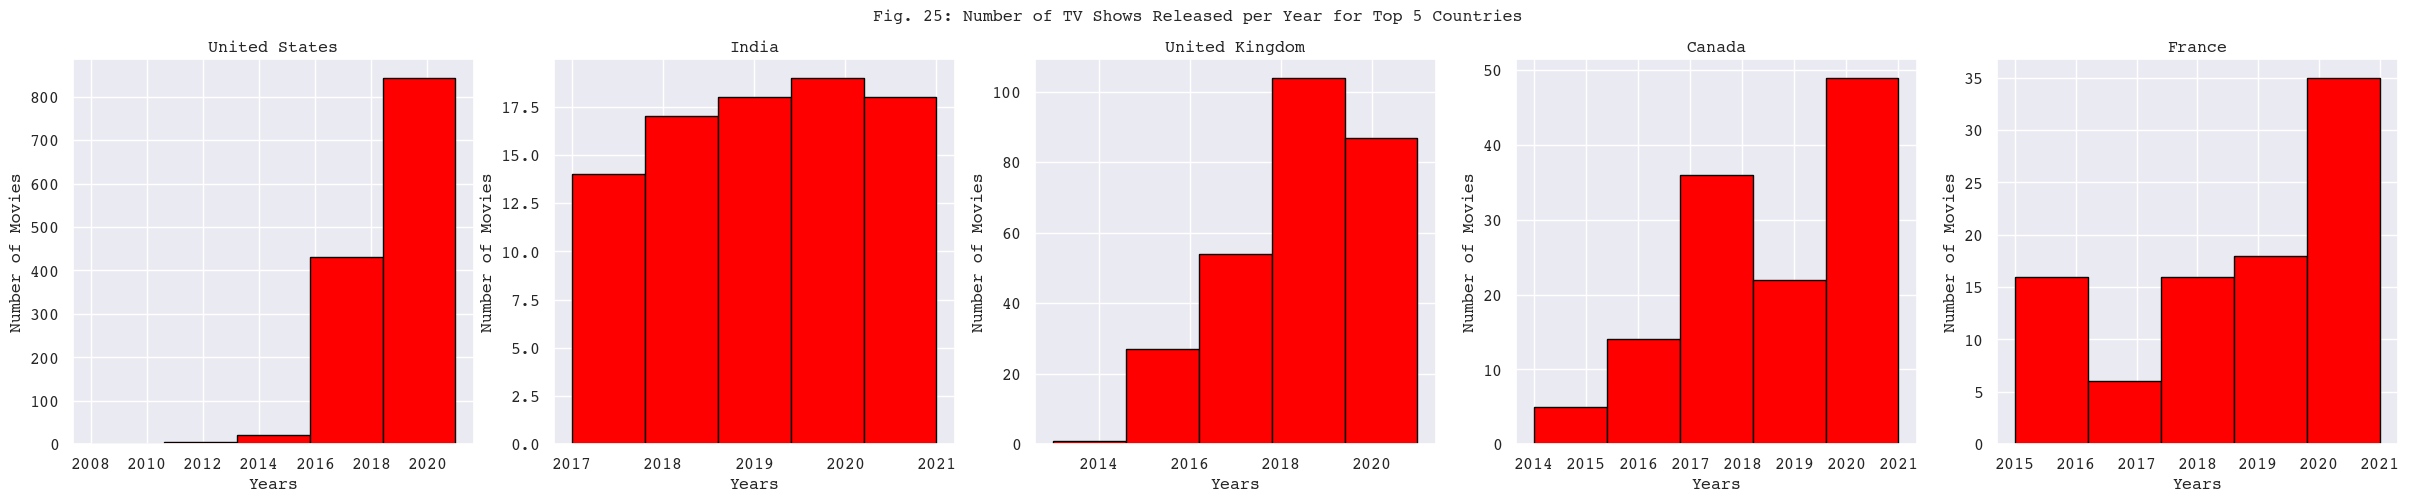

In [405]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 24: Number of Movies Released per Year for Top 5 Countries", fontsize = 12, fontname='Courier')
for i in range(len(top_5_countries)):
    plt.subplot(1,5,i+1)
    plt.hist(top_5_country_movies.loc[top_5_country_movies["country"] == top_5_countries[i], ["show_id","title","date_added","country"]].drop_duplicates()["date_added"].dt.year, bins=5, edgecolor='black', color='red')
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Years", fontsize = 12, fontname='Courier')
    plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.show()

fig=plt.figure(figsize=(30,5)).suptitle("Fig. 25: Number of TV Shows Released per Year for Top 5 Countries", fontsize = 12, fontname='Courier')
for i in range(len(top_5_countries)):
    plt.subplot(1,5,i+1)
    plt.hist(top_5_country_tvshows.loc[top_5_country_tvshows["country"] == top_5_countries[i], ["show_id","title","date_added","country"]].drop_duplicates()["date_added"].dt.year, bins=5, edgecolor='black', color='red')
    plt.title(top_5_countries[i],fontsize = 12, fontname='Courier')
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel("Years", fontsize = 12, fontname='Courier')
    plt.ylabel("Number of Movies", fontsize = 12, fontname='Courier')
plt.show()

In [406]:
top_5_country_movie_geners

[['Action & Adventure', 'Children & family movies', 'Comedies', 'Dramas'],
 ['Comedies', 'Dramas', 'International Movies'],
 ['Action & Adventure', 'Comedies', 'Dramas', 'International Movies'],
 ['Action & Adventure',
  'Children & family movies',
  'Comedies',
  'Dramas',
  'Thrillers'],
 ['International Movies', 'Dramas']]

In [407]:
top_5_country_movies

show_id   type                             title date_added  \
0           s1  Movie              Dick Johnson Is Dead 2021-09-25   
159         s7  Movie  My Little Pony: A New Generation 2021-09-24   
160         s7  Movie  My Little Pony: A New Generation 2021-09-24   
161         s7  Movie  My Little Pony: A New Generation 2021-09-24   
162         s7  Movie  My Little Pony: A New Generation 2021-09-24   
...        ...    ...                               ...        ...   
201593   s8807  Movie                            Zubaan 2019-03-02   
201594   s8807  Movie                            Zubaan 2019-03-02   
201595   s8807  Movie                            Zubaan 2019-03-02   
201596   s8807  Movie                            Zubaan 2019-03-02   
201597   s8807  Movie                            Zubaan 2019-03-02   

        release_year rating duration  \
0               2020  PG-13   90 min   
159             2021     PG   91 min   
160             2021     PG   91 min   
161             2021     PG   91 min   
162             2021     PG   91 min   
...              ...    ...      ...   
201593          2015  TV-14  111 min   
201594          2015  TV-14  111 min   
201595          2015  TV-14  111 min   
201596          2015  TV-14  111 min   
201597          2015  TV-14  111 min   

                                              description         director  \
0       As her father nears the end of his life, filmm...  Kirsten Johnson   
159     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
160     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
161     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
162     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
...                                                   ...              ...   
201593  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201594  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201595  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201596  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201597  A scrappy but poor boy worms his way into a ty...      Mozez Singh   

                         cast        country                 listed_in  \
0                Quincy Jones  United States             Documentaries   
159           Vanessa Hudgens  United States  Children & Family Movies   
160              Kimiko Glenn  United States  Children & Family Movies   
161             James Marsden  United States  Children & Family Movies   
162              Sofia Carson  United States  Children & Family Movies   
...                       ...            ...                       ...   
201593         Anita Shabdish          India      International Movies   
201594         Anita Shabdish          India          Music & Musicals   
201595  Chittaranjan Tripathy          India                    Dramas   
201596  Chittaranjan Tripathy          India      International Movies   
201597  Chittaranjan Tripathy          India          Music & Musicals   

        date_added_year date_added_qtr  date_added_dec  release_year_dec  
0                  2021            Q-3            2020              2020  
159                2021            Q-3            2020              2020  
160                2021            Q-3            2020              2020  
161                2021            Q-3            2020              2020  
162                2021            Q-3            2020              2020  
...                 ...            ...             ...               ...  
201593             2019            Q-1            2010              2010  
201594             2019            Q-1            2010              2010  
201595             2019            Q-1            2010              2010  
201596             2019            Q-1            2010              2010  
201597             2019           

In [408]:
top_5_country_movies

show_id   type                             title date_added  \
0           s1  Movie              Dick Johnson Is Dead 2021-09-25   
159         s7  Movie  My Little Pony: A New Generation 2021-09-24   
160         s7  Movie  My Little Pony: A New Generation 2021-09-24   
161         s7  Movie  My Little Pony: A New Generation 2021-09-24   
162         s7  Movie  My Little Pony: A New Generation 2021-09-24   
...        ...    ...                               ...        ...   
201593   s8807  Movie                            Zubaan 2019-03-02   
201594   s8807  Movie                            Zubaan 2019-03-02   
201595   s8807  Movie                            Zubaan 2019-03-02   
201596   s8807  Movie                            Zubaan 2019-03-02   
201597   s8807  Movie                            Zubaan 2019-03-02   

        release_year rating duration  \
0               2020  PG-13   90 min   
159             2021     PG   91 min   
160             2021     PG   91 min   
161             2021     PG   91 min   
162             2021     PG   91 min   
...              ...    ...      ...   
201593          2015  TV-14  111 min   
201594          2015  TV-14  111 min   
201595          2015  TV-14  111 min   
201596          2015  TV-14  111 min   
201597          2015  TV-14  111 min   

                                              description         director  \
0       As her father nears the end of his life, filmm...  Kirsten Johnson   
159     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
160     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
161     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
162     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
...                                                   ...              ...   
201593  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201594  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201595  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201596  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201597  A scrappy but poor boy worms his way into a ty...      Mozez Singh   

                         cast        country                 listed_in  \
0                Quincy Jones  United States             Documentaries   
159           Vanessa Hudgens  United States  Children & Family Movies   
160              Kimiko Glenn  United States  Children & Family Movies   
161             James Marsden  United States  Children & Family Movies   
162              Sofia Carson  United States  Children & Family Movies   
...                       ...            ...                       ...   
201593         Anita Shabdish          India      International Movies   
201594         Anita Shabdish          India          Music & Musicals   
201595  Chittaranjan Tripathy          India                    Dramas   
201596  Chittaranjan Tripathy          India      International Movies   
201597  Chittaranjan Tripathy          India          Music & Musicals   

        date_added_year date_added_qtr  date_added_dec  release_year_dec  
0                  2021            Q-3            2020              2020  
159                2021            Q-3            2020              2020  
160                2021            Q-3            2020              2020  
161                2021            Q-3            2020              2020  
162                2021            Q-3            2020              2020  
...                 ...            ...             ...               ...  
201593             2019            Q-1            2010              2010  
201594             2019            Q-1            2010              2010  
201595             2019            Q-1            2010              2010  
201596             2019            Q-1            2010              2010  
201597             2019           

In [409]:
top_5_country_movies

show_id   type                             title date_added  \
0           s1  Movie              Dick Johnson Is Dead 2021-09-25   
159         s7  Movie  My Little Pony: A New Generation 2021-09-24   
160         s7  Movie  My Little Pony: A New Generation 2021-09-24   
161         s7  Movie  My Little Pony: A New Generation 2021-09-24   
162         s7  Movie  My Little Pony: A New Generation 2021-09-24   
...        ...    ...                               ...        ...   
201593   s8807  Movie                            Zubaan 2019-03-02   
201594   s8807  Movie                            Zubaan 2019-03-02   
201595   s8807  Movie                            Zubaan 2019-03-02   
201596   s8807  Movie                            Zubaan 2019-03-02   
201597   s8807  Movie                            Zubaan 2019-03-02   

        release_year rating duration  \
0               2020  PG-13   90 min   
159             2021     PG   91 min   
160             2021     PG   91 min   
161             2021     PG   91 min   
162             2021     PG   91 min   
...              ...    ...      ...   
201593          2015  TV-14  111 min   
201594          2015  TV-14  111 min   
201595          2015  TV-14  111 min   
201596          2015  TV-14  111 min   
201597          2015  TV-14  111 min   

                                              description         director  \
0       As her father nears the end of his life, filmm...  Kirsten Johnson   
159     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
160     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
161     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
162     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
...                                                   ...              ...   
201593  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201594  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201595  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201596  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201597  A scrappy but poor boy worms his way into a ty...      Mozez Singh   

                         cast        country                 listed_in  \
0                Quincy Jones  United States             Documentaries   
159           Vanessa Hudgens  United States  Children & Family Movies   
160              Kimiko Glenn  United States  Children & Family Movies   
161             James Marsden  United States  Children & Family Movies   
162              Sofia Carson  United States  Children & Family Movies   
...                       ...            ...                       ...   
201593         Anita Shabdish          India      International Movies   
201594         Anita Shabdish          India          Music & Musicals   
201595  Chittaranjan Tripathy          India                    Dramas   
201596  Chittaranjan Tripathy          India      International Movies   
201597  Chittaranjan Tripathy          India          Music & Musicals   

        date_added_year date_added_qtr  date_added_dec  release_year_dec  
0                  2021            Q-3            2020              2020  
159                2021            Q-3            2020              2020  
160                2021            Q-3            2020              2020  
161                2021            Q-3            2020              2020  
162                2021            Q-3            2020              2020  
...                 ...            ...             ...               ...  
201593             2019            Q-1            2010              2010  
201594             2019            Q-1            2010              2010  
201595             2019            Q-1            2010              2010  
201596             2019            Q-1            2010              2010  
201597             2019           

In [410]:
top_5_country_movies_hm = top_5_country_movies.copy()

In [411]:
np.shares_memory(top_5_country_movies_hm,top_5_country_movies)

False

In [412]:
top_5_country_movies_hm

show_id   type                             title date_added  \
0           s1  Movie              Dick Johnson Is Dead 2021-09-25   
159         s7  Movie  My Little Pony: A New Generation 2021-09-24   
160         s7  Movie  My Little Pony: A New Generation 2021-09-24   
161         s7  Movie  My Little Pony: A New Generation 2021-09-24   
162         s7  Movie  My Little Pony: A New Generation 2021-09-24   
...        ...    ...                               ...        ...   
201593   s8807  Movie                            Zubaan 2019-03-02   
201594   s8807  Movie                            Zubaan 2019-03-02   
201595   s8807  Movie                            Zubaan 2019-03-02   
201596   s8807  Movie                            Zubaan 2019-03-02   
201597   s8807  Movie                            Zubaan 2019-03-02   

        release_year rating duration  \
0               2020  PG-13   90 min   
159             2021     PG   91 min   
160             2021     PG   91 min   
161             2021     PG   91 min   
162             2021     PG   91 min   
...              ...    ...      ...   
201593          2015  TV-14  111 min   
201594          2015  TV-14  111 min   
201595          2015  TV-14  111 min   
201596          2015  TV-14  111 min   
201597          2015  TV-14  111 min   

                                              description         director  \
0       As her father nears the end of his life, filmm...  Kirsten Johnson   
159     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
160     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
161     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
162     Equestria's divided. But a bright-eyed hero be...    Robert Cullen   
...                                                   ...              ...   
201593  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201594  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201595  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201596  A scrappy but poor boy worms his way into a ty...      Mozez Singh   
201597  A scrappy but poor boy worms his way into a ty...      Mozez Singh   

                         cast        country                 listed_in  \
0                Quincy Jones  United States             Documentaries   
159           Vanessa Hudgens  United States  Children & Family Movies   
160              Kimiko Glenn  United States  Children & Family Movies   
161             James Marsden  United States  Children & Family Movies   
162              Sofia Carson  United States  Children & Family Movies   
...                       ...            ...                       ...   
201593         Anita Shabdish          India      International Movies   
201594         Anita Shabdish          India          Music & Musicals   
201595  Chittaranjan Tripathy          India                    Dramas   
201596  Chittaranjan Tripathy          India      International Movies   
201597  Chittaranjan Tripathy          India          Music & Musicals   

        date_added_year date_added_qtr  date_added_dec  release_year_dec  
0                  2021            Q-3            2020              2020  
159                2021            Q-3            2020              2020  
160                2021            Q-3            2020              2020  
161                2021            Q-3            2020              2020  
162                2021            Q-3            2020              2020  
...                 ...            ...             ...               ...  
201593             2019            Q-1            2010              2010  
201594             2019            Q-1            2010              2010  
201595             2019            Q-1            2010              2010  
201596             2019            Q-1            2010              2010  
201597             2019           

In [413]:
top_5_country_movies_hm["date_added_qtr"] = top_5_country_movies_hm["date_added_qtr"].str.split("-").str.get(1).astype(int)
top_5_country_movies_hm["duration_min"] = top_5_country_movies_hm["duration"].str.split(" ").str.get(0).astype(int)


In [414]:
top_5_country_movies_hm["date_added_month"] = top_5_country_movies_hm["date_added"].dt.month_name()

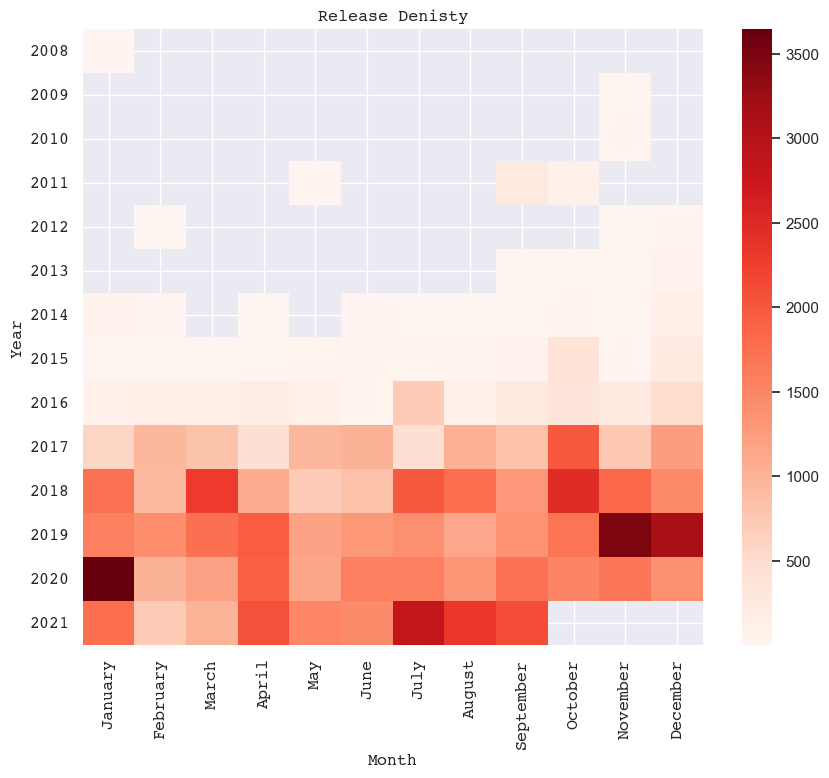

In [415]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df = top_5_country_movies_hm.groupby('date_added_year')['date_added_month'].value_counts().unstack()[month_order]
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.heatmap(df,cmap="Reds")
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier', rotation=360)
plt.title('Release Denisty', fontsize = 12, fontname='Courier')
plt.xlabel("Month", fontsize = 12, fontname='Courier')
plt.ylabel("Year", fontsize = 12, fontname='Courier')
plt.show()


In [416]:
top_5_country_movies_hm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91091 entries, 0 to 201597
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           91091 non-null  object        
 1   type              91091 non-null  object        
 2   title             91091 non-null  object        
 3   date_added        91091 non-null  datetime64[ns]
 4   release_year      91091 non-null  int64         
 5   rating            91091 non-null  object        
 6   duration          91091 non-null  object        
 7   description       91091 non-null  object        
 8   director          91085 non-null  object        
 9   cast              91091 non-null  object        
 10  country           91091 non-null  object        
 11  listed_in         91091 non-null  object        
 12  date_added_year   91091 non-null  int32         
 13  date_added_qtr    91091 non-null  int64         
 14  date_added_dec    91091 no

<Axes: >

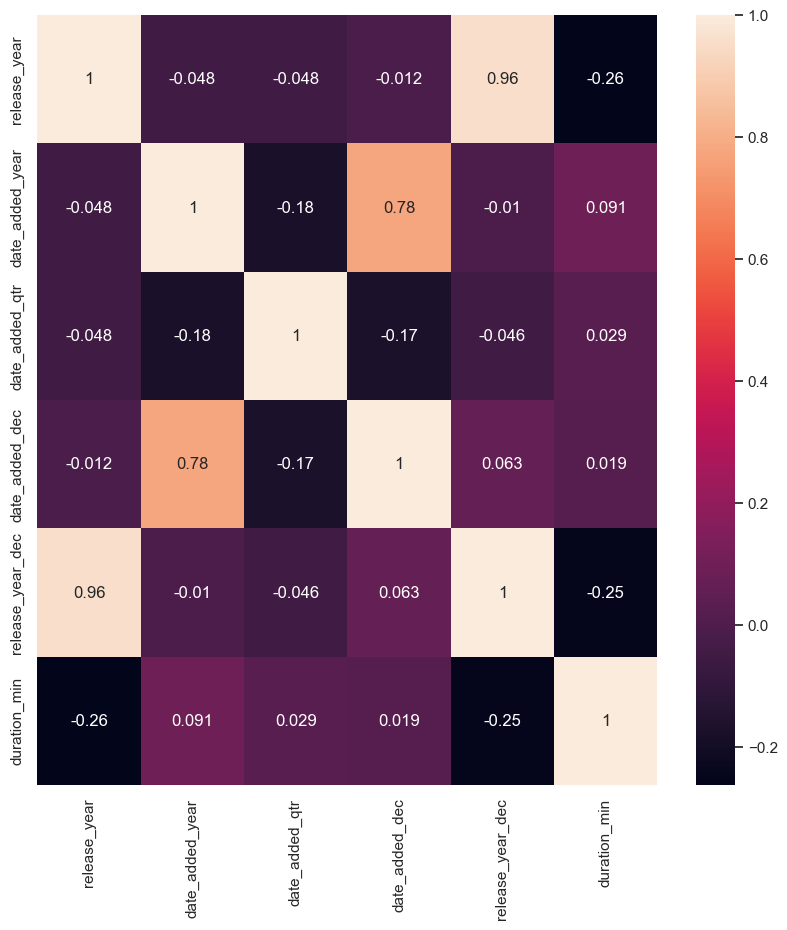

In [417]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data=top_5_country_movies_hm.corr(numeric_only=True), annot=True)

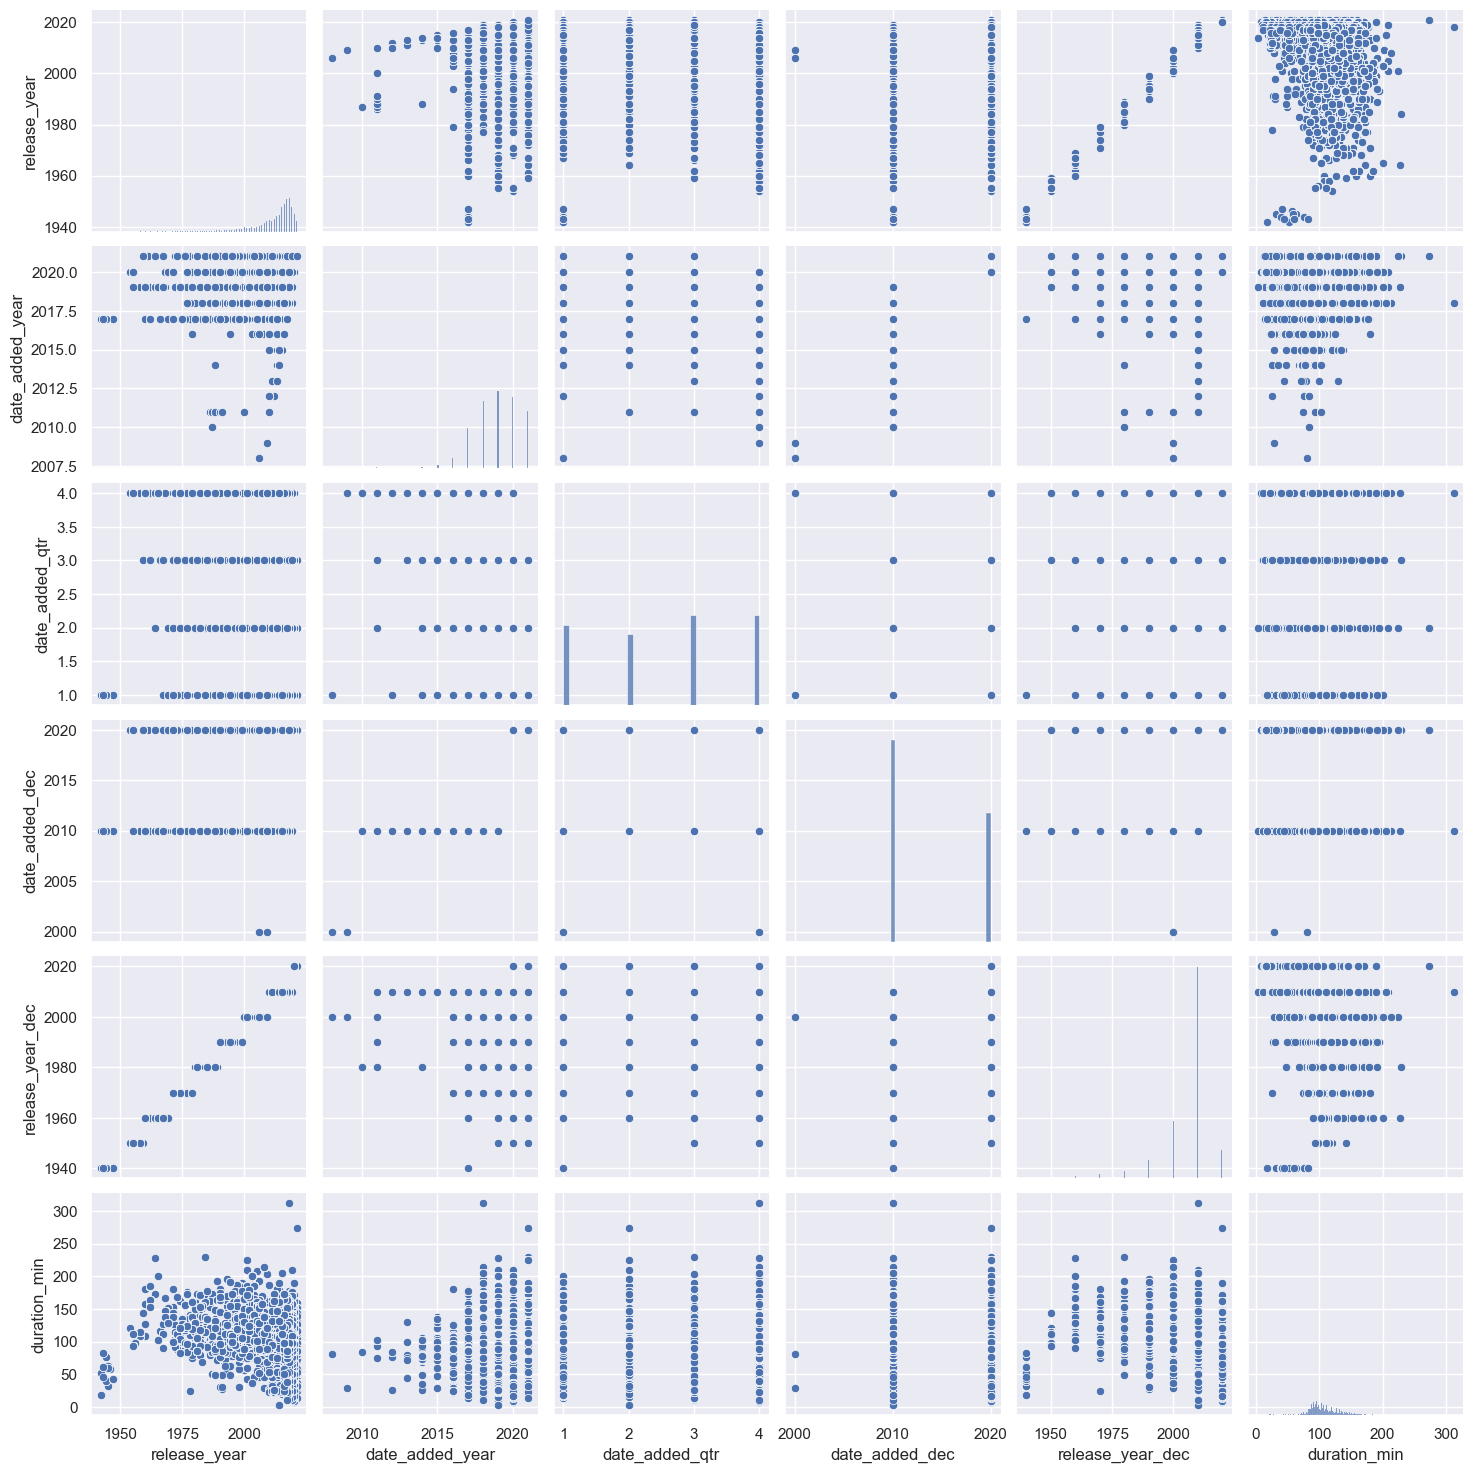

In [418]:
sns.pairplot(data = top_5_country_movies_hm)
plt.show()

In [419]:
top_5_country_movies_hm.corr(numeric_only=True)

release_year  date_added_year  date_added_qtr  \
release_year          1.000000        -0.047922       -0.048496   
date_added_year      -0.047922         1.000000       -0.176087   
date_added_qtr       -0.048496        -0.176087        1.000000   
date_added_dec       -0.011815         0.776177       -0.171251   
release_year_dec      0.958306        -0.010285       -0.046326   
duration_min         -0.262928         0.090532        0.029417   

                  date_added_dec  release_year_dec  duration_min  
release_year           -0.011815          0.958306     -0.262928  
date_added_year         0.776177         -0.010285      0.090532  
date_added_qtr         -0.171251         -0.046326      0.029417  
date_added_dec          1.000000          0.062710      0.019070  
release_year_dec        0.062710          1.000000     -0.249063  
duration_min            0.019070         -0.249063      1.000000

In [420]:
top_5_country_movies_hm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91091 entries, 0 to 201597
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           91091 non-null  object        
 1   type              91091 non-null  object        
 2   title             91091 non-null  object        
 3   date_added        91091 non-null  datetime64[ns]
 4   release_year      91091 non-null  int64         
 5   rating            91091 non-null  object        
 6   duration          91091 non-null  object        
 7   description       91091 non-null  object        
 8   director          91085 non-null  object        
 9   cast              91091 non-null  object        
 10  country           91091 non-null  object        
 11  listed_in         91091 non-null  object        
 12  date_added_year   91091 non-null  int32         
 13  date_added_qtr    91091 non-null  int64         
 14  date_added_dec    91091 no

In [421]:
top_5_country_movies.loc[top_5_country_movies["country"] == "United States"].groupby(["director","cast"])["show_id"].aggregate("nunique").reset_index().sort_values("show_id",ascending=False).head(10)

director                cast  show_id
14048  Matthew Salleh        Quincy Jones       14
14046  Matthew Salleh        Laura Bailey        7
20727      Steve Ball  Alessandro Juliani        6
8122      Ishi Rudell       Ashleigh Ball        6
20752      Steve Ball        Vincent Tong        6
20748      Steve Ball      Nicole Anthony        6
20738      Steve Ball       Elyse Maloway        6
20736      Steve Ball       Diana Kaarina        6
20728      Steve Ball       Andrea Libman        6
8121      Ishi Rudell       Andrea Libman        6

In [422]:
top_5_countries_movie_data

show_id   type                             title          date_added  \
0         s1  Movie              Dick Johnson Is Dead  September 25, 2021   
1         s7  Movie  My Little Pony: A New Generation  September 24, 2021   
2         s8  Movie                           Sankofa  September 24, 2021   
3         s8  Movie                           Sankofa  September 24, 2021   
4        s10  Movie                      The Starling  September 24, 2021   
...      ...    ...                               ...                 ...   
5145   s8800  Movie                             Zenda   February 15, 2018   
5146   s8803  Movie                            Zodiac   November 20, 2019   
5147   s8805  Movie                        Zombieland    November 1, 2019   
5148   s8806  Movie                              Zoom    January 11, 2020   
5149   s8807  Movie                            Zubaan       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
1             2021     PG   91 min   
2             1993  TV-MA  125 min   
3             1993  TV-MA  125 min   
4             2021  PG-13  104 min   
...            ...    ...      ...   
5145          2009  TV-14  120 min   
5146          2007      R  158 min   
5147          2009      R   88 min   
5148          2006     PG   88 min   
5149          2015  TV-14  111 min   

                                            description  duration_in_mins  \
0     As her father nears the end of his life, filmm...                90   
1     Equestria's divided. But a bright-eyed hero be...                91   
2     On a photo shoot in Ghana, an American model s...               125   
3     On a photo shoot in Ghana, an American model s...               125   
4     A woman adjusting to life after a loss contend...               104   
...                                                 ...               ...   
5145  A change in the leadership of a political part...               120   
5146  A political cartoonist, a crime reporter and a...               158   
5147  Looking to survive in a world taken over by zo...                88   
5148  Dragged from civilian life, a former superhero...                88   
5149  A scrappy but poor boy worms his way into a ty...               111   

      decade         country  
0       2020   United States  
1       2020   United States  
2       1990   United States  
3       1990  United Kingdom  
4       2020   United States  
...      ...             ...  
5145    2000           India  
5146    2000   United States  
5147    2000   United States  
5148    2000   United States  
5149    2010           India  

[5150 rows x 11 columns]

<Figure size 3000x500 with 0 Axes>

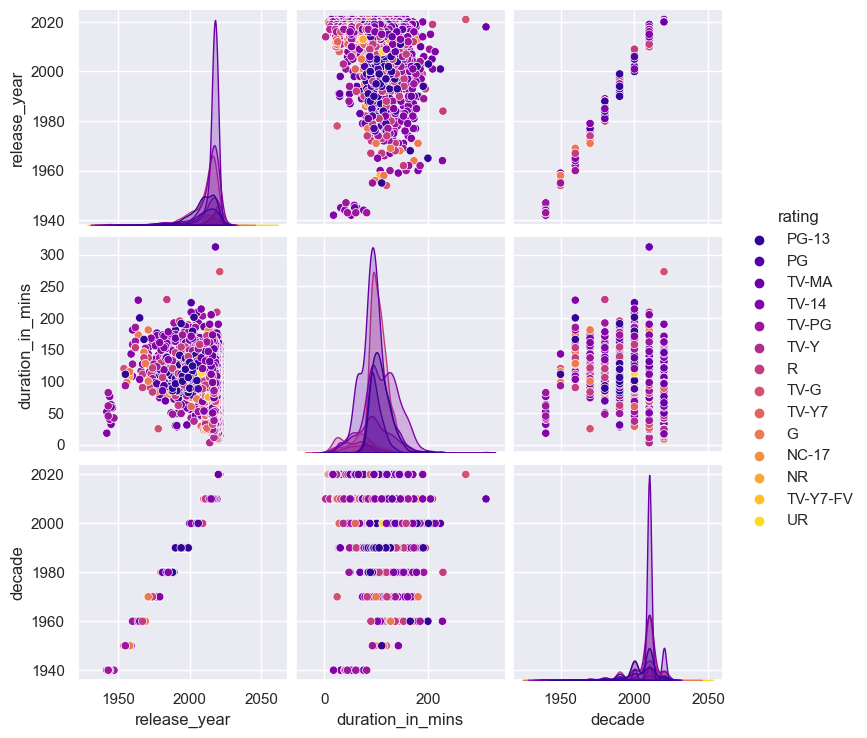

In [423]:
fig=plt.figure(figsize=(30,5))
sns.pairplot(data = top_5_countries_movie_data, hue = "rating", palette="plasma")
#plt.title("Pairwise Relationships of Movie Attributes for Top 5 Countries", fontsize = 12, fontname='Courier')
plt.show()

<Figure size 3000x500 with 0 Axes>

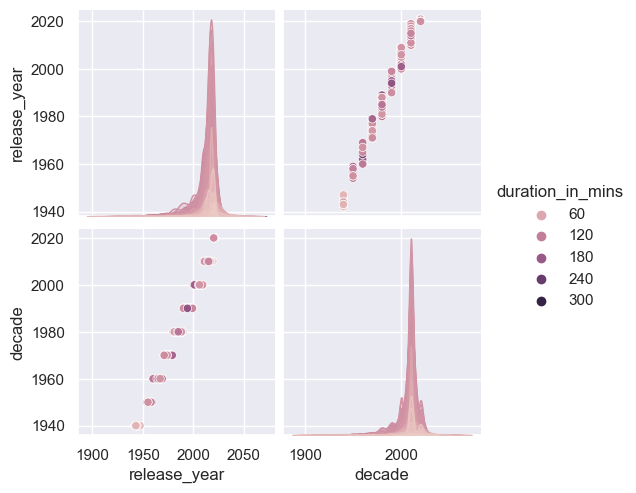

In [424]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 27: Pairwise Relationships of Movie Attributes for Top 5 Countries", fontsize = 12, fontname='Courier')
sns.pairplot(data = top_5_countries_movie_data, hue = "duration_in_mins")
plt.show()

<Figure size 3000x500 with 0 Axes>

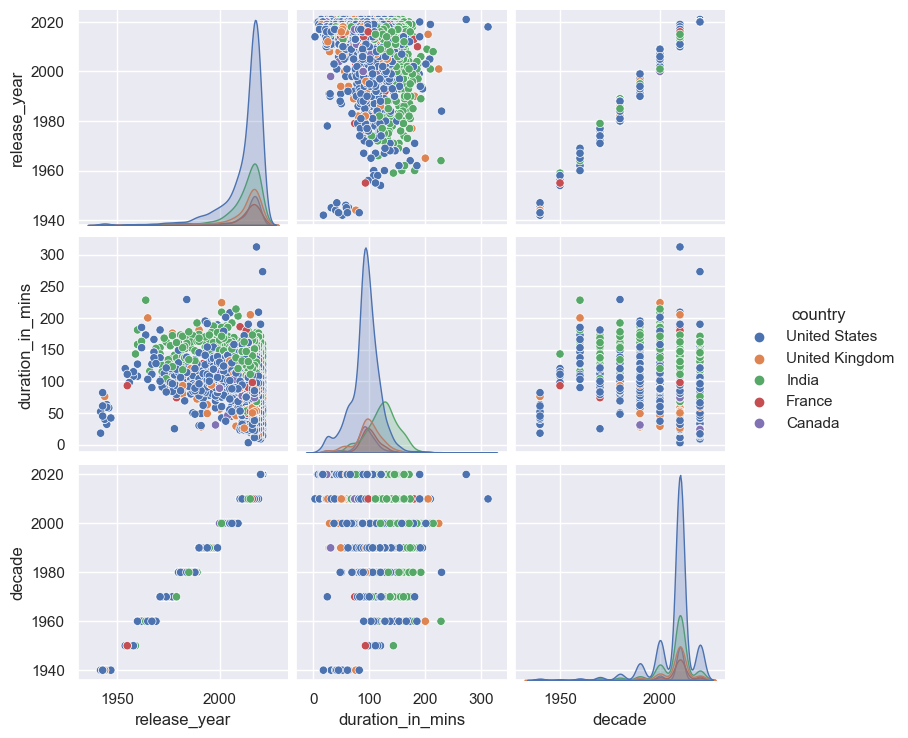

In [425]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 28: Pairwise Relationships of Movie Attributes for Top 5 Countries", fontsize = 12, fontname='Courier')
sns.pairplot(data = top_5_countries_movie_data, hue = "country")
plt.show()

<Figure size 3000x500 with 0 Axes>

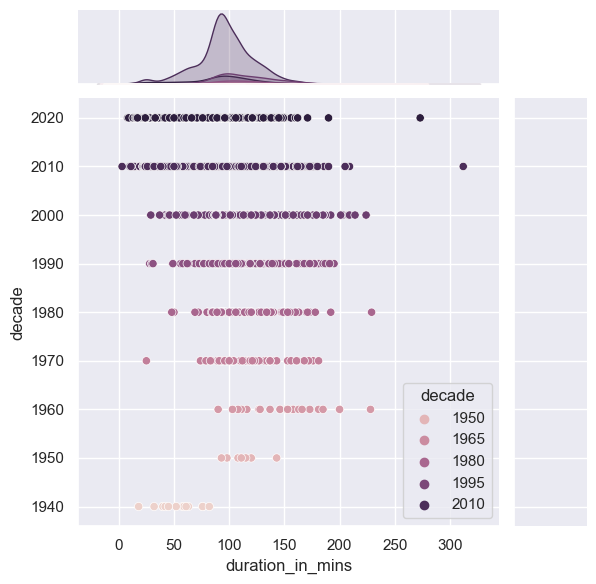

In [426]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 29: Joint Distribution of Movie Duration and Decade for Top 5 Countries, colored by Rating", fontsize = 12, fontname='Courier')
sns.jointplot(x = "duration_in_mins", y = "decade", data = top_5_countries_movie_data, hue = "decade")
plt.show()

<Figure size 3000x500 with 0 Axes>

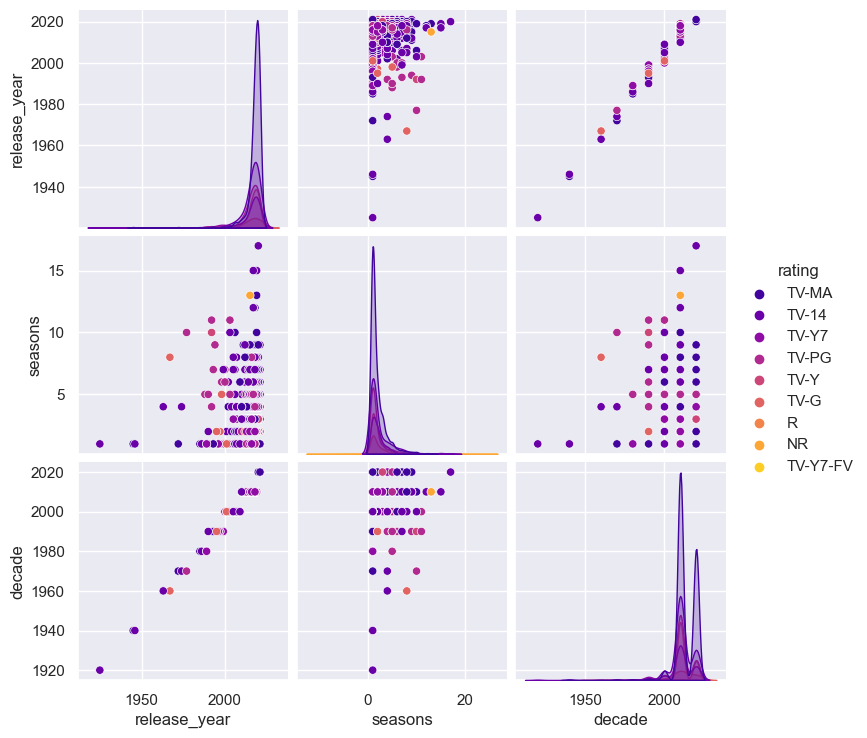

In [427]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 30: Pairwise Relationships of TV Show Attributes for Top 5 Countries, colored by Rating", fontsize = 12, fontname='Courier')
sns.pairplot(data = top_5_countries_shows_data, hue = "rating", palette="plasma")
plt.show()

<Figure size 3000x500 with 0 Axes>

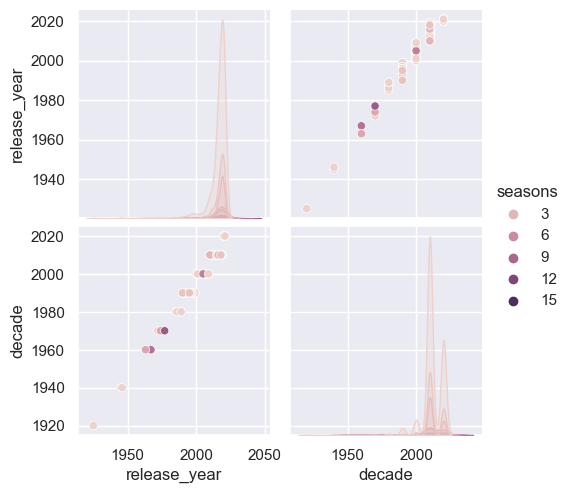

In [428]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 31: Pairwise Relationships of TV Show Attributes for Top 5 Countries, colored by Number of Seasons", fontsize = 12, fontname='Courier')
sns.pairplot(data = top_5_countries_shows_data, hue = "seasons")
plt.show()

<Figure size 3000x500 with 0 Axes>

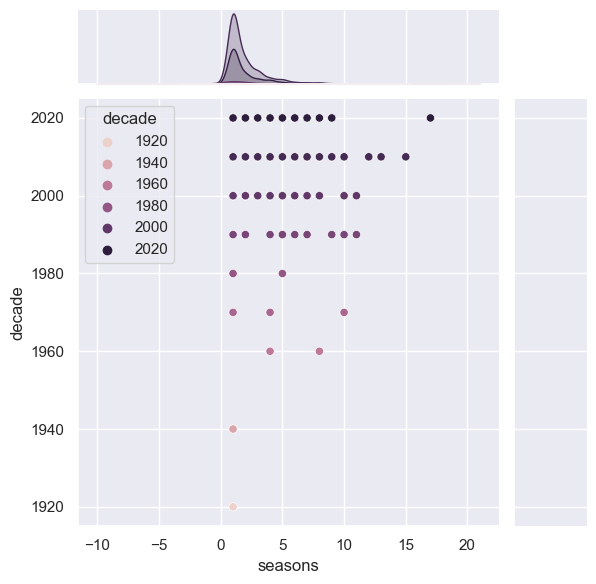

In [429]:
fig=plt.figure(figsize=(30,5)).suptitle("Fig. 32: Relationship between Number of Seasons and Decade for TV Shows in Top 5 Countries, colored by Decade", fontsize = 12, fontname='Courier')
sns.jointplot(x = "seasons", y = "decade", data = top_5_countries_shows_data, hue = "decade")
plt.show()